Of note, the samples were switched either in the order of the run or the order of the submission or the other of the return 

On OneNote, the PCR primers are as follows: 

|Library|i5 primer|i7 primer|
|-------|---------|---------|
|1-1|am10|am20|
|1-2|am11|am21|
|1-3|am12|am22|
|1-4|am13|am23|
|2-1|am14|am24|
|2-2|am15|am25|
|2-3|am30|am125|
|2-4|am120|am126|

But on the return, this is what was summarized: 

|Filename|Sample Name|Description|Total Yield (Reads)|Q30 Percentage|
|--------|-----------|-----------|-------------------|--------------|
|6436-AM-1-CCACGGTA-CCCCCCCC|6436-AM-1|KCNE1-Rep2-Lib1-1|191,716,443|91.68|
|6436-AM-2-TTGTAACG-CCCCCCCC|6436-AM-2|KCNE1-Rep2-Lib1-2|170,604,316|91.50|
|6436-AM-3-TGTACTTG-CCCCCCCC|6436-AM-3|KCNE1-Rep2-Lib1-3|129,450,339|92.74|
|6436-AM-4-CACGTCCA-CCCCCCCC|6436-AM-4|KCNE1-Rep2-Lib1-4|111,107,546|92.09|
|6436-AM-5-GCGCGATG-CCCCCCCC|6436-AM-5|KCNE1-Rep2-Lib2-1|146,841,066|92.23|
|6436-AM-6-ATATAGCA-CCCCCCCC|6436-AM-6|KCNE1-Rep2-Lib2-2|155,564,059|92.18|
|6436-AM-7-AAGTTGGT-CCCCCCCC|6436-AM-7|KCNE1-Rep2-Lib2-3|108,836,809|92.72|
|6436-AM-8-GGACCAAC-CCCCCCCC|6436-AM-8|KCNE1-Rep2-Lib2-4|120,674,780|91.07|


### When looking at the sequences of the indices, here is the corrected order: 


|Library|i5 primer|i7 primer|Sample|
|-------|---------|---------|------|
|1-1|am10|am20|Sample 8|
|1-2|am11|am21|Sample 7|
|1-3|am12|am22|Sample 6|
|1-4|am13|am23|Sample 5|
|2-1|am14|am24|Sample 4|
|2-2|am15|am25|Sample 3| 
|2-3|am30|am125|Sample 2|
|2-4|am120|am126|Sample 1|


### Summary:

<b><i> The gates for 6014 were as follows: 1: lowest tradfficking to 4: highest trafficking 

The same gates apply for this replicate 6436-AM, but there was a mix up in sample submission or running (look at explanation above) so gates are reversed! 

Thus, in case of these replicates, consider gate 1 to be highest trafficking and gate 4 to be lowest trafficking  

Also because of the sample mix up, replicate 2 is actually replicate 3 and vice versa (when correlating PDFs and wet lab numbers to sequence analyses).
    </b></i>

In [1]:
cd /scratch2/muhama1/6436-AM/

In [2]:
ls

011022_rawcountsbyMut_rep3.txt
011022_rawcountsbyMut.txt
070622_rawcountsbyMut_rep3.txt
070622_rawcountsbyMut.txt
070921_replicate2_scores.txt
071321_replicate3_scores.txt
071921_replicate2_scores_NAforZero.txt
071921_replicate2_scores.txt
072021_replicate3_scores_NAforZero.txt
072021_replicate3_scores.txt
072921_rawcountsbyMut.txt
092121_rep3_traffic_HM_raw.pdf
092721_Allreps_trafficking_vio.pdf
121421_catsScores.txt
6436-AM-1_S1_L005_R1_001.fastq.gz
6436-AM-1_S1_L005_R2_001.fastq.gz
6436-AM-2_S1_L005_R1_001.fastq.gz
6436-AM-2_S1_L005_R2_001.fastq.gz
6436-AM-3_S1_L005_R1_001.fastq.gz
6436-AM-3_S1_L005_R2_001.fastq.gz
6436-AM-4_S1_L005_R1_001.fastq.gz
6436-AM-4_S1_L005_R2_001.fastq.gz
6436-AM-5_S1_L005_R1_001.fastq.gz
6436-AM-5_S1_L005_R2_001.fastq.gz
6436-AM-6_S1_L005_R1_001.fastq.gz
6436-AM-6_S1_L005_R2_001.fastq.gz
6436-AM-7_S1_L005_R1_001.fastq.gz
6436-AM-7_S1_L005_R2_001.fastq.gz
6436-AM-8_S1_L005_R1_001.fastq.gz
6436-AM-8_S1_L005_R2_001.fastq.gz
6436-AM_project_summary.xlsx
all_r

In [3]:
setwd("/scratch2/muhama1/6436-AM/")
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(RColorBrewer)
library(gplots)
library(colorspace)
library("ggpubr")
library("gridExtra")
library("GGally")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



import os
os.chdir("/scratch2/muhama1/6436-AM/")
print("Current Working Directory " , os.getcwd())

### This is for replicate 2

All preliminary analyses are in the original replicate 2+3 Jupyter notebook.

This is just taking the normalized counts calculated as before, and merging it with new subA table to see coverage

In [4]:
fulldf <- fread("rep2_raw_counts_072821.txt", header=T, stringsAsFactors =F)

In [5]:
head(fulldf)
totalG1 <- sum(fulldf$count.G1, na.rm=T)

totalG2 <- sum(fulldf$count.G2, na.rm=T)

totalG3 <- sum(fulldf$count.G3, na.rm=T)

totalG4 <- sum(fulldf$count.G4, na.rm=T)

print("normalizing reads across gates (reads per million)")
fulldf_norm <- fulldf %>%
        mutate(norm.count.G1 = 1e6*count.G1/totalG1,
               norm.count.G2 = 1e6*count.G2/totalG2,
               norm.count.G3 = 1e6*count.G3/totalG3,
               norm.count.G4 = 1e6*count.G4/totalG4,
               fvtot = (count.G1 + count.G2 + count.G3 + count.G4)/(totalG1+totalG2+totalG3+totalG4)
        )

head(fulldf_norm)

fulldf_norm_0 <- fulldf %>% mutate_if(is.numeric, replace_na, 0) %>%
            mutate(
               norm.count.G1 = 1e6*count.G1/totalG1,
               norm.count.G2 = 1e6*count.G2/totalG2,
               norm.count.G3 = 1e6*count.G3/totalG3,
               norm.count.G4 = 1e6*count.G4/totalG4,
               fvtot = (count.G1 + count.G2 + count.G3 + count.G4)/(totalG1+totalG2+totalG3+totalG4)
        )

head(fulldf_norm_0)



barcode,count.G1,count.G2,count.G3,count.G4
<chr>,<int>,<int>,<int>,<int>
TTCACAGTCCGATTTCGC,3,NA,NA,NA
TAGATTCCTTGTCCGTAC,1,NA,NA,NA
TGGGGGGATGGGTTCACG,1,NA,NA,NA
TTTGGTTTTGTTATAGAT,1,NA,NA,NA
ATCGGACCCGTCGTTGTC,1,NA,NA,NA
ATATCCAGACATATAGTA,1,NA,NA,NA


[1] "normalizing reads across gates (reads per million)"


barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTCACAGTCCGATTTCGC,3,NA,NA,NA,0.018611324,NA,NA,NA,NA
TAGATTCCTTGTCCGTAC,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
TGGGGGGATGGGTTCACG,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
TTTGGTTTTGTTATAGAT,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
ATCGGACCCGTCGTTGTC,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
ATATCCAGACATATAGTA,1,NA,NA,NA,0.006203775,NA,NA,NA,NA


barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTCACAGTCCGATTTCGC,3,0,0,0,0.018611324,0,0,0,5.919733e-09
TAGATTCCTTGTCCGTAC,1,0,0,0,0.006203775,0,0,0,1.973244e-09
TGGGGGGATGGGTTCACG,1,0,0,0,0.006203775,0,0,0,1.973244e-09
TTTGGTTTTGTTATAGAT,1,0,0,0,0.006203775,0,0,0,1.973244e-09
ATCGGACCCGTCGTTGTC,1,0,0,0,0.006203775,0,0,0,1.973244e-09
ATATCCAGACATATAGTA,1,0,0,0,0.006203775,0,0,0,1.973244e-09


In [6]:
fwrite(fulldf_norm,"normalized_counts_100122.txt", row.names=F, quote=F, sep="\t")
fwrite(fulldf_norm,"normalized_counts_withNArep_100122.txt", row.names=F, quote=F, sep="\t")

In [7]:
fulldf_norm <- fread("normalized_counts_100122.txt", header=T, stringsAsFactors = F)

In [8]:
head(fulldf_norm)

barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTCACAGTCCGATTTCGC,3,NA,NA,NA,0.018611324,NA,NA,NA,NA
TAGATTCCTTGTCCGTAC,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
TGGGGGGATGGGTTCACG,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
TTTGGTTTTGTTATAGAT,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
ATCGGACCCGTCGTTGTC,1,NA,NA,NA,0.006203775,NA,NA,NA,NA
ATATCCAGACATATAGTA,1,NA,NA,NA,0.006203775,NA,NA,NA,NA


[1] "barcode"       "count.G1"      "count.G2"      "count.G3"     
 [5] "count.G4"      "norm.count.G1" "norm.count.G2" "norm.count.G3"
 [9] "norm.count.G4" "fvtot"

In [9]:
# this step below will count how many barcodes don't have any NAs in them 
sum(complete.cases(fulldf_norm))
# number of rows that are represented in all the gates. 

muts <- fread("/scratch2/muhama1/E1_NGS_SubA_AG/subA-cleanTable2022-06-29.txt", 
              header=T, stringsAsFactors = F)
head(muts)

[1] 527372

barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
TTAAGAAGAAATGCTGTCAGTCC,S,64,L,missense
TTAAGCGTCATGAAAGTTCTACA,Y,46,P,missense
TTAAGAGAGGGCTGTAAAGTGGT,L,42,I,missense
TTAAGCGCCAGGGCCGGGTGTGG,Q,22,M,missense
TTAAGAGCGGGACGCTTTTCTAC,G,52,C,missense
TTAAGGCAGCACGTGTGCTTTAG,F,57,D,missense


In [10]:
head(muts)
muts$barcode <- gsub("^.{0,5}", "", muts$barcode)
head(muts)

barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
TTAAGAAGAAATGCTGTCAGTCC,S,64,L,missense
TTAAGCGTCATGAAAGTTCTACA,Y,46,P,missense
TTAAGAGAGGGCTGTAAAGTGGT,L,42,I,missense
TTAAGCGCCAGGGCCGGGTGTGG,Q,22,M,missense
TTAAGAGCGGGACGCTTTTCTAC,G,52,C,missense
TTAAGGCAGCACGTGTGCTTTAG,F,57,D,missense


barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
AAGAAATGCTGTCAGTCC,S,64,L,missense
CGTCATGAAAGTTCTACA,Y,46,P,missense
AGAGGGCTGTAAAGTGGT,L,42,I,missense
CGCCAGGGCCGGGTGTGG,Q,22,M,missense
AGCGGGACGCTTTTCTAC,G,52,C,missense
GCAGCACGTGTGCTTTAG,F,57,D,missense


In [11]:
# if doing analyses with zeros not added, then change the fulldf_norm_0 below to fulldf_norm
fulldf_withMut <- fulldf_norm %>%
    right_join(.,muts,by="barcode") %>% 
        mutate(id=NULL) %>% 
            group_by(pos) %>%
                arrange(new, .by_group=T) %>% select(orig,pos,new,barcode,mutType,
                                                    count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,
                                                    norm.count.G3,norm.count.G4,fvtot)

# the fulldf is from the cell above, takes the barcode file with all the gates reads merged

In [14]:
head(fulldf_withMut)
nrow(fulldf_withMut)

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,AGATCCATGGTGTCTTTC,missense,2675,37,25,4941,16.59509723,0.26918408,0.22595871,50.679362,1.515057e-05,M1A
M,1,A,TGCCTGTAAAATATTTTC,missense,18,677,14,964,0.11166794,4.92534118,0.12653688,9.887655,3.301238e-06,M1A
M,1,A,TGCCTCACCTGGTCGTCA,missense,24,21,18,3414,0.14889059,0.15278015,0.16269027,35.017070,6.860971e-06,M1A
M,1,A,AAGTGACAAGGTATTGGT,missense,9,15,9,866,0.05583397,0.10912868,0.08134514,8.882479,1.773947e-06,M1A
M,1,A,CCACGTAGGACCGTCCAG,missense,17,9,7,3479,0.10546417,0.06547721,0.06326844,35.683769,6.930035e-06,M1A
M,1,A,GGAGTTGCAGCGGCGGCG,missense,26,142,839,4138,0.16129814,1.03308486,7.58317436,42.443069,1.015234e-05,M1A


[1] 80276

In replicate A2 (first one on 6014-AM), there were 47338 BCs represented. Here we have more. So great! 

In [15]:
summary(fulldf_withMut$pos)
fulldf_withMut$variant = paste(fulldf_withMut$orig,fulldf_withMut$pos,fulldf_withMut$new,sep="")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.00   64.00   64.03   95.00  128.00 

In [16]:
head(fulldf_withMut[fulldf_withMut$variant =="L51H",],13)
nrow(fulldf_withMut[fulldf_withMut$variant =="L51H",])

test <- fulldf_withMut[fulldf_withMut$variant =="L51H",]

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L,51,H,TCACTTGGCCGTTAATTG,missense,347,16,11,2819,2.15270981,0.11640393,0.09942183,28.914212,6.300570e-06,L51H
L,51,H,ATAAGTGGGCCGGGGGGA,missense,242,16,19,6481,1.50131347,0.11640393,0.17172862,66.474995,1.333519e-05,L51H
L,51,H,GCATTGACGAGCTCTGTG,missense,18,5,8,2627,0.11166794,0.03637623,0.07230679,26.944887,5.244884e-06,L51H
L,51,H,ACGGGGGCGGGGGAAGGA,missense,29,27,179,6594,0.17990947,0.19643163,1.61786438,67.634025,1.347529e-05,L51H
L,51,H,GTCTGTTAAATTTTATTA,missense,13,8,6,622,0.08064907,0.05820196,0.05423009,6.379794,1.280636e-06,L51H
L,51,H,TCCCCGTAGTGCTTGAGT,missense,21,11,11,3572,0.13027927,0.08002770,0.09942183,36.637661,7.133279e-06,L51H
L,51,H,GATCGGCCGAGTCGTGAG,missense,9,6,2,2090,0.05583397,0.04365147,0.01807670,21.436929,4.157626e-06,L51H
L,51,H,GTTCTTACTAAGTCGTTT,missense,260,44,28,12627,1.61298141,0.32011080,0.25307376,129.513926,2.557127e-05,L51H
L,51,H,GCGGTAGCTGAGAGTGGG,missense,47,35,21,9771,0.29157741,0.25463359,0.18980532,100.220209,1.948382e-05,L51H


[1] 17

In the previous replicate, 15x coverage of L51H (using as L60H because of a 9 aa shift because of the HA tag). and in this replicate, 17x coverage so we are looking good.

In [17]:
test$barcode

[1] "TCACTTGGCCGTTAATTG" "ATAAGTGGGCCGGGGGGA" "GCATTGACGAGCTCTGTG"
 [4] "ACGGGGGCGGGGGAAGGA" "GTCTGTTAAATTTTATTA" "TCCCCGTAGTGCTTGAGT"
 [7] "GATCGGCCGAGTCGTGAG" "GTTCTTACTAAGTCGTTT" "GCGGTAGCTGAGAGTGGG"
[10] "TTTCTAAATAAAAAACTC" "CTCAGGATTTCTCGGGCA" "TGCACAGATATCAGGGAA"
[13] "CAGTTCAGGGAGGGGGGC" "TTTTCGTTATTGGGAGGT" "TTTCTTGCGCCCGACTGG"
[16] "CAGAGCGTTCATTAGGTT" "CCATAAACATTAGAAAGG"

In [18]:
head(test)
sum(test$norm.count.G1,na.rm=T)
sum(test$norm.count.G2,na.rm=T)
sum(test$norm.count.G3,na.rm=T)
sum(test$norm.count.G4,na.rm=T)


sum(test$norm.count.G1,na.rm=T)+
sum(test$norm.count.G2,na.rm=T)+
sum(test$norm.count.G3,na.rm=T)+
sum(test$norm.count.G4,na.rm=T)

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L,51,H,TCACTTGGCCGTTAATTG,missense,347,16,11,2819,2.15270981,0.11640393,0.09942183,28.914212,6.300570e-06,L51H
L,51,H,ATAAGTGGGCCGGGGGGA,missense,242,16,19,6481,1.50131347,0.11640393,0.17172862,66.474995,1.333519e-05,L51H
L,51,H,GCATTGACGAGCTCTGTG,missense,18,5,8,2627,0.11166794,0.03637623,0.07230679,26.944887,5.244884e-06,L51H
L,51,H,ACGGGGGCGGGGGAAGGA,missense,29,27,179,6594,0.17990947,0.19643163,1.61786438,67.634025,1.347529e-05,L51H
L,51,H,GTCTGTTAAATTTTATTA,missense,13,8,6,622,0.08064907,0.05820196,0.05423009,6.379794,1.280636e-06,L51H
L,51,H,TCCCCGTAGTGCTTGAGT,missense,21,11,11,3572,0.13027927,0.08002770,0.09942183,36.637661,7.133279e-06,L51H


[1] 15.17443

[1] 1.920665

[1] 13.23214

[1] 732.3327

[1] 762.6599

In the gates table below: 
normalized count aggregated by barcode: 

|replicate|orig |posn |new |gate1 |gate2 |gate3 |gate4 |totalRow|
|---------|-----|-----|----|------|------|------|------|--------|
|A2 (6014-AM)|L|60|H|773.7504|148.3414|59.55229|22.06696|1003.7111|	
|2 (6436-AM S1-4)|L|60|H|732.3327|13.23214|1.920665|15.17443|762.5899|

<b><i> of note, the gates for 6014 were as follows: 1: lowest tradfficking to 4: highest trafficking 

The same gates apply for this replicate 6436-AM, but there was a mix up in sample submission or running (look at top block) so gates are reversed! 

Thus, in case of these replicates, consider gate 1 to be highest trafficking and gate 4 to be lowest trafficking  

Also because of the sample mix up, replicate 2 is actually replicate 3 and vice versa.
    </b></i>
   

In [19]:
head(fulldf_withMut)
fulldf_withMut_short <- fulldf_withMut %>%
    select(variant, barcode, norm.count.G1, 
           norm.count.G2, norm.count.G3, 
           norm.count.G4, orig, pos, new, mutType,fvtot)
# don't filter yet 

#aggregate by mutations 

head(fulldf_withMut_short)

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,AGATCCATGGTGTCTTTC,missense,2675,37,25,4941,16.59509723,0.26918408,0.22595871,50.679362,1.515057e-05,M1A
M,1,A,TGCCTGTAAAATATTTTC,missense,18,677,14,964,0.11166794,4.92534118,0.12653688,9.887655,3.301238e-06,M1A
M,1,A,TGCCTCACCTGGTCGTCA,missense,24,21,18,3414,0.14889059,0.15278015,0.16269027,35.017070,6.860971e-06,M1A
M,1,A,AAGTGACAAGGTATTGGT,missense,9,15,9,866,0.05583397,0.10912868,0.08134514,8.882479,1.773947e-06,M1A
M,1,A,CCACGTAGGACCGTCCAG,missense,17,9,7,3479,0.10546417,0.06547721,0.06326844,35.683769,6.930035e-06,M1A
M,1,A,GGAGTTGCAGCGGCGGCG,missense,26,142,839,4138,0.16129814,1.03308486,7.58317436,42.443069,1.015234e-05,M1A


variant,barcode,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,orig,pos,new,mutType,fvtot
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>
M1A,AGATCCATGGTGTCTTTC,16.59509723,0.26918408,0.22595871,50.679362,M,1,A,missense,1.515057e-05
M1A,TGCCTGTAAAATATTTTC,0.11166794,4.92534118,0.12653688,9.887655,M,1,A,missense,3.301238e-06
M1A,TGCCTCACCTGGTCGTCA,0.14889059,0.15278015,0.16269027,35.017070,M,1,A,missense,6.860971e-06
M1A,AAGTGACAAGGTATTGGT,0.05583397,0.10912868,0.08134514,8.882479,M,1,A,missense,1.773947e-06
M1A,CCACGTAGGACCGTCCAG,0.10546417,0.06547721,0.06326844,35.683769,M,1,A,missense,6.930035e-06
M1A,GGAGTTGCAGCGGCGGCG,0.16129814,1.03308486,7.58317436,42.443069,M,1,A,missense,1.015234e-05


In [20]:
num1 <- aggregate(norm.count.G1~variant,fulldf_withMut_short,sum)
names(num1)[2] <- 'gate1'

num2 <- aggregate(norm.count.G2~variant,fulldf_withMut_short,sum)
names(num2)[2] <- 'gate2'

num3 <- aggregate(norm.count.G3~variant,fulldf_withMut_short,sum)
names(num3)[2] <- 'gate3'

num4 <- aggregate(norm.count.G4~variant,fulldf_withMut_short,sum)
names(num4)[2] <- 'gate4'

gates <- num1 %>% full_join(num2, by="variant") %>%
        full_join(num3,by="variant") %>% 
            full_join(num4,by="variant") %>% 
                separate("variant", c("orig","posn","new"),sep=c(1,-1),convert = T) %>%
                        group_by(posn) %>%
                arrange(new, .by_group=T)

head(gates)

orig,posn,new,gate1,gate2,gate3,gate4
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,25.45409,13.93937,55.56777,742.9691
M,1,C,65.93372,12.70258,35.45744,949.9534
M,1,D,47.53332,6.65685,29.64578,463.1710
M,1,E,17.27751,19.14117,60.46655,601.5161
M,1,F,13.72895,14.67417,16.54018,639.4462
M,1,G,111.68035,30.33050,138.63019,2835.6237


In [21]:
test <- gates[gates$posn==51 & gates$new =="H",]
head(test)
test[,c(4:7)]/sum(test[,c(4:7)])

orig,posn,new,gate1,gate2,gate3,gate4
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
L,51,H,15.17443,1.920665,13.23214,732.3327


gate1,gate2,gate3,gate4
<dbl>,<dbl>,<dbl>,<dbl>
0.01989672,0.002518376,0.01734999,0.9602349


In [22]:
gates$totalRow = rowSums(gates[,c(4:7)])

head(gates)

# pos_corr is redundant now 

print("Number of total rows")
print(length(complete.cases(gates)))

gates[gates$posn==51 & gates$new =="H",]

orig,posn,new,gate1,gate2,gate3,gate4,totalRow
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,25.45409,13.93937,55.56777,742.9691,837.9303
M,1,C,65.93372,12.70258,35.45744,949.9534,1064.0472
M,1,D,47.53332,6.65685,29.64578,463.1710,547.0070
M,1,E,17.27751,19.14117,60.46655,601.5161,698.4014
M,1,F,13.72895,14.67417,16.54018,639.4462,684.3895
M,1,G,111.68035,30.33050,138.63019,2835.6237,3116.2647


[1] "Number of total rows"
[1] 2591


orig,posn,new,gate1,gate2,gate3,gate4,totalRow
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L,51,H,15.17443,1.920665,13.23214,732.3327,762.6599


In [23]:
head(gates)
nrow(gates)

orig,posn,new,gate1,gate2,gate3,gate4,totalRow
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,25.45409,13.93937,55.56777,742.9691,837.9303
M,1,C,65.93372,12.70258,35.45744,949.9534,1064.0472
M,1,D,47.53332,6.65685,29.64578,463.1710,547.0070
M,1,E,17.27751,19.14117,60.46655,601.5161,698.4014
M,1,F,13.72895,14.67417,16.54018,639.4462,684.3895
M,1,G,111.68035,30.33050,138.63019,2835.6237,3116.2647


[1] 2591

In [24]:
fwrite(gates,"042623_rawcountsbyMut.txt", sep="\t", row.names = F, quote = F)

The L60H (real L51H) does not really ad up in terms of numbers as cleanly as in the previous replicate. 

In [25]:
gates <- gates %>%
    mutate(norm.G1.ratio = gate1/totalRow,
           norm.G2.ratio = gate2/totalRow,
           norm.G3.ratio = gate3/totalRow,
           norm.G4.ratio = gate4/totalRow,
           score = 3*norm.G1.ratio + 2*norm.G2.ratio +1*norm.G3.ratio +0*norm.G4.ratio,
           .keep="all")

gates$category = ifelse(gates$orig == gates$new, "synonymous", 
                        ifelse(gates$new=="X","nonsense","missense"))

head(gates)

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,25.45409,13.93937,55.56777,742.9691,837.9303,0.03037733,0.016635477,0.06631550,0.8866717,0.1907184,missense
M,1,C,65.93372,12.70258,35.45744,949.9534,1064.0472,0.06196503,0.011937985,0.03332319,0.8927738,0.2430943,missense
M,1,D,47.53332,6.65685,29.64578,463.1710,547.0070,0.08689710,0.012169588,0.05419635,0.8467370,0.3392268,missense
M,1,E,17.27751,19.14117,60.46655,601.5161,698.4014,0.02473866,0.027407121,0.08657851,0.8612757,0.2156087,missense
M,1,F,13.72895,14.67417,16.54018,639.4462,684.3895,0.02006015,0.021441257,0.02416779,0.9343308,0.1272307,missense
M,1,G,111.68035,30.33050,138.63019,2835.6237,3116.2647,0.03583789,0.009732966,0.04448601,0.9099431,0.1714656,missense


In [26]:
nrow(gates)
# total number of unique mutations = 2284 

head(gates)
pos_51 <- gates[gates$posn =="51",] 
head(pos_51)
nrow(pos_51)

[1] 2591

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,25.45409,13.93937,55.56777,742.9691,837.9303,0.03037733,0.016635477,0.06631550,0.8866717,0.1907184,missense
M,1,C,65.93372,12.70258,35.45744,949.9534,1064.0472,0.06196503,0.011937985,0.03332319,0.8927738,0.2430943,missense
M,1,D,47.53332,6.65685,29.64578,463.1710,547.0070,0.08689710,0.012169588,0.05419635,0.8467370,0.3392268,missense
M,1,E,17.27751,19.14117,60.46655,601.5161,698.4014,0.02473866,0.027407121,0.08657851,0.8612757,0.2156087,missense
M,1,F,13.72895,14.67417,16.54018,639.4462,684.3895,0.02006015,0.021441257,0.02416779,0.9343308,0.1272307,missense
M,1,G,111.68035,30.33050,138.63019,2835.6237,3116.2647,0.03583789,0.009732966,0.04448601,0.9099431,0.1714656,missense


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L,51,A,109.236064,135.152235,406.978755,643.24122,1294.6083,0.08437770,0.104396239,0.314364402,0.4968617,0.7762900,missense
L,51,C,69.742835,32.309365,154.185186,345.33970,601.5771,0.11593333,0.053707772,0.256301628,0.5740573,0.7115172,missense
L,51,D,3.672635,8.453835,10.981593,324.73358,347.8416,0.01055835,0.024303689,0.031570669,0.9335673,0.1118531,missense
L,51,E,25.292789,4.576129,6.742608,720.01414,756.6257,0.03342840,0.006048076,0.008911418,0.9516121,0.1212928,missense
L,51,F,62.223860,90.394925,73.861384,59.87981,286.3600,0.21729245,0.315668854,0.257931940,0.2091068,1.5411470,missense
L,51,G,75.183545,59.336902,125.108819,1386.51802,1646.1473,0.04567243,0.036045925,0.076000988,0.8422807,0.2851101,missense


[1] 21

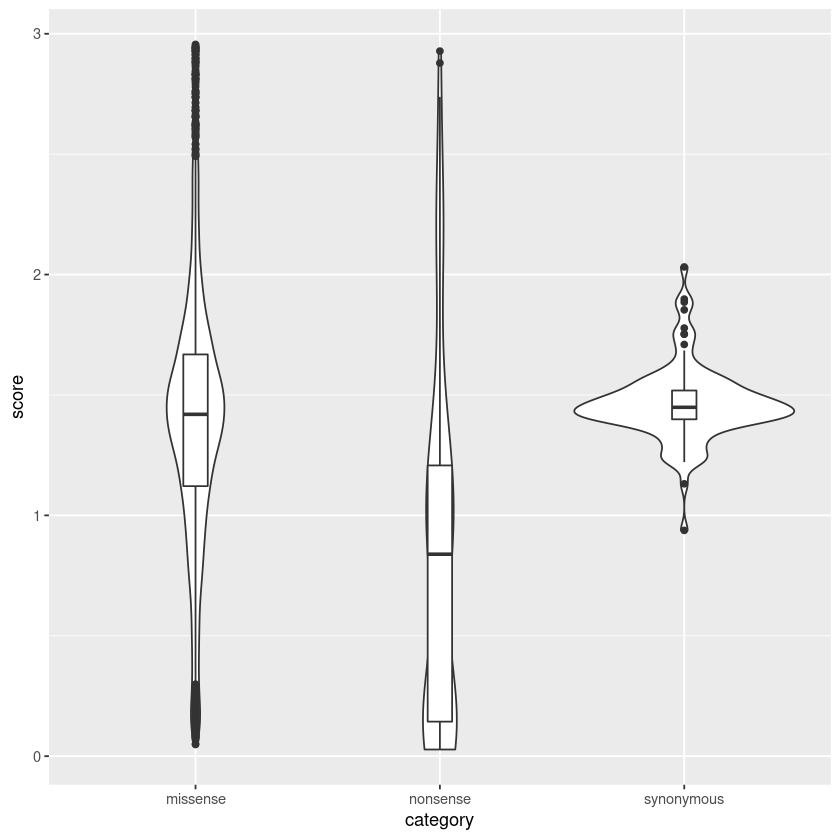

In [27]:
ggplot(gates[gates$totalRow >100,],
       aes(category,score))+geom_violin()+geom_boxplot(width=0.1)


In [28]:
colnames(gates)

[1] "orig"          "posn"          "new"           "gate1"        
 [5] "gate2"         "gate3"         "gate4"         "totalRow"     
 [9] "norm.G1.ratio" "norm.G2.ratio" "norm.G3.ratio" "norm.G4.ratio"
[13] "score"         "category"

In [29]:

gates_a <- gates[,c(1,2,3,13,14,8)]

head(gates_a)
fileName = paste("scores-replicate2-",Sys.Date(),".txt",sep="")
fileName

write.table(gates_a,fileName, row.names=F, quote=F,
         col.names=T, sep="\t")

rm(fileName)
head(gates_a)



orig,posn,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.1907184,missense,837.9303
M,1,C,0.2430943,missense,1064.0472
M,1,D,0.3392268,missense,547.0070
M,1,E,0.2156087,missense,698.4014
M,1,F,0.1272307,missense,684.3895
M,1,G,0.1714656,missense,3116.2647


[1] "scores-replicate2-2023-04-26.txt"

orig,posn,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.1907184,missense,837.9303
M,1,C,0.2430943,missense,1064.0472
M,1,D,0.3392268,missense,547.0070
M,1,E,0.2156087,missense,698.4014
M,1,F,0.1272307,missense,684.3895
M,1,G,0.1714656,missense,3116.2647


In [30]:
head(gates_a)
colnames(gates_a)[2] = "pos_corr"

a2 <- fread("../6014-AM/scores-replicateA2-2023-04-26.txt", header=T, stringsAsFactors = F)

head(a2)

orig,posn,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.1907184,missense,837.9303
M,1,C,0.2430943,missense,1064.0472
M,1,D,0.3392268,missense,547.0070
M,1,E,0.2156087,missense,698.4014
M,1,F,0.1272307,missense,684.3895
M,1,G,0.1714656,missense,3116.2647


orig,pos_corr,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.9344435,missense,1628.624
M,1,C,0.9299419,missense,1641.610
M,1,D,0.9750137,missense,1232.795
M,1,E,0.8963225,missense,1142.154
M,1,F,0.8497856,missense,1315.343
M,1,G,0.9338761,missense,4541.336


In [31]:
colnames(gates_a)
colnames(a2)

c <- merge(gates_a,a2, by=c("orig","pos_corr","new","category"))
head(c)

[1] "orig"     "pos_corr" "new"      "score"    "category" "totalRow"

[1] "orig"     "pos_corr" "new"      "score"    "category" "totalRow"

,orig,pos_corr,new,category,score.x,totalRow.x,score.y,totalRow.y
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,114,A,synonymous,1.4242604,1925.6733,1.6389720,2657.0339
2,A,114,C,missense,1.1731305,681.1619,1.3289646,952.8520
3,A,114,D,missense,1.5639793,1001.0446,1.8375561,1066.8724
4,A,114,E,missense,1.6570870,971.7828,1.6983784,1007.5644
5,A,114,F,missense,0.7599531,246.9971,0.9280703,324.3743
6,A,114,G,missense,1.5008130,2816.8391,1.7106067,2489.1199


In [32]:
c <- merge(gates_a,a2, by=c("orig","pos_corr","new","category")) %>% 
    magrittr::set_names(c("orig","pos_corr","new","category","rep2","rep2_TC","repA","repA_TC"))
head(c)

c$variant = paste(c$orig,c$pos_corr,c$new,sep="")

,orig,pos_corr,new,category,rep2,rep2_TC,repA,repA_TC
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,114,A,synonymous,1.4242604,1925.6733,1.6389720,2657.0339
2,A,114,C,missense,1.1731305,681.1619,1.3289646,952.8520
3,A,114,D,missense,1.5639793,1001.0446,1.8375561,1066.8724
4,A,114,E,missense,1.6570870,971.7828,1.6983784,1007.5644
5,A,114,F,missense,0.7599531,246.9971,0.9280703,324.3743
6,A,114,G,missense,1.5008130,2816.8391,1.7106067,2489.1199


Warning message:
“Removed 1 rows containing missing values (geom_point).”



Call:
lm(formula = rep2 ~ repA, data = c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69219 -0.15544 -0.01633  0.14832  1.70801 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.41294    0.01821  -22.68   <2e-16 ***
repA         1.15531    0.01130  102.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2524 on 2587 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.8016 
F-statistic: 1.046e+04 on 1 and 2587 DF,  p-value: < 2.2e-16


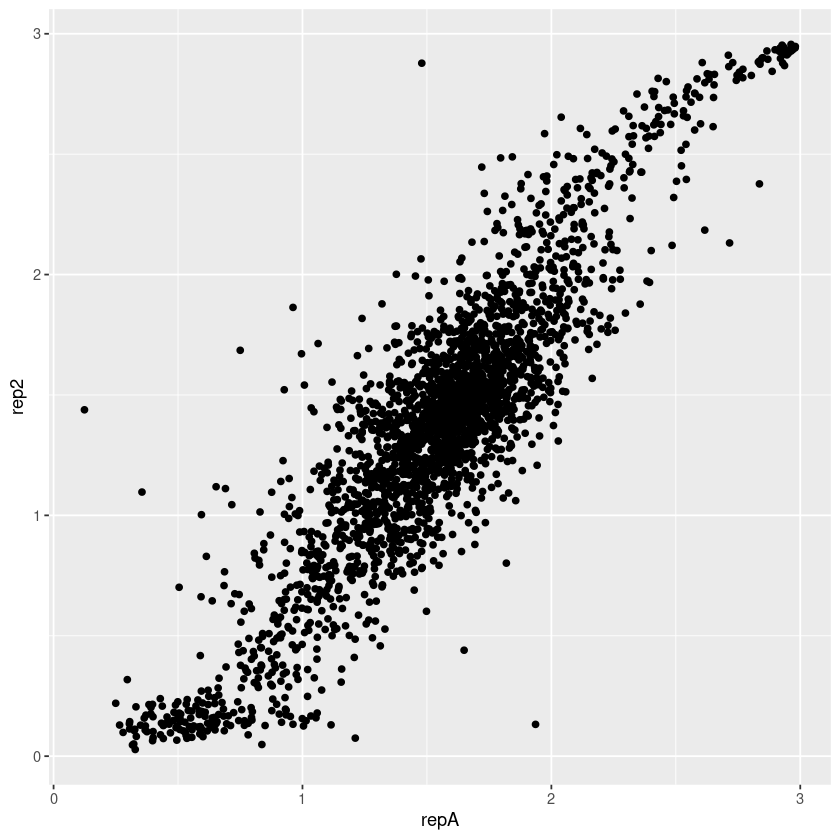

In [33]:
ggplot(c,aes(repA,rep2))+geom_point()

model <- lm(rep2~repA,data=c)
summary(model)

In [34]:
# first check for normality:
# Shapiro-Wilk normality test for mpg

shapiro.test(c$repA) 
 
shapiro.test(c$rep2)

# null hypothesis is that the data are normally distributed
# alternate hypothesis is that data are not normally distributed


	Shapiro-Wilk normality test

data:  c$repA
W = 0.97053, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  c$rep2
W = 0.96899, p-value < 2.2e-16


Since the scores meet the significance threshold on the Shapiro-Wilk test, they are not normally distributed. <b> so Pearson correlation cannot be used </b>

In [35]:
cor.test(c$repA, c$rep2, method=c("spearman"))

summary(lm(rep2~repA,data=c))


	Spearman's rank correlation rho

data:  c$repA and c$rep2
S = 472411776, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8366663 



Call:
lm(formula = rep2 ~ repA, data = c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69219 -0.15544 -0.01633  0.14832  1.70801 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.41294    0.01821  -22.68   <2e-16 ***
repA         1.15531    0.01130  102.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2524 on 2587 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.8016 
F-statistic: 1.046e+04 on 1 and 2587 DF,  p-value: < 2.2e-16


There is a 75% correlation (?)
<b> need to ask! </b>

* * * * *

# Replicate 3: 

Repeat the same process as above, but with samples 5-8. 


In [36]:
fulldf <- fread("rep3_raw_counts_100122.txt", header=T, stringsAsFactors =F)

In [37]:
head(fulldf)
totalG1 <- sum(fulldf$count.G1, na.rm=T)

totalG2 <- sum(fulldf$count.G2, na.rm=T)

totalG3 <- sum(fulldf$count.G3, na.rm=T)

totalG4 <- sum(fulldf$count.G4, na.rm=T)

print("normalizing reads across gates (reads per million)")
fulldf_norm <- fulldf %>%
        mutate(norm.count.G1 = 1e6*count.G1/totalG1,
               norm.count.G2 = 1e6*count.G2/totalG2,
               norm.count.G3 = 1e6*count.G3/totalG3,
               norm.count.G4 = 1e6*count.G4/totalG4,
               fvtot = (count.G1 + count.G2 + count.G3 + count.G4)/(totalG1+totalG2+totalG3+totalG4)
        )

head(fulldf_norm)

fulldf_norm_0 <- fulldf %>% mutate_if(is.numeric, replace_na, 0) %>%
            mutate(
               norm.count.G1 = 1e6*count.G1/totalG1,
               norm.count.G2 = 1e6*count.G2/totalG2,
               norm.count.G3 = 1e6*count.G3/totalG3,
               norm.count.G4 = 1e6*count.G4/totalG4,
               fvtot = (count.G1 + count.G2 + count.G3 + count.G4)/(totalG1+totalG2+totalG3+totalG4)
        )

head(fulldf_norm_0)

barcode,count.G1,count.G2,count.G3,count.G4
<chr>,<int>,<int>,<int>,<int>
TTATGTCTGTCCGTTTTG,1,2,NA,NA
CAAGTTTGCAGTTAGATT,1,NA,NA,NA
AATACGTAACGTGGTGCA,1,NA,1,NA
CAGGCGTTTGCTTTGAAT,1,NA,NA,NA
ATTTGCTGAAAGAGGAAA,1,NA,NA,NA
ATTATAGTTCCCCTGCTA,1,1,NA,1


[1] "normalizing reads across gates (reads per million)"


barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTATGTCTGTCCGTTTTG,1,2,NA,NA,0.008062826,0.014523567,NA,NA,NA
CAAGTTTGCAGTTAGATT,1,NA,NA,NA,0.008062826,NA,NA,NA,NA
AATACGTAACGTGGTGCA,1,NA,1,NA,0.008062826,NA,0.01029599,NA,NA
CAGGCGTTTGCTTTGAAT,1,NA,NA,NA,0.008062826,NA,NA,NA,NA
ATTTGCTGAAAGAGGAAA,1,NA,NA,NA,0.008062826,NA,NA,NA,NA
ATTATAGTTCCCCTGCTA,1,1,NA,1,0.008062826,0.007261783,NA,0.01041618,NA


barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTATGTCTGTCCGTTTTG,1,2,0,0,0.008062826,0.014523567,0.00000000,0.00000000,6.595394e-09
CAAGTTTGCAGTTAGATT,1,0,0,0,0.008062826,0.000000000,0.00000000,0.00000000,2.198465e-09
AATACGTAACGTGGTGCA,1,0,1,0,0.008062826,0.000000000,0.01029599,0.00000000,4.396929e-09
CAGGCGTTTGCTTTGAAT,1,0,0,0,0.008062826,0.000000000,0.00000000,0.00000000,2.198465e-09
ATTTGCTGAAAGAGGAAA,1,0,0,0,0.008062826,0.000000000,0.00000000,0.00000000,2.198465e-09
ATTATAGTTCCCCTGCTA,1,1,0,1,0.008062826,0.007261783,0.00000000,0.01041618,6.595394e-09


In [38]:
fwrite(fulldf_norm,"rep3_normalized_counts_100122.txt", row.names=F, quote=F, sep="\t")
fwrite(fulldf_norm_0,"rep3_normalized_counts_withNArep_100122.txt", row.names=F, quote=F, sep="\t")

In [39]:
fulldf_norm <- fread("rep3_normalized_counts_100122.txt", header=T, stringsAsFactors = F)

### if doing analyses with zeros not added
change the fulldf_norm_0 below in the merge command to fulldf_norm

In [40]:
# this step below will remove the NAs
sum(complete.cases(fulldf_norm))
# number of rows that are represented in all the gates. 

muts <- fread("/scratch2/muhama1/E1_NGS_SubA_AG/subA-cleanTable2022-06-29.txt", 
              header=T, stringsAsFactors = F)
muts$barcode <- gsub("^.{0,5}", "", muts$barcode)
head(muts)


fulldf_withMut <- fulldf_norm %>%
    right_join(.,muts,by="barcode") %>% 
        mutate(id=NULL) %>% 
            group_by(pos) %>%
                arrange(new, .by_group=T) %>% select(orig,pos,new,barcode,mutType,
                                                    count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,
                                                    norm.count.G3,norm.count.G4,fvtot)
# the fulldf is from the cell above, takes the barcode file with all the gates reads merged

[1] 558806

barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
AAGAAATGCTGTCAGTCC,S,64,L,missense
CGTCATGAAAGTTCTACA,Y,46,P,missense
AGAGGGCTGTAAAGTGGT,L,42,I,missense
CGCCAGGGCCGGGTGTGG,Q,22,M,missense
AGCGGGACGCTTTTCTAC,G,52,C,missense
GCAGCACGTGTGCTTTAG,F,57,D,missense


For replicate 2, the number of complete cases was about 527k. replicate 3 is comparable to that (~558k)

In [41]:
fulldf_withMut$variant = paste(fulldf_withMut$orig,fulldf_withMut$pos,fulldf_withMut$new,sep="")
head(fulldf_withMut)
nrow(fulldf_withMut)

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,AGATCCATGGTGTCTTTC,missense,34,1054,88,6385,0.27413608,7.65391962,0.9060472,66.50729,1.662259e-05,M1A
M,1,A,TGCCTGTAAAATATTTTC,missense,17,14,17,3302,0.13706804,0.10166497,0.1750318,34.39422,7.364856e-06,M1A
M,1,A,CCTTCTGCTTGCTGGAGA,missense,325,467,20,2283,2.62041841,3.39125281,0.2059198,23.78013,6.804248e-06,M1A
M,1,A,GTGCGTCTGGAAGTAGGT,missense,9,8,12,2008,0.07256543,0.05809427,0.1235519,20.91568,4.478272e-06,M1A
M,1,A,TGCCTCACCTGGTCGTCA,missense,17,18,327,4426,0.13706804,0.13071210,3.3667889,46.10200,1.052625e-05,M1A
M,1,A,ATGCAGGCGGTTGTCCGC,missense,17,13,19,1811,0.13706804,0.09440318,0.1956238,18.86370,4.089144e-06,M1A


[1] 80276

For replicate A2 (6014-AM), this number was 47338, for replicate 2, this was 58165. So comparable, since for replicate 3, the total number of good barcodes is 57960

In [42]:
head(fulldf_withMut[fulldf_withMut$variant =="L51H",],13)
nrow(fulldf_withMut[fulldf_withMut$variant =="L51H",])

test <- fulldf_withMut[fulldf_withMut$variant =="L51H",]

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L,51,H,TCACTTGGCCGTTAATTG,missense,11,16,37,2986,0.088691084,0.11618853,0.38095165,31.102705,6.705317e-06,L51H
L,51,H,ATAAGTGGGCCGGGGGGA,missense,101,117,273,2296,0.814345412,0.84962865,2.81080543,23.915543,6.127121e-06,L51H
L,51,H,GATCGGCCGAGTCGTGAG,missense,2,12,3,635,0.016125652,0.08714140,0.03088797,6.614273,1.433399e-06,L51H
L,51,H,CCATAAACATTAGAAAGG,missense,1,NA,2,527,0.008062826,NA,0.02059198,5.489325,NA,L51H
L,51,H,GCATTGACGAGCTCTGTG,missense,7,9,13,1729,0.056439781,0.06535605,0.13384788,18.009570,3.864901e-06,L51H
L,51,H,GTTCTTACTAAGTCGTTT,missense,674,46,160,3561,5.434344631,0.33404203,1.64735849,37.092007,9.763381e-06,L51H
L,51,H,ACGGGGGCGGGGGAAGGA,missense,131,365,27,4988,1.056230188,2.65055091,0.27799175,51.955892,1.211574e-05,L51H
L,51,H,GCGGTAGCTGAGAGTGGG,missense,300,293,459,5861,2.418847758,2.12770251,4.72585968,61.049215,1.519799e-05,L51H
L,51,H,GTCTGTTAAATTTTATTA,missense,6,8,15,2487,0.048376955,0.05809427,0.15443986,25.905033,5.531337e-06,L51H


[1] 17

In [43]:
head(test)
sum(test$norm.count.G1,na.rm=T)
sum(test$norm.count.G2,na.rm=T)
sum(test$norm.count.G3,na.rm=T)
sum(test$norm.count.G4,na.rm=T)

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L,51,H,TCACTTGGCCGTTAATTG,missense,11,16,37,2986,0.088691084,0.11618853,0.38095165,31.102705,6.705317e-06,L51H
L,51,H,ATAAGTGGGCCGGGGGGA,missense,101,117,273,2296,0.814345412,0.84962865,2.81080543,23.915543,6.127121e-06,L51H
L,51,H,GATCGGCCGAGTCGTGAG,missense,2,12,3,635,0.016125652,0.08714140,0.03088797,6.614273,1.433399e-06,L51H
L,51,H,CCATAAACATTAGAAAGG,missense,1,NA,2,527,0.008062826,NA,0.02059198,5.489325,NA,L51H
L,51,H,GCATTGACGAGCTCTGTG,missense,7,9,13,1729,0.056439781,0.06535605,0.13384788,18.009570,3.864901e-06,L51H
L,51,H,GTTCTTACTAAGTCGTTT,missense,674,46,160,3561,5.434344631,0.33404203,1.64735849,37.092007,9.763381e-06,L51H


[1] 11.02995

[1] 6.913218

[1] 12.78762

[1] 409.0016

In [44]:
sum(test$norm.count.G1,na.rm=T) + 
sum(test$norm.count.G2,na.rm=T) +
sum(test$norm.count.G3,na.rm=T) +
sum(test$norm.count.G4,na.rm=T)

[1] 439.7324

This mutation (L15H) is less represented in this replicate than before, (look at aggregate numbers below). 

|replicate|orig |posn |new |gate1 |gate2 |gate3 |gate4 |totalRow|
|---------|-----|-----|----|------|------|------|------|--------|
|A2 (6014-AM)|L|60|H|773.7504|148.3414|59.55229|22.06696|1003.7111|	
|2 (6436-AM S1-4)|L|60|H|732.3327|13.23214|1.920665|15.17443|762.5899|
|3 (6436-AM S5-8)|l|60|H|409.0016|12.78762|6.913217|11.02995|439.7324|

In [45]:
head(fulldf_withMut)
fulldf_withMut_short <- fulldf_withMut %>%
    select(variant, barcode, norm.count.G1, 
           norm.count.G2, norm.count.G3, 
           norm.count.G4, orig, pos, new, mutType)
# don't filter yet 

#aggregate by mutations 

head(fulldf_withMut_short)

orig,pos,new,barcode,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,AGATCCATGGTGTCTTTC,missense,34,1054,88,6385,0.27413608,7.65391962,0.9060472,66.50729,1.662259e-05,M1A
M,1,A,TGCCTGTAAAATATTTTC,missense,17,14,17,3302,0.13706804,0.10166497,0.1750318,34.39422,7.364856e-06,M1A
M,1,A,CCTTCTGCTTGCTGGAGA,missense,325,467,20,2283,2.62041841,3.39125281,0.2059198,23.78013,6.804248e-06,M1A
M,1,A,GTGCGTCTGGAAGTAGGT,missense,9,8,12,2008,0.07256543,0.05809427,0.1235519,20.91568,4.478272e-06,M1A
M,1,A,TGCCTCACCTGGTCGTCA,missense,17,18,327,4426,0.13706804,0.13071210,3.3667889,46.10200,1.052625e-05,M1A
M,1,A,ATGCAGGCGGTTGTCCGC,missense,17,13,19,1811,0.13706804,0.09440318,0.1956238,18.86370,4.089144e-06,M1A


variant,barcode,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,orig,pos,new,mutType
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
M1A,AGATCCATGGTGTCTTTC,0.27413608,7.65391962,0.9060472,66.50729,M,1,A,missense
M1A,TGCCTGTAAAATATTTTC,0.13706804,0.10166497,0.1750318,34.39422,M,1,A,missense
M1A,CCTTCTGCTTGCTGGAGA,2.62041841,3.39125281,0.2059198,23.78013,M,1,A,missense
M1A,GTGCGTCTGGAAGTAGGT,0.07256543,0.05809427,0.1235519,20.91568,M,1,A,missense
M1A,TGCCTCACCTGGTCGTCA,0.13706804,0.13071210,3.3667889,46.10200,M,1,A,missense
M1A,ATGCAGGCGGTTGTCCGC,0.13706804,0.09440318,0.1956238,18.86370,M,1,A,missense


In [46]:
num1 <- aggregate(norm.count.G1~variant,fulldf_withMut_short,sum)
names(num1)[2] <- 'gate1'

num2 <- aggregate(norm.count.G2~variant,fulldf_withMut_short,sum)
names(num2)[2] <- 'gate2'

num3 <- aggregate(norm.count.G3~variant,fulldf_withMut_short,sum)
names(num3)[2] <- 'gate3'

num4 <- aggregate(norm.count.G4~variant,fulldf_withMut_short,sum)
names(num4)[2] <- 'gate4'

gates <- num1 %>% full_join(num2, by="variant") %>%
        full_join(num3,by="variant") %>% 
            full_join(num4,by="variant") %>% 
                separate("variant",c("orig","posn","new"),sep=c(1,-1),convert = T) %>%
                        group_by(posn) %>%
                arrange(new, .by_group=T)

head(gates)

orig,posn,new,gate1,gate2,gate3,gate4
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,32.06586,21.785350,62.86732,977.0166
M,1,C,30.61455,26.120635,36.43751,1059.5648
M,1,D,20.86659,12.432173,32.77214,600.2218
M,1,E,16.02083,46.722314,67.65495,948.4658
M,1,F,20.93916,5.221222,27.59325,724.2368
M,1,G,61.49517,57.614989,98.02813,2376.7321


In [47]:
gates$totalRow = rowSums(gates[,c(4:7)])
gates$pos_corr = gates$posn
head(gates)


print("Number of total rows")
print(nrow(gates))

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
M,1,A,32.06586,21.785350,62.86732,977.0166,1093.7351,1
M,1,C,30.61455,26.120635,36.43751,1059.5648,1152.7375,1
M,1,D,20.86659,12.432173,32.77214,600.2218,666.2927,1
M,1,E,16.02083,46.722314,67.65495,948.4658,1078.8640,1
M,1,F,20.93916,5.221222,27.59325,724.2368,777.9904,1
M,1,G,61.49517,57.614989,98.02813,2376.7321,2593.8704,1


[1] "Number of total rows"
[1] 2591


In [48]:
gates <- gates %>%
    mutate(norm.G1.ratio = gate1/totalRow,
           norm.G2.ratio = gate2/totalRow,
           norm.G3.ratio = gate3/totalRow,
           norm.G4.ratio = gate4/totalRow,
           score = 3*norm.G1.ratio + 2*norm.G2.ratio +1*norm.G3.ratio +0*norm.G4.ratio,
           .keep="all")

gates$category = ifelse(gates$orig == gates$new, "synonymous", 
                        ifelse(gates$new=="X","nonsense","missense"))

head(gates)

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,pos_corr,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,32.06586,21.785350,62.86732,977.0166,1093.7351,1,0.02931776,0.019918305,0.05747947,0.8932845,0.1852693,missense
M,1,C,30.61455,26.120635,36.43751,1059.5648,1152.7375,1,0.02655813,0.022659656,0.03160955,0.9191727,0.1566032,missense
M,1,D,20.86659,12.432173,32.77214,600.2218,666.2927,1,0.03131746,0.018658726,0.04918580,0.9008380,0.1804556,missense
M,1,E,16.02083,46.722314,67.65495,948.4658,1078.8640,1,0.01484973,0.043306956,0.06270944,0.8791339,0.1938725,missense
M,1,F,20.93916,5.221222,27.59325,724.2368,777.9904,1,0.02691442,0.006711165,0.03546734,0.9309071,0.1296329,missense
M,1,G,61.49517,57.614989,98.02813,2376.7321,2593.8704,1,0.02370788,0.022211977,0.03779222,0.9162879,0.1533398,missense


In [49]:
gates$totalRow = rowSums(gates[,c(4:7)])

head(gates)


print("Number of total rows")
print(length(complete.cases(gates)))

gates[gates$posn==60 & gates$new =="H",]

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,pos_corr,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,32.06586,21.785350,62.86732,977.0166,1093.7351,1,0.02931776,0.019918305,0.05747947,0.8932845,0.1852693,missense
M,1,C,30.61455,26.120635,36.43751,1059.5648,1152.7375,1,0.02655813,0.022659656,0.03160955,0.9191727,0.1566032,missense
M,1,D,20.86659,12.432173,32.77214,600.2218,666.2927,1,0.03131746,0.018658726,0.04918580,0.9008380,0.1804556,missense
M,1,E,16.02083,46.722314,67.65495,948.4658,1078.8640,1,0.01484973,0.043306956,0.06270944,0.8791339,0.1938725,missense
M,1,F,20.93916,5.221222,27.59325,724.2368,777.9904,1,0.02691442,0.006711165,0.03546734,0.9309071,0.1296329,missense
M,1,G,61.49517,57.614989,98.02813,2376.7321,2593.8704,1,0.02370788,0.022211977,0.03779222,0.9162879,0.1533398,missense


[1] "Number of total rows"
[1] 2591


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,pos_corr,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
G,60,H,57.60889,106.8789,194.5427,170.7107,529.7413,60,0.1087491,0.2017568,0.367241,0.322253,1.097002,missense


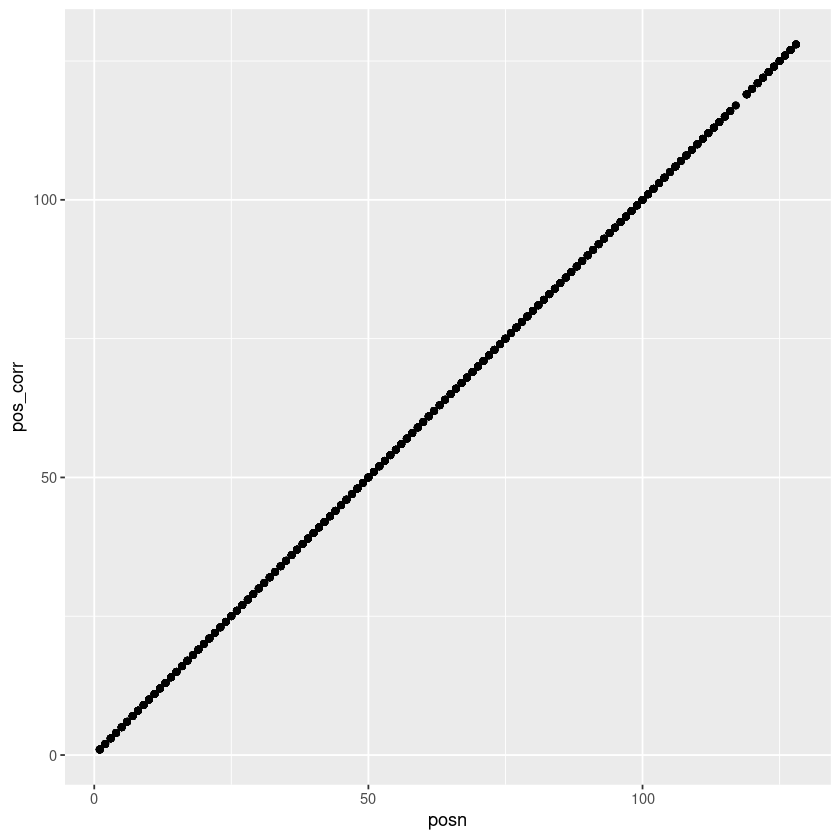

In [50]:
ggplot(gates,aes(posn,pos_corr))+geom_point()

In [51]:
head(gates)
nrow(gates)

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,pos_corr,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,1,A,32.06586,21.785350,62.86732,977.0166,1093.7351,1,0.02931776,0.019918305,0.05747947,0.8932845,0.1852693,missense
M,1,C,30.61455,26.120635,36.43751,1059.5648,1152.7375,1,0.02655813,0.022659656,0.03160955,0.9191727,0.1566032,missense
M,1,D,20.86659,12.432173,32.77214,600.2218,666.2927,1,0.03131746,0.018658726,0.04918580,0.9008380,0.1804556,missense
M,1,E,16.02083,46.722314,67.65495,948.4658,1078.8640,1,0.01484973,0.043306956,0.06270944,0.8791339,0.1938725,missense
M,1,F,20.93916,5.221222,27.59325,724.2368,777.9904,1,0.02691442,0.006711165,0.03546734,0.9309071,0.1296329,missense
M,1,G,61.49517,57.614989,98.02813,2376.7321,2593.8704,1,0.02370788,0.022211977,0.03779222,0.9162879,0.1533398,missense


[1] 2591

In [52]:
fwrite(gates,"042623_rawcountsbyMut_rep3.txt", sep="\t", row.names = F, quote = F)

In [53]:
gates_a <- gates[,c(1,9,3,14,8,15)]


fileName = paste("scores-replicate3-",Sys.Date(),".txt",sep="")
fileName

write.table(gates_a,fileName, row.names=F, quote=F,
         col.names=T, sep="\t")

rm(fileName)
head(gates_a)


[1] "scores-replicate3-2023-04-26.txt"

orig,pos_corr,new,score,totalRow,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
M,1,A,0.1852693,1093.7351,missense
M,1,C,0.1566032,1152.7375,missense
M,1,D,0.1804556,666.2927,missense
M,1,E,0.1938725,1078.8640,missense
M,1,F,0.1296329,777.9904,missense
M,1,G,0.1533398,2593.8704,missense


In [93]:
fileName = paste("scores-replicate3-2023-04-26.txt")
fileName
gates_a <- fread(fileName)

rm(fileName)
head(gates_a)

a2 <- fread("/scratch2/muhama1/6014-AM/scores-replicateA2-2023-04-26.txt", header=T, stringsAsFactors = F)
head(a2)

score2 <- fread("scores-replicate2-2023-04-26.txt", header=T, stringsAsFactors = F)
colnames(score2)[2]="pos_corr"
head(score2)

c <- merge(gates_a,score2, by=c("orig","pos_corr","new","category")) %>%
    merge(.,a2, by= c("orig","pos_corr","new","category")) %>%
   magrittr::set_names(c("orig","pos_corr","new","category","rep3","rep3_TC","rep2","rep2_TC","repA","repA_TC"))
head(c)
colnames(c)

[1] "scores-replicate3-2023-04-26.txt"

orig,pos_corr,new,score,totalRow,category
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
M,1,A,0.1852693,1093.7351,missense
M,1,C,0.1566032,1152.7375,missense
M,1,D,0.1804556,666.2927,missense
M,1,E,0.1938725,1078.8640,missense
M,1,F,0.1296329,777.9904,missense
M,1,G,0.1533398,2593.8704,missense


orig,pos_corr,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.9344435,missense,1628.624
M,1,C,0.9299419,missense,1641.610
M,1,D,0.9750137,missense,1232.795
M,1,E,0.8963225,missense,1142.154
M,1,F,0.8497856,missense,1315.343
M,1,G,0.9338761,missense,4541.336


orig,pos_corr,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.1907184,missense,837.9303
M,1,C,0.2430943,missense,1064.0472
M,1,D,0.3392268,missense,547.0070
M,1,E,0.2156087,missense,698.4014
M,1,F,0.1272307,missense,684.3895
M,1,G,0.1714656,missense,3116.2647


orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616


[1] "orig"     "pos_corr" "new"      "category" "rep3"     "rep3_TC" 
 [7] "rep2"     "rep2_TC"  "repA"     "repA_TC"

In [94]:
c[c$pos_corr ==1 & c$new=="A",]

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,missense,0.1852693,1093.735,0.1907184,837.9303,0.9344435,1628.624


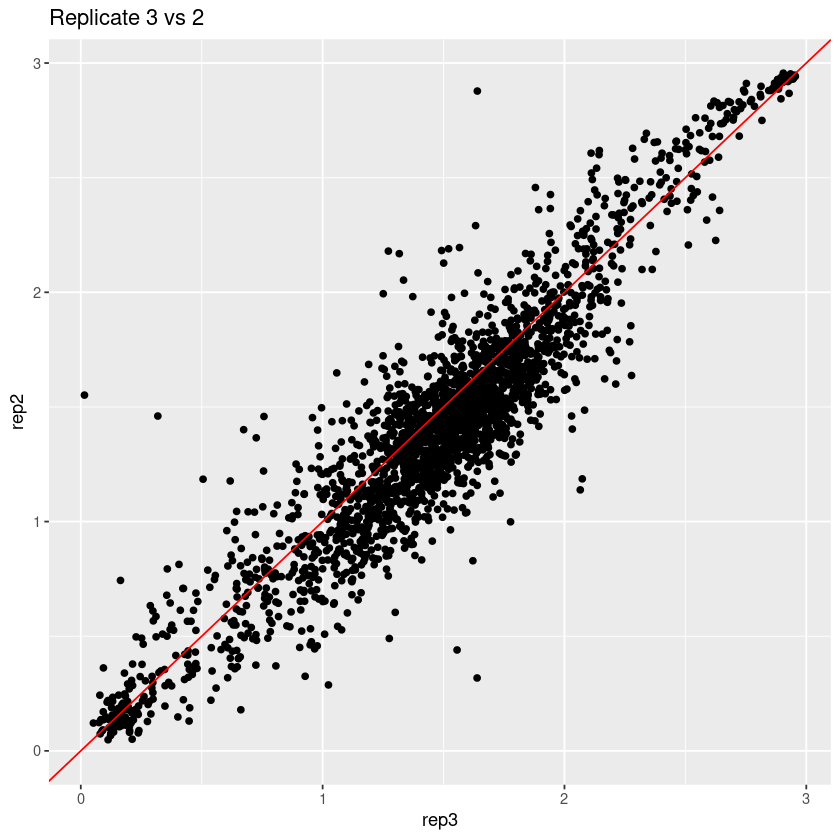

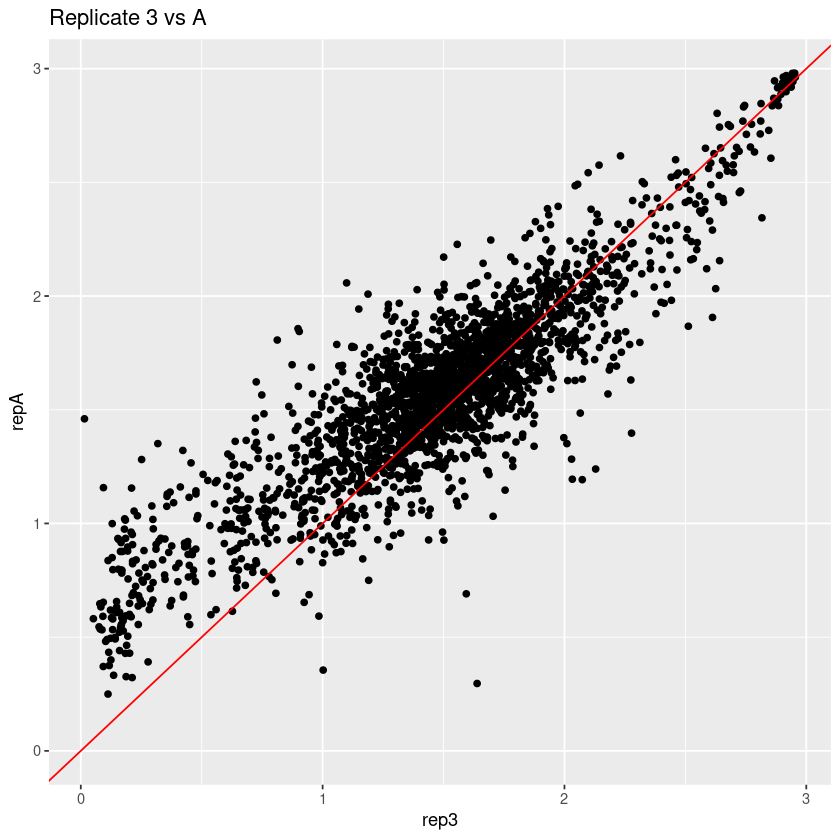

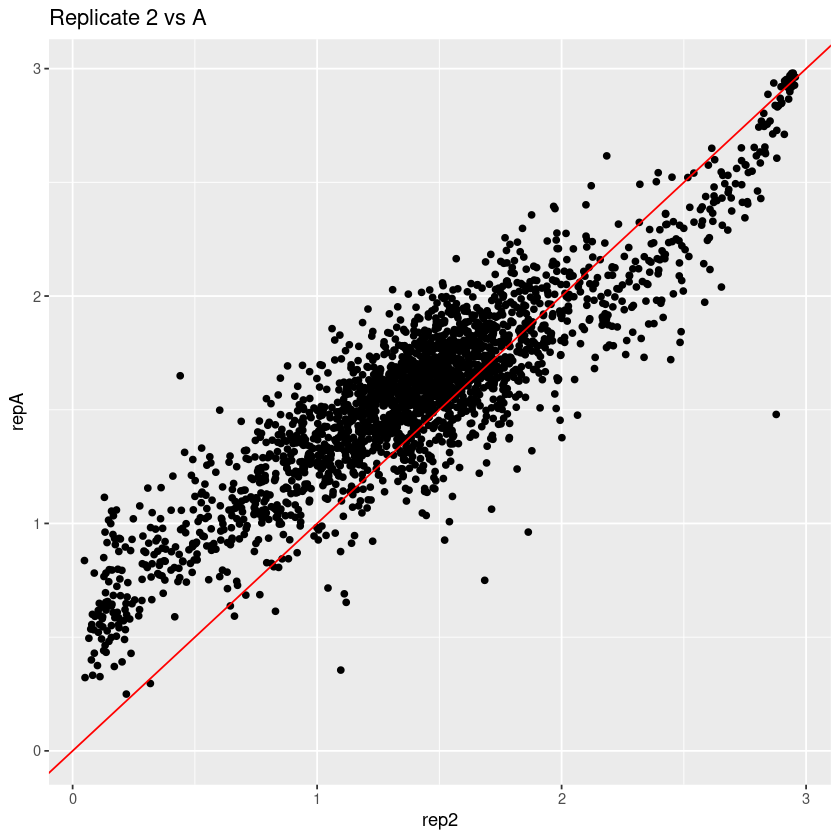

In [95]:
### correlation between synonymous scores 

ggplot(c[c$category=="missense",],aes(rep3,rep2))+geom_point()+
    geom_abline(slope=1,intercept=0, color="red") +ggtitle("Replicate 3 vs 2")

ggplot(c[c$category=="missense",],aes(rep3,repA))+geom_point()+
    geom_abline(slope=1,intercept=0, color="red")+ ggtitle("Replicate 3 vs A")

ggplot(c[c$category=="missense",],aes(rep2,repA))+geom_point()+
    geom_abline(slope=1,intercept=0, color="red")+ ggtitle("Replicate 2 vs A")

In [128]:
head(c)

my_cols <- c("#ffe74c", "#ff5964", "#38618c")  
#pairs(c[,5:7], pch = 19, cex = 0.5, lower.panel = NULL, 
#      col = as.factor(c$category))

print("mutations not in replicate 3")
length(which(is.na(c$rep3)))

print("mutations not in replicate 2")
length(which(is.na(c$rep2)))

print("mutations not in replicate A")
length(which(is.na(c$repA)))

c[c(which(is.na(c$rep3)),which(is.na(c$rep2)),which(is.na(c$repA))),]
#plotmatrix(c[,5:7])

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.4895
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716,2.125831,0.10760146,2554.5745
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053,1.834455,0.03011526,1430.6019
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813,1.725983,0.14957402,3034.2782
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227,1.698603,0.23449169,900.8131
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616,1.683312,0.10027871,10118.7365


[1] "mutations not in replicate 3"


[1] 0

[1] "mutations not in replicate 2"


[1] 0

[1] "mutations not in replicate A"


[1] 1

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Q,96,Q,synonymous,1.977221,14.62407,1.208951,0.06569563,NA,NA,1.593086,0.543249,14.68977


orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.4895
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716,2.125831,0.10760146,2554.5745
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053,1.834455,0.03011526,1430.6019
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813,1.725983,0.14957402,3034.2782
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227,1.698603,0.23449169,900.8131
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616,1.683312,0.10027871,10118.7365


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



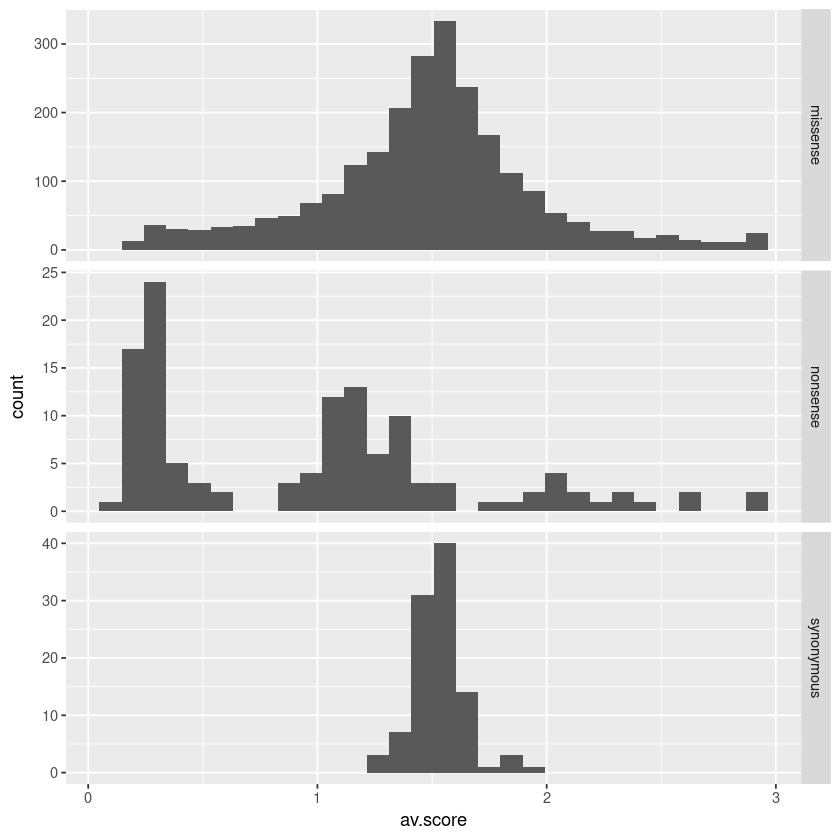

In [129]:
c$av.score = rowMeans(c[,c(5,7,9)], na.rm=T)
c$sd = apply(c[,c(5,7,9)],1,sd, na.rm=T)

c$tot_freq = rowSums(c[,c(6,8,10)], na.rm=T)
# the na.rm will account for taking average across one or two replicates
# where data are missing for 1 or more replicates 
head(c)

p <- ggplot(c,aes(av.score))+ geom_histogram()

p + facet_grid(rows=vars(category), scales="free")

In [130]:
c[which(is.na(c$av.score)),]
nrow(c)

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


[1] 2590

# now going to write all the scores (non-normalized, non-QC'd) 

In [131]:
head(c)

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.4895
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716,2.125831,0.10760146,2554.5745
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053,1.834455,0.03011526,1430.6019
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813,1.725983,0.14957402,3034.2782
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227,1.698603,0.23449169,900.8131
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616,1.683312,0.10027871,10118.7365


In [132]:
fileName = paste("scores-non-norm-allreps-notQC-",Sys.Date(),".txt",sep="")
fileName


fwrite(c,fileName,row.names=F, quote=F,
         col.names=T, sep="\t")

[1] "scores-non-norm-allreps-notQC-2023-04-26.txt"

# moving QC stuff from Matreyek et al up here 

<b> Of note, since the min-max normalization in the block below is a linear transformation, it should not matter whether I use the norm'd scores or actual scores. </b>

In [135]:
fileName = paste("scores-non-norm-allreps-notQC-2023-04-26.txt",sep="")
fileName

c2 <- fread(fileName, header=T, stringsAsFactors = F)

rm(fileName)


normalize <- function(x, na.rm = TRUE) {
    return((x- min(x,na.rm=T)) /(max(x,na.rm=T)-min(x, na.rm=T)))
}

c2$normrep3 = normalize(c2$rep3)
c2$normrep2 = normalize(c2$rep2)
c2$normrepA = normalize(c2$repA)

# I don't think I actually ended up using the normrep values 
syn <- c2[c2$category =="synonymous",]

# there are two synymous variants that have NAs in some gates --> skipping them for now. 
head(syn)

nrow(syn)

missense <- c2[c2$category =="missense",]

[1] "scores-non-norm-allreps-notQC-2023-04-26.txt"

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq,normrep3,normrep2,normrepA
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.489,0.4517946,0.3768130,0.4073538
A,31,A,synonymous,1.455488,932.4377,1.448105,816.3549,1.774831,908.5758,1.559475,0.18654091,2657.368,0.4886374,0.4850663,0.5779781
A,44,A,synonymous,1.438025,1672.0276,1.505310,1400.7544,1.557876,1718.4660,1.500404,0.06007566,4791.248,0.4827132,0.5046026,0.5020154
A,86,A,synonymous,1.503084,1145.1130,1.468570,892.0227,1.601871,714.9914,1.524508,0.06918453,2752.127,0.5047848,0.4920555,0.5174193
A,93,A,synonymous,1.491422,1339.2312,1.443348,1315.7474,1.527300,1486.8747,1.487357,0.04212325,4141.853,0.5008286,0.4834420,0.4913099
A,97,A,synonymous,1.544137,1085.5972,1.502606,970.2839,1.598318,1364.0280,1.548354,0.04799518,3419.909,0.5187128,0.5036791,0.5161756


[1] 100

In [136]:
df <- data.frame(cutoff = double(),synonymous3=double(),
                 cv3=double(), missense3 = double(), 
                 mean_syn3=double(), median_syn3=double(),
                synonymous2=double(), cv2=double(), 
                 missense2 = double(), mean_syn2=double(), 
                 median_syn2=double(), synonymousA=double(), 
                 cvA=double(), missenseA = double(), 
                 mean_synA=double(), median_synA=double()
                )

head(syn)
totCutoff = c(0,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,
              700,800,900,1000,1100,1200,1300,1500,2000)

for (x in totCutoff){
    a1 <- syn[syn$rep3_TC > x, ]
    a2 <- syn[syn$rep2_TC > x, ]
    a3 <- syn[syn$repA_TC > x, ]
    ms1 = length(which(missense$rep3_TC > x))
    ms2 = length(which(missense$rep2_TC > x))
    ms3 = length(which(missense$repA_TC > x))
    cv1 = sd(a1$normrep3, na.rm=T)/mean(a1$normrep3, na.rm=T)
    cv2 = sd(a2$normrep2, na.rm=T)/mean(a2$normrep2, na.rm=T)
    cv3 = sd(a3$normrepA, na.rm=T)/mean(a3$normrepA, na.rm=T)
    
    df[nrow(df)+1,] <- c(x, nrow(a1), 
                         cv1, ms1, 
                         mean(a1$normrep3, na.rm=T), median(a1$normrep3, na.rm=T),
                         nrow(a2), cv2, 
                         ms2, mean(a2$normrep2, na.rm=T), 
                         median(a2$normrep2, na.rm=T), nrow(a3), 
                         cv3, ms3, 
                         mean(a3$normrepA, na.rm=T), median(a3$normrepA, na.rm=T)
                        )
                
}

head(df)

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq,normrep3,normrep2,normrepA
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.489,0.4517946,0.3768130,0.4073538
A,31,A,synonymous,1.455488,932.4377,1.448105,816.3549,1.774831,908.5758,1.559475,0.18654091,2657.368,0.4886374,0.4850663,0.5779781
A,44,A,synonymous,1.438025,1672.0276,1.505310,1400.7544,1.557876,1718.4660,1.500404,0.06007566,4791.248,0.4827132,0.5046026,0.5020154
A,86,A,synonymous,1.503084,1145.1130,1.468570,892.0227,1.601871,714.9914,1.524508,0.06918453,2752.127,0.5047848,0.4920555,0.5174193
A,93,A,synonymous,1.491422,1339.2312,1.443348,1315.7474,1.527300,1486.8747,1.487357,0.04212325,4141.853,0.5008286,0.4834420,0.4913099
A,97,A,synonymous,1.544137,1085.5972,1.502606,970.2839,1.598318,1364.0280,1.548354,0.04799518,3419.909,0.5187128,0.5036791,0.5161756


,cutoff,synonymous3,cv3,missense3,mean_syn3,median_syn3,synonymous2,cv2,missense2,mean_syn2,median_syn2,synonymousA,cvA,missenseA,mean_synA,median_synA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,100,0.1073223,2366,0.5168784,0.5059585,100,0.1111563,2366,0.4906198,0.4853281,99,0.09785679,2366,0.5196774,0.5285982
2,10,100,0.1073223,2365,0.5168784,0.5059585,99,0.1100566,2363,0.4915009,0.4855899,99,0.09785679,2366,0.5196774,0.5285982
3,20,99,0.1041383,2363,0.5153757,0.5057228,99,0.1100566,2361,0.4915009,0.4855899,99,0.09785679,2364,0.5196774,0.5285982
4,30,99,0.1041383,2362,0.5153757,0.5057228,99,0.1100566,2359,0.4915009,0.4855899,99,0.09785679,2358,0.5196774,0.5285982
5,40,99,0.1041383,2359,0.5153757,0.5057228,99,0.1100566,2359,0.4915009,0.4855899,99,0.09785679,2356,0.5196774,0.5285982
6,50,99,0.1041383,2357,0.5153757,0.5057228,99,0.1100566,2356,0.4915009,0.4855899,99,0.09785679,2353,0.5196774,0.5285982


In [137]:
mean(syn$normrep3)

[1] 0.5168784

png 
  2

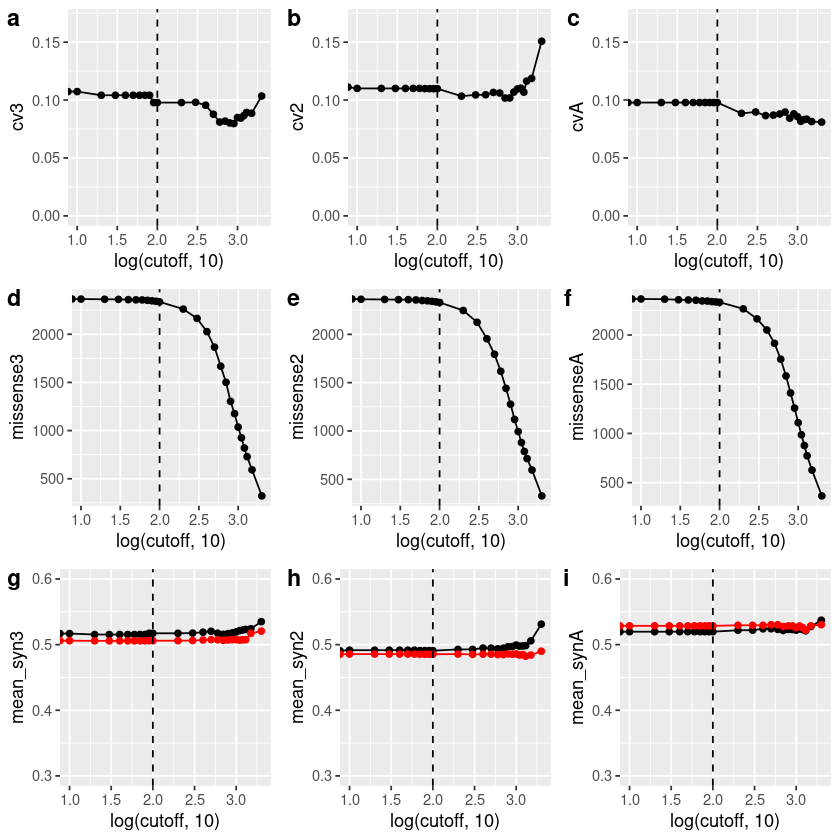

In [138]:
p1 = ggplot(df,aes(log(cutoff,10), cv3)) +ylim(0.0,0.17) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p2 = ggplot(df,aes(log(cutoff,10), missense3)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p3 = ggplot(df,aes(log(cutoff,10), mean_syn3)) + geom_point() + geom_line() + geom_point(data=df, aes(log(cutoff,10),median_syn3),col="red")+geom_line(data=df, aes(log(cutoff,10),median_syn3),col="red") +ylim(.3,.6)+geom_vline(xintercept = 2, lty=2)

p4 = ggplot(df,aes(log(cutoff,10), cv2)) + ylim(0.0,0.17) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p5 = ggplot(df,aes(log(cutoff,10), missense2)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p6 = ggplot(df,aes(log(cutoff,10), mean_syn2)) + geom_point() + geom_line() + geom_point(data=df, aes(log(cutoff,10),median_syn2),col="red")+geom_line(data=df, aes(log(cutoff,10),median_syn2),col="red") +ylim(.3,.6)+geom_vline(xintercept = 2, lty=2)

p7 = ggplot(df,aes(log(cutoff,10), cvA)) +ylim(0.0,0.17)+ geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p8 = ggplot(df,aes(log(cutoff,10), missenseA)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p9 = ggplot(df,aes(log(cutoff,10), mean_synA)) + geom_point() + geom_line() +geom_point(data=df, aes(log(cutoff,10),median_synA),col="red")+geom_line(data=df, aes(log(cutoff,10),median_synA),col="red") +ylim(.3,.6)+geom_vline(xintercept = 2, lty=2)

ggarrange(p1,p4,p7,
          p2,p5,p8,
          p3,p6,p9,
          labels = c(letters[1:9]), nrow=3, ncol=3)

pdfName = paste("Ftot_QC_allreps-",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)
ggarrange(p1,p4,p7,
          p2,p5,p8,
          p3,p6,p9,
          labels = c(letters[1:9]), nrow=3, ncol=3)
dev.off()

rm(pdfName)

Sent the graph Ftot_QC_allreps.pdf to AMG and DMR with 10^2 as proposed cutoff - approved

### The cut off is at 10^2, so now the bottom stuff is post QC. 

This mutation (M62V) with no scores across any gates is coming from the subAssembly file (where it was a preMature Seq, and represented by ONLY 1 barcode so feel okay ignoring this)

In [139]:
c2 <- c2[(c2$rep3_TC>100 & c2$rep2_TC>100) | 
         (c2$repA_TC>100 & c2$rep2_TC>100) |
        (c2$rep3_TC>100 & c2$repA_TC>100),]

c2$cat_ns= ifelse((c2$category =="nonsense" & c2$pos_corr <56),
                  "earlyNS", ifelse((c2$category=="nonsense" & c2$pos_corr >55), "lateNS", c2$category))

nrow(c2)

summary(c2)

[1] 2554

     orig              pos_corr          new              category        
 Length:2554        Min.   :  1.00   Length:2554        Length:2554       
 Class :character   1st Qu.: 32.00   Class :character   Class :character  
 Mode  :character   Median : 63.00   Mode  :character   Mode  :character  
                    Mean   : 63.41                                        
                    3rd Qu.: 94.00                                        
                    Max.   :128.00                                        
      rep3            rep3_TC             rep2            rep2_TC       
 Min.   :0.04554   Min.   :  46.59   Min.   :0.02774   Min.   :  46.47  
 1st Qu.:1.21389   1st Qu.: 541.47   1st Qu.:1.09701   1st Qu.: 513.24  
 Median :1.49950   Median : 888.57   Median :1.40627   Median : 853.39  
 Mean   :1.45022   Mean   :1120.68   Mean   :1.37844   Mean   :1112.28  
 3rd Qu.:1.73706   3rd Qu.:1485.03   3rd Qu.:1.65301   3rd Qu.:1480.84  
 Max.   :2.96277   Max.   :7025.38   

In [140]:
# checking the normality of each distribution

head(c2)

# missense
ms <- c2[c2$category=="missense",]

shapiro.test(ms$rep3)

ks.test(ms$rep3, "pnorm", mean=mean(ms$rep3), sd=sd(ms$rep3))

# nonsense
ns <- c2[c2$category=="nonsense",]
sort(unique(ns$pos_corr))

length(unique(ns$pos_corr))

shapiro.test(ns$rep2)

# synonymous
sn <- c2[c2$category=="synonymous",]

shapiro.test(sn$rep3)


cor.test(sn$repA, sn$rep2, method=c("spearman"))

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq,normrep3,normrep2,normrepA,cat_ns
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.4895,0.4517946,0.3768130,0.4073538,synonymous
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716,2.125831,0.10760146,2554.5745,0.7005160,0.7584960,0.6738740,missense
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053,1.834455,0.03011526,1430.6019,0.6208108,0.6249868,0.5869541,missense
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813,1.725983,0.14957402,3034.2782,0.6198772,0.5223455,0.5792117,missense
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227,1.698603,0.23449169,900.8131,0.4862454,0.6439695,0.5636715,missense
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616,1.683312,0.10027871,10118.7365,0.6052123,0.5454234,0.5258655,missense



	Shapiro-Wilk normality test

data:  ms$rep3
W = 0.96733, p-value < 2.2e-16



	One-sample Kolmogorov-Smirnov test

data:  ms$rep3
D = 0.080625, p-value = 1.243e-13
alternative hypothesis: two-sided


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  30  31  32  33  34  36  37  38
 [37]  39  40  42  43  44  45  46  47  49  50  51  52  54  55  56  58  60  62
 [55]  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
 [73]  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 [91] 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 119
[109] 120 121 122 123 124 125 126 127 128

[1] 117


	Shapiro-Wilk normality test

data:  ns$rep2
W = 0.87127, p-value = 1.183e-08



	Shapiro-Wilk normality test

data:  sn$rep3
W = 0.93232, p-value = 7.99e-05



	Spearman's rank correlation rho

data:  sn$repA and sn$rep2
S = 101214, p-value = 0.0003684
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3547042 


png 
  2

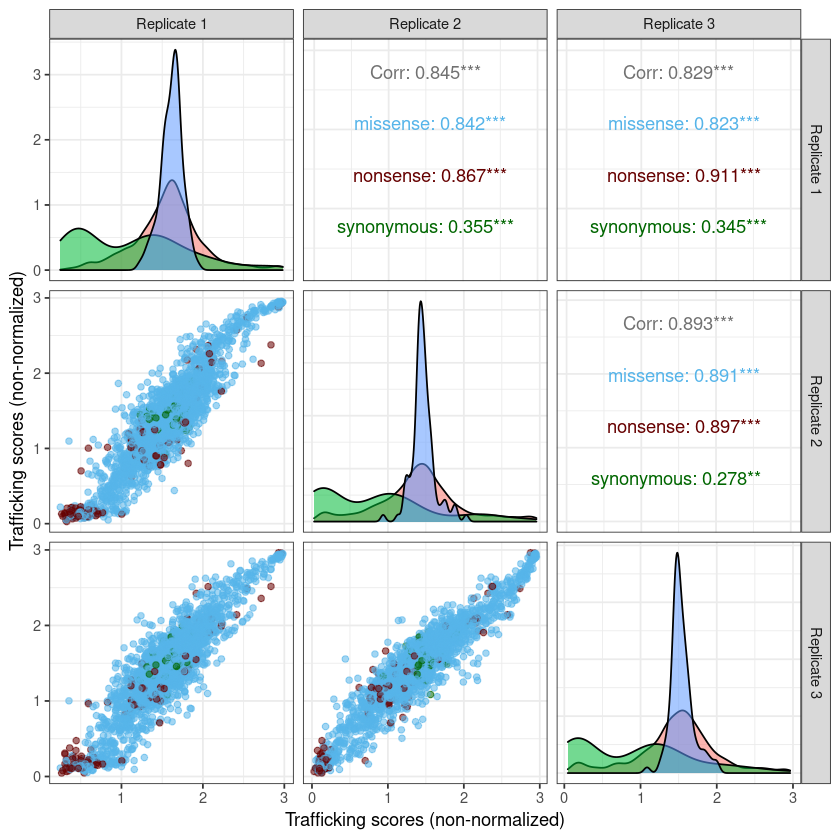

In [141]:
ggpairs(c2,
      columns = c("repA","rep2","rep3"),columnLabels = c("Replicate 1","Replicate 2","Replicate 3"),
       mapping = aes(color=category, alpha =0.5), upper = list(continuous = wrap("cor", method = "spearman")))+
theme_bw()+scale_color_manual(values=c("#56B4E9","#660000","#006600"), labels=c("Missense","Nonsense","Synonymous"))+
xlab("Trafficking scores (non-normalized)")+ylab("Trafficking scores (non-normalized)")


pdfName = paste("correlationplots-",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)

ggpairs(c2,
      columns = c("repA","rep2","rep3"),columnLabels = c("Replicate 1","Replicate 2","Replicate 3"),
       mapping = aes(color=category, alpha =0.5), upper = list(continuous = wrap("cor", method = "spearman")))+
theme_bw()+scale_color_manual(values=c("#56B4E9","#660000","#006600"), labels=c("Missense","Nonsense","Synonymous"))+
xlab("Trafficking scores (non-normalized)")+ylab("Trafficking scores (non-normalized)")

dev.off()

rm(pdfName)

png 
  2

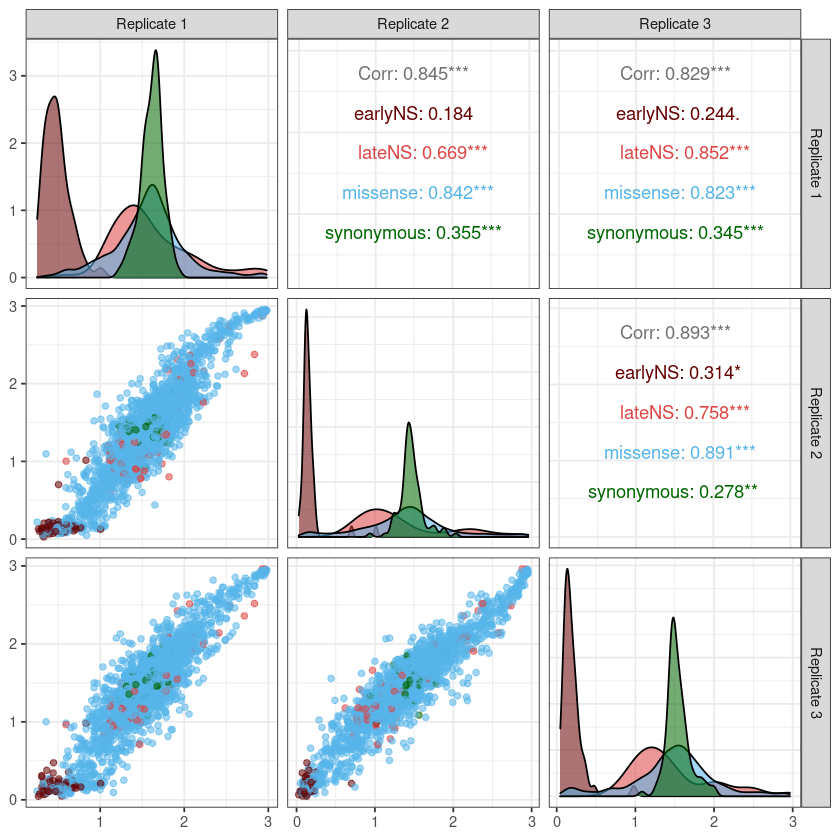

In [142]:
ggpairs(c2,
      columns = c("repA","rep2","rep3"),columnLabels = c("Replicate 1","Replicate 2","Replicate 3"),
       mapping = aes(color=cat_ns, alpha =0.5), upper = list(continuous = wrap("cor", method = "spearman")))+
theme_bw()+scale_color_manual(values=c("#660000", "#DD4444", "#56B4E9","#006600"), labels=c("Early nonsense", "Late nonsense", "Missense","Synonymous"))+
  scale_fill_manual(values=c("#660000", "#DD4444", "#56B4E9","#006600"),labels=c("Early nonsense", "Late nonsense", "Missense","Synonymous"))

pdfName = paste("correlationplotsEarlyVLate-",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)

ggpairs(c2,
      columns = c("repA","rep2","rep3"),columnLabels = c("Replicate 1","Replicate 2","Replicate 3"),
       mapping = aes(color=cat_ns, alpha =0.5), upper = list(continuous = wrap("cor", method = "spearman")))+
theme_bw()+scale_color_manual(values=c("#660000", "#DD4444", "#56B4E9","#006600"), labels=c("Early nonsense", "Late nonsense", "Missense","Synonymous"))+
  scale_fill_manual(values=c("#660000", "#DD4444", "#56B4E9","#006600"),labels=c("Early nonsense", "Late nonsense", "Missense","Synonymous"))

dev.off()

rm(pdfName)
        

        # Of note, the correlation plot made on Jan10-2022 is pearson, and the one made on Jan11-2022 is spearman 

### UPDATE Jan 10th 2022, 

Now looking at variation of the scores by looking at the SD column --> NOT SURE IF INCLUDE THIS IN THE FINAL PAPER

The plot above shows that for really low scores, and for really high scores, there is good concordance between replicates. 

I wonder if removing the replicate that does not agree is the away to go? 

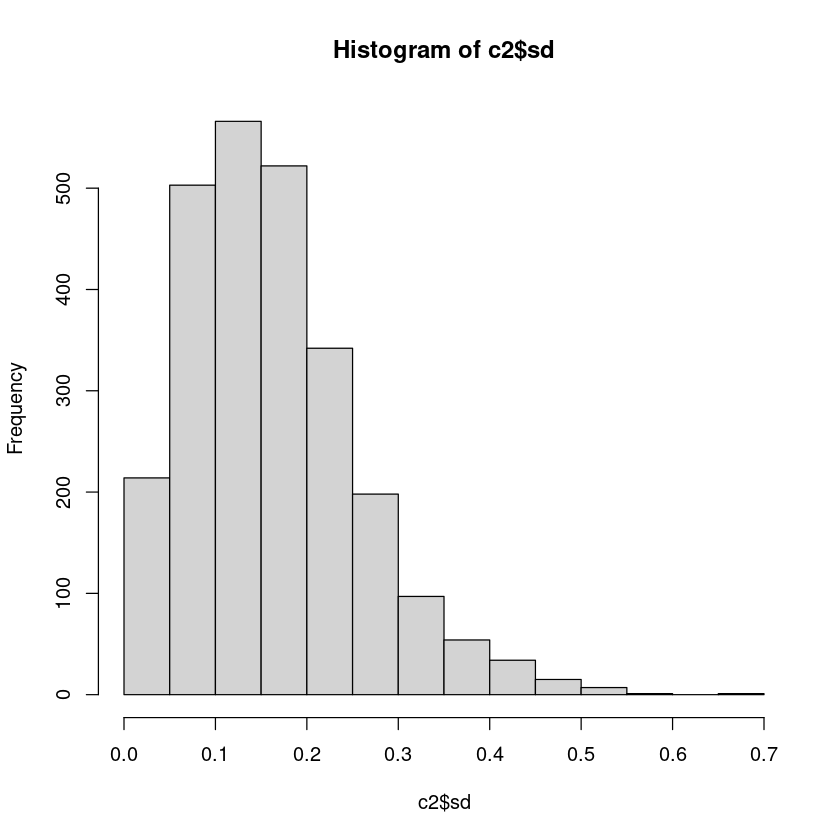

In [143]:
hist(c2$sd)

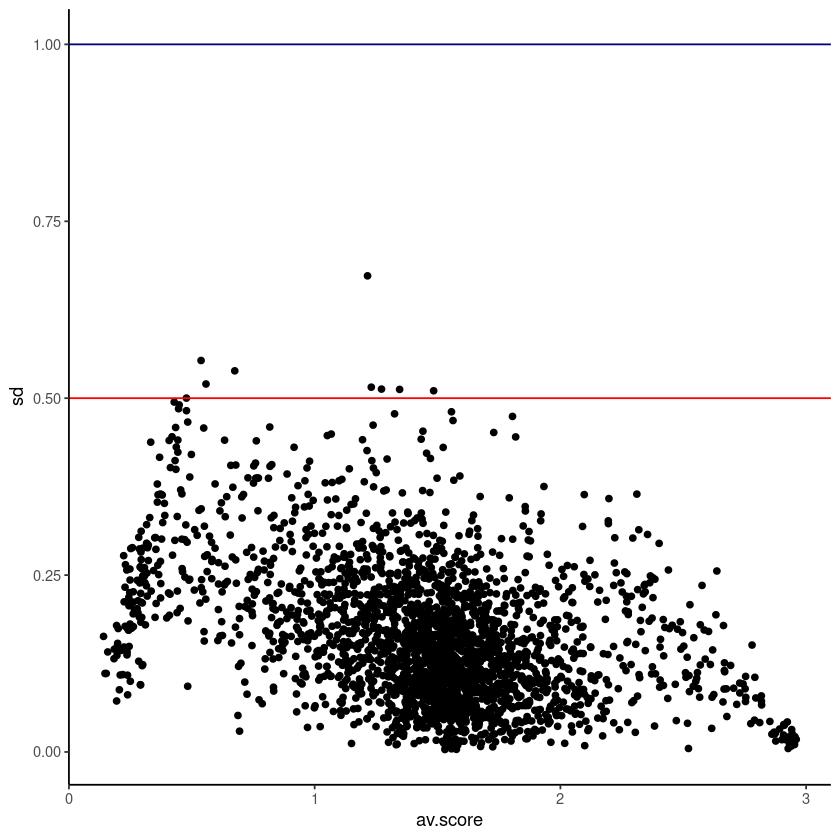


Call:
lm(formula = av.score ~ sd, data = c2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4606 -0.2290 -0.0049  0.2240  1.3788 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.81018    0.01814   99.78   <2e-16 ***
sd          -2.15898    0.09704  -22.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.458 on 2552 degrees of freedom
Multiple R-squared:  0.1625,	Adjusted R-squared:  0.1621 
F-statistic:   495 on 1 and 2552 DF,  p-value: < 2.2e-16


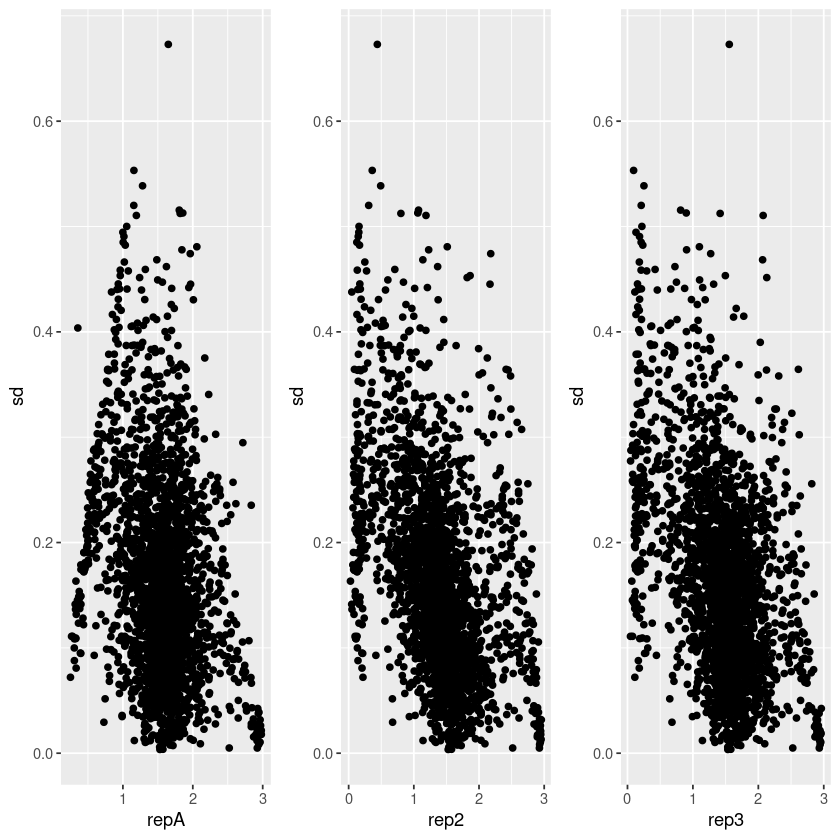

In [144]:
ggplot(c2,aes(av.score,sd))+geom_point()+
    geom_hline(yintercept = 0.5, col="red")+
        geom_hline(yintercept = 1, col="navy")+ theme_classic()


q <- ggplot(c2,aes(repA,sd))+ geom_point(fill="white", col="black")
r <- ggplot(c2,aes(rep2,sd))+ geom_point(fill="blue", col="black")
s <- ggplot(c2,aes(rep3,sd))+ geom_point(fill="red", col="black")
grid.arrange(q,r,s, ncol=3)

summary(lm(av.score~sd, data=c2))
# there is correlation between position and sd 


In [145]:
nrow(c2)
length(which(c2$sd<0.5))
length(which(c2$sd<1))
# 2153 if remove all with sd >0.5, still maintain ~80% diversity 

[1] 2554

[1] 2545

[1] 2554



### Nonsense variant analyses 

#### early vs late non-sense variants

In [146]:
head(c2)

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq,normrep3,normrep2,normrepA,cat_ns
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.4895,0.4517946,0.3768130,0.4073538,synonymous
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716,2.125831,0.10760146,2554.5745,0.7005160,0.7584960,0.6738740,missense
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053,1.834455,0.03011526,1430.6019,0.6208108,0.6249868,0.5869541,missense
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813,1.725983,0.14957402,3034.2782,0.6198772,0.5223455,0.5792117,missense
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227,1.698603,0.23449169,900.8131,0.4862454,0.6439695,0.5636715,missense
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616,1.683312,0.10027871,10118.7365,0.6052123,0.5454234,0.5258655,missense


[1] 2554

     orig              pos_corr          new              category        
 Length:2554        Min.   :  1.00   Length:2554        Length:2554       
 Class :character   1st Qu.: 32.00   Class :character   Class :character  
 Mode  :character   Median : 63.00   Mode  :character   Mode  :character  
                    Mean   : 63.41                                        
                    3rd Qu.: 94.00                                        
                    Max.   :128.00                                        
      rep3            rep3_TC           cat_ns         
 Min.   :0.04554   Min.   :  46.59   Length:2554       
 1st Qu.:1.21389   1st Qu.: 541.47   Class :character  
 Median :1.49950   Median : 888.57   Mode  :character  
 Mean   :1.45022   Mean   :1120.68                     
 3rd Qu.:1.73706   3rd Qu.:1485.03                     
 Max.   :2.96277   Max.   :7025.38                     

[1] 0.1608542

[1] 1.506543

orig,pos_corr,new,category,rep3,rep3_TC,cat_ns,trans_rep3
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
A,8,A,synonymous,1.346890,759.2853,synonymous,0.8813597
A,8,C,missense,2.080018,1019.2868,missense,1.4261573
A,8,D,missense,1.845080,520.2264,missense,1.2515716
A,8,E,missense,1.842328,1045.6869,missense,1.2495267
A,8,F,missense,1.448437,312.0468,missense,0.9568205
A,8,G,missense,1.799102,4033.4437,missense,1.2174048


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



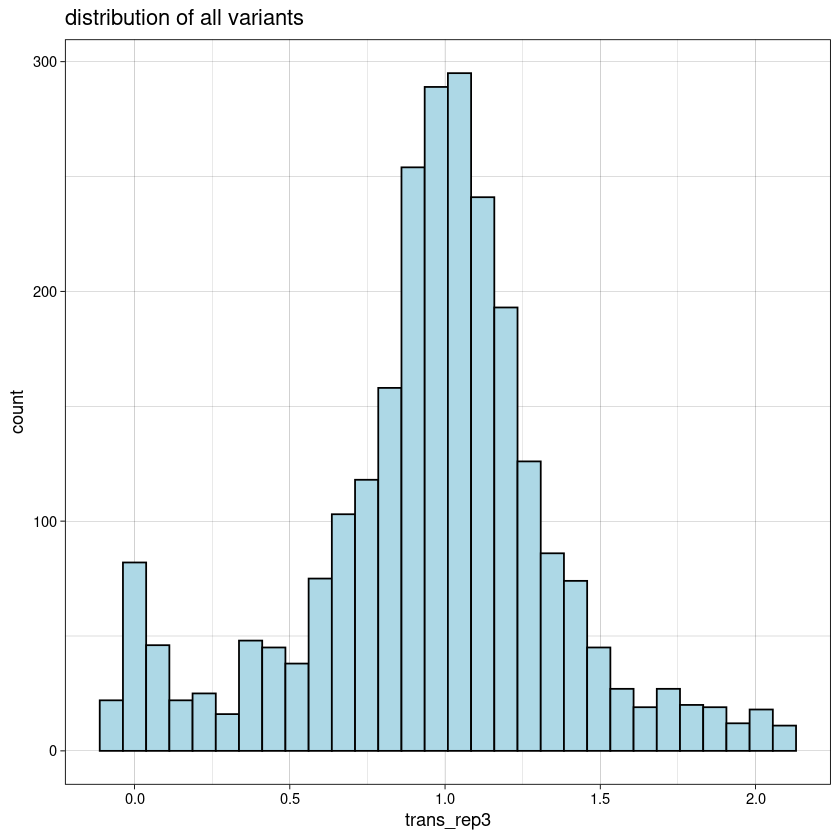

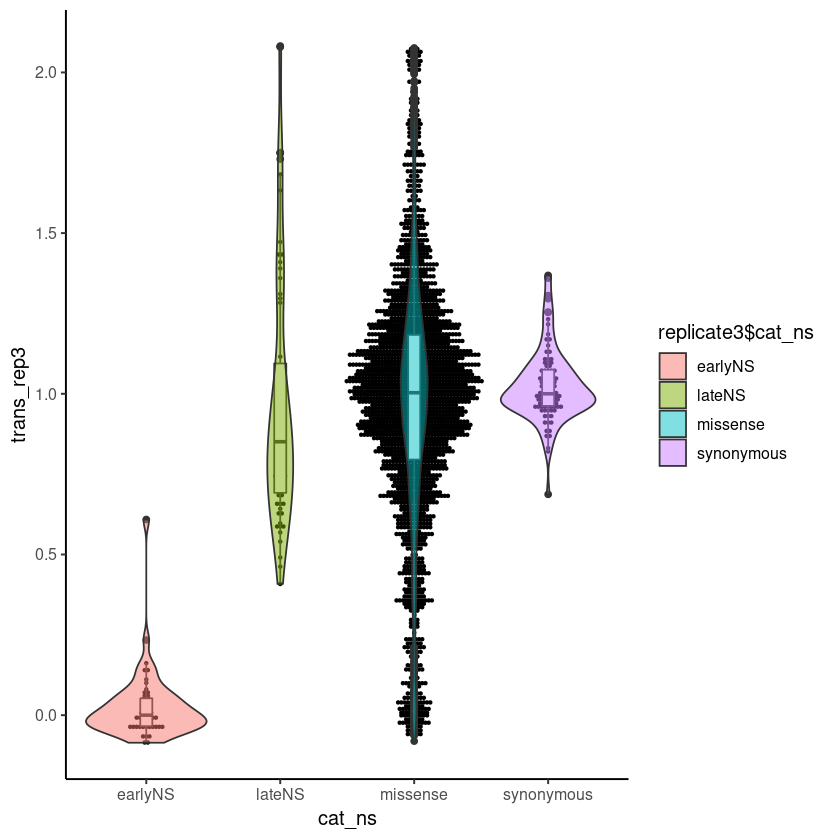

In [147]:
replicate3 <- c2[,c(1:6,17)]

nrow(replicate3)
summary(replicate3)

#### min max normalization with median of syn =1 and median of early ns = 0 
#### formula: score = (<score of variant> - <median of earlyns>)/(<median of syn> - <median of earlyns>)
wENS = as.numeric(tapply(replicate3$rep3, replicate3$cat_ns =="earlyNS", median) [2])

wSyn = as.numeric(tapply(replicate3$rep3, replicate3$cat_ns =="synonymous", median) [2])

wENS
wSyn
# tapply(replicate3$rep3, replicate3$cat_ns, median)

replicate3$trans_rep3 = (replicate3$rep3-wENS)/(wSyn - wENS)

head(replicate3)
p <- ggplot(replicate3,aes(trans_rep3)) 
p1 <- ggplot(replicate3,aes(cat_ns,trans_rep3)) 
p + geom_histogram(fill="lightblue",col="black")+theme_linedraw()+ggtitle("distribution of all variants")

p1 +geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicate3$cat_ns),alpha=0.5)+theme_classic2()

orig,pos_corr,new,category,rep2,rep2_TC,cat_ns
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
A,8,A,synonymous,1.131119,667.2674,synonymous
A,8,C,missense,2.248757,1029.4162,missense
A,8,D,missense,1.857818,458.2703,missense
A,8,E,missense,1.557265,1017.9101,missense
A,8,F,missense,1.913402,305.6436,missense
A,8,G,missense,1.624841,3032.1311,missense


[1] 2554

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



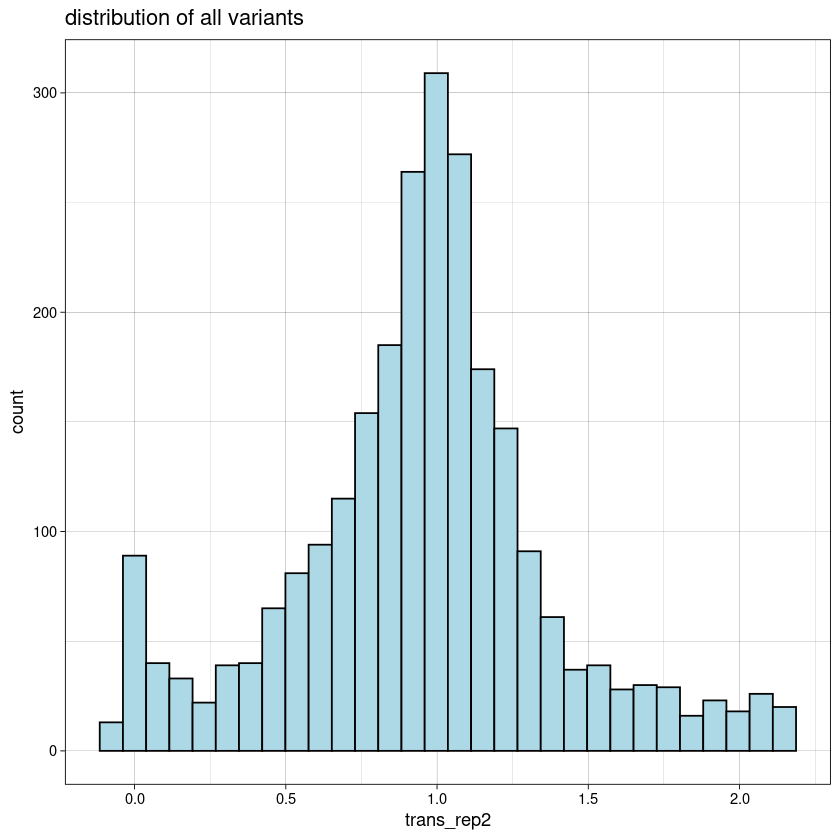

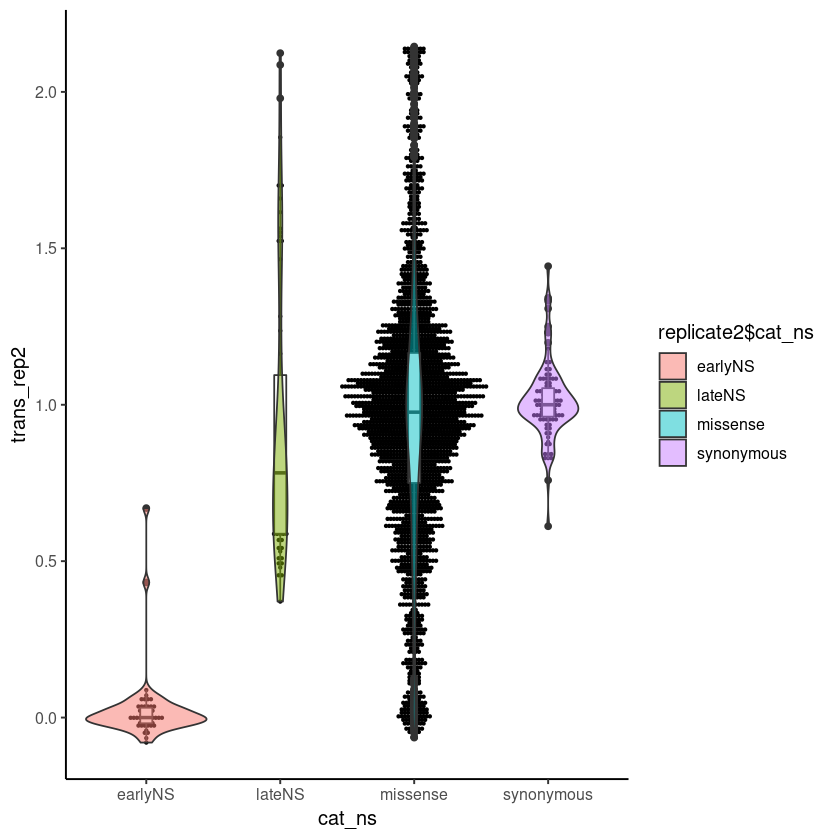

In [148]:
replicate2 <- c2[,c(1:4,7:8,17)]

head(replicate2)
nrow(replicate2)


#### min max normalization with median of syn =1 and median of early ns = 0 
#### formula: score = (<score of variant> - <median of earlyns>)/(<median of syn> - <median of earlyns>)
wENS = as.numeric(tapply(replicate2$rep2, replicate2$cat_ns =="earlyNS", median) [2])

wSyn = as.numeric(tapply(replicate2$rep2, replicate2$cat_ns =="synonymous", median) [2])


# tapply(replicate3$rep3, replicate3$cat_ns, median)

replicate2$trans_rep2 = (replicate2$rep2-wENS)/(wSyn - wENS)

p <- ggplot(replicate2,aes(trans_rep2)) 
p1 <- ggplot(replicate2,aes(cat_ns,trans_rep2)) 
p + geom_histogram(fill="lightblue",col="black")+theme_linedraw()+ggtitle("distribution of all variants")

p1 +geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicate2$cat_ns),alpha=0.5)+theme_classic2()

orig,pos_corr,new,category,repA,repA_TC,cat_ns
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
A,8,A,synonymous,1.287515,757.9368,synonymous
A,8,C,missense,2.048717,505.8716,missense
A,8,D,missense,1.800467,452.1053,missense
A,8,E,missense,1.778355,970.6813,missense
A,8,F,missense,1.733971,283.1227,missense
A,8,G,missense,1.625994,3053.1616,missense


[1] 2554

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



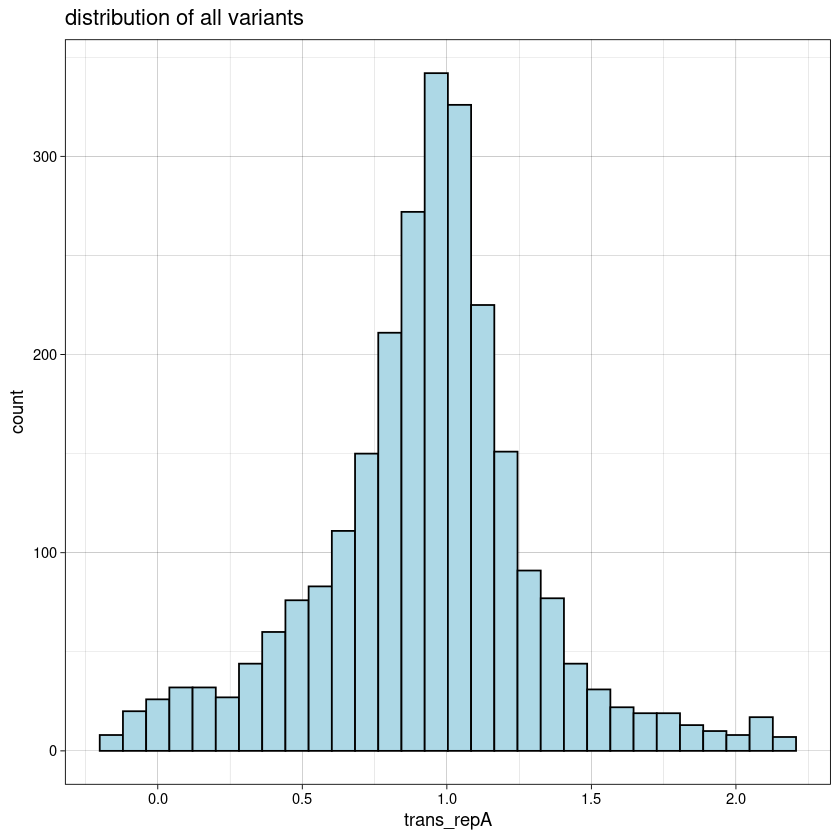

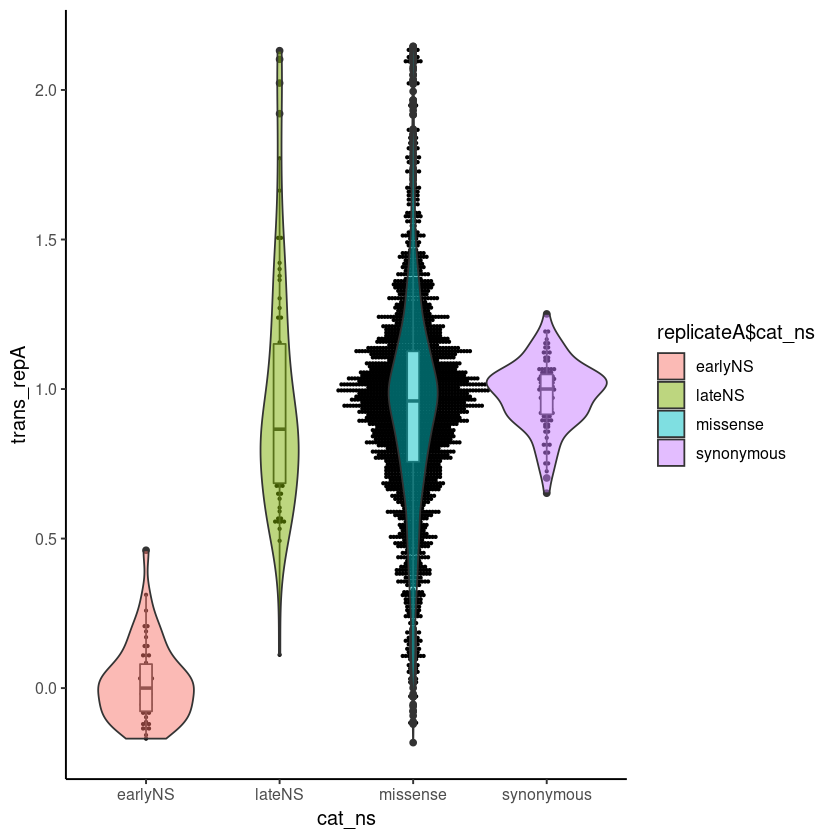

In [149]:
replicateA <- c2[,c(1:4,9:10,17)]

head(replicateA)
nrow(replicateA)


#### min max normalization with median of syn =1 and median of early ns = 0 
#### formula: score = (<score of variant> - <median of earlyns>)/(<median of syn> - <median of earlyns>)
wENS = as.numeric(tapply(replicateA$repA, replicateA$cat_ns =="earlyNS", median) [2])

wSyn = as.numeric(tapply(replicateA$repA, replicateA$cat_ns =="synonymous", median) [2])


# tapply(replicate3$rep3, replicate3$cat_ns, median)

replicateA$trans_repA = (replicateA$repA-wENS)/(wSyn - wENS)

p <- ggplot(replicateA,aes(trans_repA)) 
p1 <- ggplot(replicateA,aes(cat_ns,trans_repA)) 
p + geom_histogram(fill="lightblue",col="black")+theme_linedraw()+ggtitle("distribution of all variants")

p1 +geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicateA$cat_ns),alpha=0.5)+theme_classic2()

In [150]:
## plots of all score distributions violin plots. 

pdfName = paste("normalizedScoreplots-2022-01-13.pdf",sep="")


p1 <- ggplot(replicate3,aes(cat_ns,trans_rep3)) + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicate3$cat_ns),alpha=0.5)+theme_classic2()+labs(title="Replicate3")

p2 <- ggplot(replicateA,aes(cat_ns,trans_repA)) + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicateA$cat_ns),alpha=0.5)+theme_classic2()+labs(title="ReplicateA")

p3 <- ggplot(replicate2,aes(cat_ns,trans_rep2)) + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicate2$cat_ns),alpha=0.5)+theme_classic2()+labs(title="Replicate2")

pdf(pdfName,useDingbats = F)
ggarrange(p1,p2,p3,
          labels = c(letters[1:3]), nrow=3, ncol=1)
dev.off()
rm(pdfName)

png 
  2

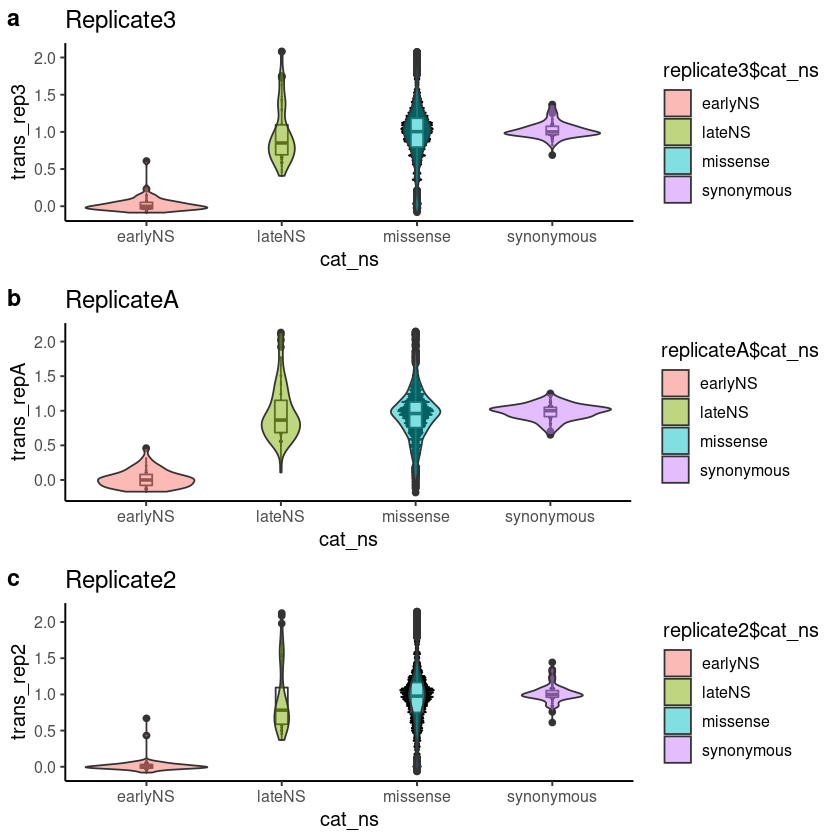

In [151]:
p1 <- ggplot(replicate3,aes(cat_ns,trans_rep3)) + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicate3$cat_ns),alpha=0.5)+theme_classic2()+labs(title="Replicate3")

p2 <- ggplot(replicateA,aes(cat_ns,trans_repA)) + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicateA$cat_ns),alpha=0.5)+theme_classic2()+labs(title="ReplicateA")

p3 <- ggplot(replicate2,aes(cat_ns,trans_rep2)) + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01)+geom_boxplot(width=0.09)+ 
    geom_violin(aes(fill=replicate2$cat_ns),alpha=0.5)+theme_classic2()+labs(title="Replicate2")

ggarrange(p1,p2,p3,
          labels = c(letters[1:3]), nrow=3, ncol=1)

#### nonsense score plotting

looked at SMA package, and because we have a lot of empty slots, right now, the average does not look great. 

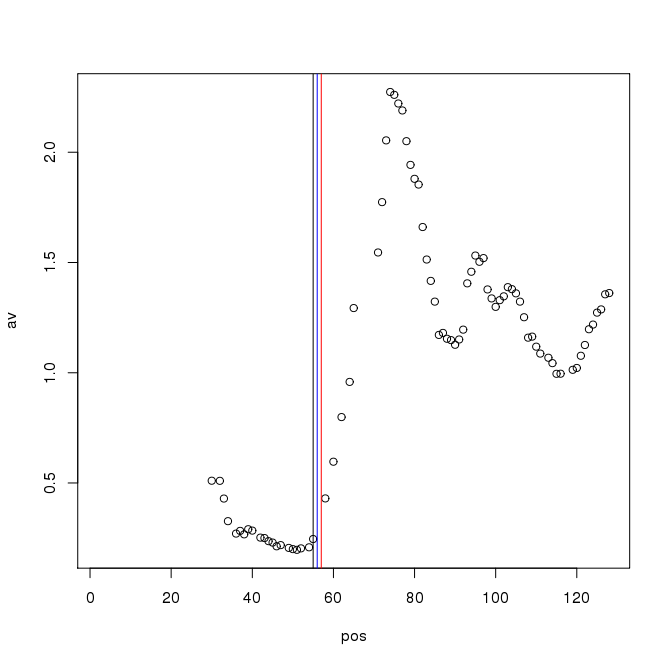

So starting with normal average scores

In [152]:
### non-sense score plotting 

ns <- c2[c2$category=="nonsense",]

head(ns)

wilcox.test(ns$repA ~ ns$cat_ns)
wilcox.test(ns$rep2 ~ ns$cat_ns)
wilcox.test(ns$rep3 ~ ns$cat_ns)

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq,normrep3,normrep2,normrepA,cat_ns
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A,8,X,nonsense,0.23579264,497.7474,0.14353604,749.5402,0.5093437,1124.1543,0.2962241,0.1902440,2371.4419,0.07484303,0.03954508,0.13489239,earlyNS
A,31,X,nonsense,0.06651736,101.7138,0.02774075,159.5616,0.3280685,190.6747,0.1407755,0.1633551,451.9501,0.01741461,0.00000000,0.07142241,earlyNS
A,44,X,nonsense,0.11292711,828.2183,0.10835030,1030.7070,0.3680266,1621.2343,0.1964347,0.1486206,3480.1596,0.03315960,0.02752885,0.08541296,earlyNS
A,86,X,nonsense,1.33848964,483.3121,0.99534953,625.4850,1.4161813,608.0782,1.2500068,0.2239347,1716.8754,0.44894458,0.33044662,0.45240385,lateNS
A,93,X,nonsense,1.92462085,1309.9468,2.18999608,1139.5618,2.1308920,1084.5138,2.0818363,0.1393228,3534.0224,0.64779576,0.73842856,0.70264581,lateNS
A,97,X,nonsense,1.66181244,271.5680,0.96976761,388.2818,1.7349524,623.0907,1.4555108,0.4222526,1282.9405,0.55863524,0.32171017,0.56401531,lateNS



	Wilcoxon rank sum test with continuity correction

data:  ns$repA by ns$cat_ns
W = 10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  ns$rep2 by ns$cat_ns
W = 26, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  ns$rep3 by ns$cat_ns
W = 9, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


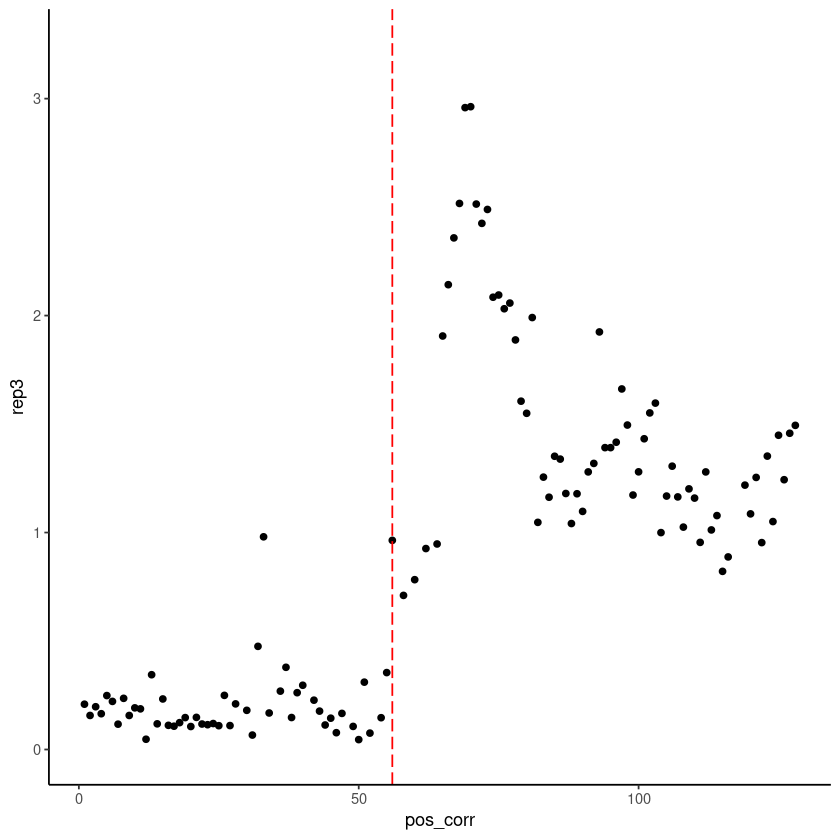

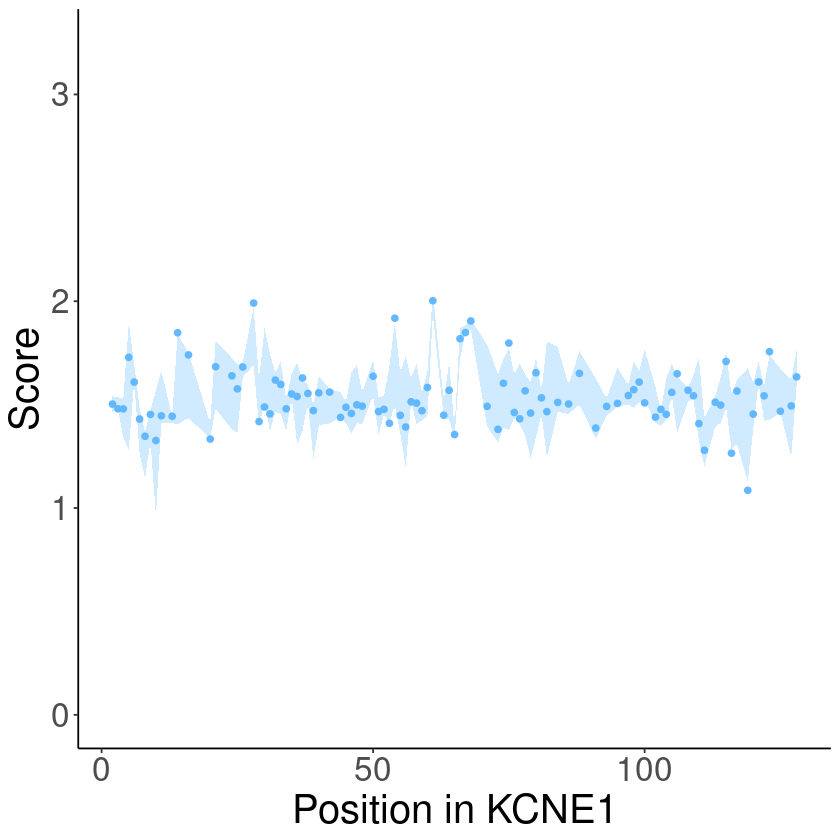

png 
  2

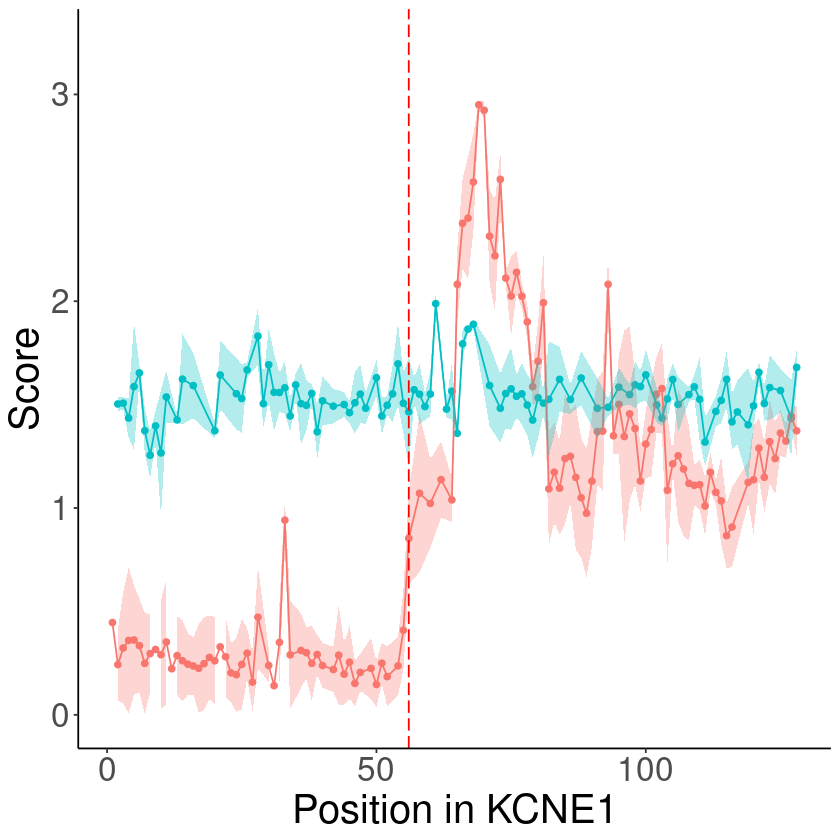

In [153]:
### non-sense score plotting 

ggplot(c2[c2$category =="nonsense",],aes(pos_corr,rep3))+
    geom_point(fill="green")+theme_classic()+geom_vline(xintercept=56, lty=5, color="red")+ylim(0,3.25)

ggplot(c2[c2$category =="synonymous",],aes(pos_corr,rep3))+theme_classic()+
    geom_point(color="steelblue1")+ylim(0,3.25)+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24))+geom_ribbon(aes(ymin=av.score-sd, ymax=av.score+sd), fill="steelblue1",alpha=0.3)+
xlab("Position in KCNE1")+ylab("Score")

color_flag = c("black","steelblue1")

ggplot(c2[c2$category =="synonymous" | c2$category =="nonsense",],
       aes(pos_corr,av.score, color =category))+
    geom_point()+geom_line()+geom_ribbon(aes(ymin=av.score+sd, ymax=av.score-sd, fill=category), alpha=0.3, colour=NA)+ylim(0,3.25)+# scale_color_manual(values=color_flag)+
theme_classic()+geom_vline(xintercept=56, lty=5, color="red")+xlab("Position in KCNE1")+ylab("Score")+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24),legend.position = "none")



pdfName = paste("nonSensevSyn-notnorm-postQC-",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)
ggplot(c2[c2$category =="synonymous" | c2$category =="nonsense",],
       aes(pos_corr,av.score, color =category))+
    geom_point()+geom_line()+geom_ribbon(aes(ymin=av.score+sd, ymax=av.score-sd, fill=category), alpha=0.3, colour=NA)+ylim(0,3.25)+# scale_color_manual(values=color_flag)+
theme_classic()+geom_vline(xintercept=56, lty=5, color="red")+xlab("Position in KCNE1")+ylab("Score")+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24),legend.position = "none")
dev.off()

rm(pdfName)

In [154]:
head(replicateA)
nrow(replicateA)

head(replicate2)
nrow(replicate2)

head(replicate3)
nrow(replicate3)


str(replicateA)

str(replicate2)

str(replicate3)

orig,pos_corr,new,category,repA,repA_TC,cat_ns,trans_repA
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
A,8,A,synonymous,1.287515,757.9368,synonymous,0.7026387
A,8,C,missense,2.048717,505.8716,missense,1.3517548
A,8,D,missense,1.800467,452.1053,missense,1.1400594
A,8,E,missense,1.778355,970.6813,missense,1.1212026
A,8,F,missense,1.733971,283.1227,missense,1.0833541
A,8,G,missense,1.625994,3053.1616,missense,0.9912767


[1] 2554

orig,pos_corr,new,category,rep2,rep2_TC,cat_ns,trans_rep2
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
A,8,A,synonymous,1.131119,667.2674,synonymous,0.7585358
A,8,C,missense,2.248757,1029.4162,missense,1.6078440
A,8,D,missense,1.857818,458.2703,missense,1.3107637
A,8,E,missense,1.557265,1017.9101,missense,1.0823699
A,8,F,missense,1.913402,305.6436,missense,1.3530034
A,8,G,missense,1.624841,3032.1311,missense,1.1337220


[1] 2554

orig,pos_corr,new,category,rep3,rep3_TC,cat_ns,trans_rep3
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
A,8,A,synonymous,1.346890,759.2853,synonymous,0.8813597
A,8,C,missense,2.080018,1019.2868,missense,1.4261573
A,8,D,missense,1.845080,520.2264,missense,1.2515716
A,8,E,missense,1.842328,1045.6869,missense,1.2495267
A,8,F,missense,1.448437,312.0468,missense,0.9568205
A,8,G,missense,1.799102,4033.4437,missense,1.2174048


[1] 2554

Classes ‘data.table’ and 'data.frame':	2554 obs. of  8 variables:
 $ orig      : chr  "A" "A" "A" "A" ...
 $ pos_corr  : int  8 8 8 8 8 8 8 8 8 8 ...
 $ new       : chr  "A" "C" "D" "E" ...
 $ category  : chr  "synonymous" "missense" "missense" "missense" ...
 $ repA      : num  1.29 2.05 1.8 1.78 1.73 ...
 $ repA_TC   : num  758 506 452 971 283 ...
 $ cat_ns    : chr  "synonymous" "missense" "missense" "missense" ...
 $ trans_repA: num  0.703 1.352 1.14 1.121 1.083 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	2554 obs. of  8 variables:
 $ orig      : chr  "A" "A" "A" "A" ...
 $ pos_corr  : int  8 8 8 8 8 8 8 8 8 8 ...
 $ new       : chr  "A" "C" "D" "E" ...
 $ category  : chr  "synonymous" "missense" "missense" "missense" ...
 $ rep2      : num  1.13 2.25 1.86 1.56 1.91 ...
 $ rep2_TC   : num  667 1029 458 1018 306 ...
 $ cat_ns    : chr  "synonymous" "missense" "missense" "missense" ...
 $ trans_rep2: num  0.759 1.608 1.311 1.082 1.353 ...

In [155]:
c3 <- merge(replicate2,replicateA,by=c("orig","pos_corr","new","category","cat_ns"),all=T) %>%
 merge(.,replicate3, by=c("orig","pos_corr","new","category","cat_ns"),all=T) %>%
            select(orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3) %>%
            mutate(trans_av = rowMeans(.[,c(5:7)], na.rm=T),
                    sd_av = apply(.[,c(5:7)],1,sd, na.rm=T)) %>% drop_na(orig,pos_corr,new,cat_ns)

In [156]:
head(c3)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,0.7026387,0.7585358,0.8813597,0.7808447,0.09142518
A,8,C,missense,1.3517548,1.6078440,1.4261573,1.4619187,0.13173678
A,8,D,missense,1.1400594,1.3107637,1.2515716,1.2341316,0.08667818
A,8,E,missense,1.1212026,1.0823699,1.2495267,1.1510330,0.08747993
A,8,F,missense,1.0833541,1.3530034,0.9568205,1.1310593,0.20235383
A,8,G,missense,0.9912767,1.1337220,1.2174048,1.1141345,0.11432951


In [157]:
#tail(c3,50)
nrow(c3)

summary(c3)


[1] 2554

     orig              pos_corr          new               cat_ns         
 Length:2554        Min.   :  1.00   Length:2554        Length:2554       
 Class :character   1st Qu.: 32.00   Class :character   Class :character  
 Mode  :character   Median : 63.00   Mode  :character   Mode  :character  
                    Mean   : 63.41                                        
                    3rd Qu.: 94.00                                        
                    Max.   :128.00                                        
   trans_repA        trans_rep2         trans_rep3          trans_av       
 Min.   :-0.1823   Min.   :-0.07994   Min.   :-0.08569   Min.   :-0.08852  
 1st Qu.: 0.7473   1st Qu.: 0.73262   1st Qu.: 0.78253   1st Qu.: 0.76682  
 Median : 0.9536   Median : 0.96762   Median : 0.99477   Median : 0.97392  
 Mean   : 0.9290   Mean   : 0.94648   Mean   : 0.95815   Mean   : 0.94453  
 3rd Qu.: 1.1204   3rd Qu.: 1.15513   3rd Qu.: 1.17130   3rd Qu.: 1.12992  
 Max.   : 2.1460   

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,0.7026387,0.7585358,0.8813597,0.7808447,0.09142518
A,8,C,missense,1.3517548,1.6078440,1.4261573,1.4619187,0.13173678
A,8,D,missense,1.1400594,1.3107637,1.2515716,1.2341316,0.08667818
A,8,E,missense,1.1212026,1.0823699,1.2495267,1.1510330,0.08747993
A,8,F,missense,1.0833541,1.3530034,0.9568205,1.1310593,0.20235383
A,8,G,missense,0.9912767,1.1337220,1.2174048,1.1141345,0.11432951


TRUE 
1.006137

TRUE 
0.09054605

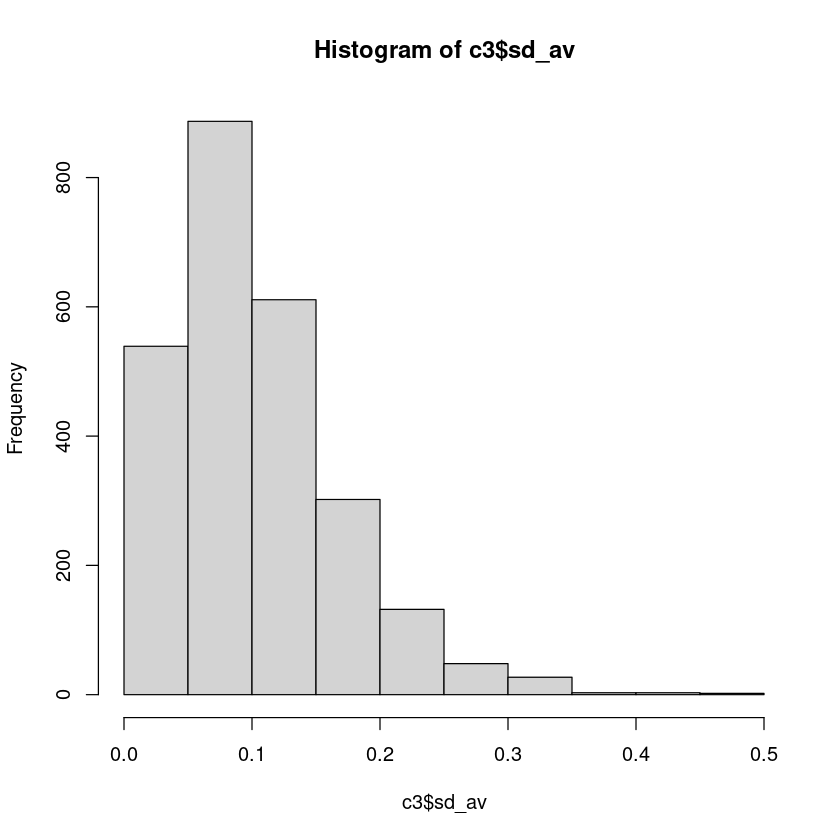

png 
  2

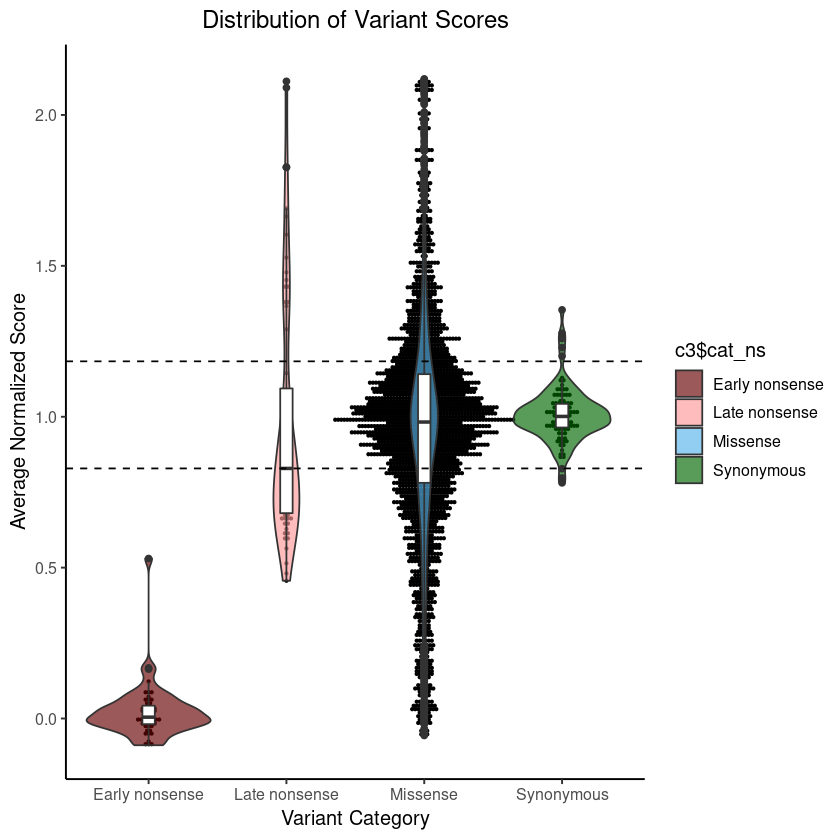

In [158]:
head(c3)
hist(c3$sd_av)

tapply(c3$trans_av, c3$cat_ns =="synonymous", mean)[2]
tapply(c3$trans_av, c3$cat_ns =="synonymous", sd)[2]

p <- ggplot(c3,aes(cat_ns,trans_av)) 

p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=c3$cat_ns),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.09) + scale_fill_manual(labels=c("Early nonsense", "Late nonsense", "Missense", "Synonymous"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600"))+
    geom_hline(yintercept = tapply(c3$trans_av, c3$cat_ns =="synonymous", mean)[2] + 
              1.96* tapply(c3$trans_av, c3$cat_ns =="synonymous", sd)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(c3$trans_av, c3$cat_ns =="synonymous", mean)[2] - 
              1.96* tapply(c3$trans_av, c3$cat_ns =="synonymous", sd)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Variant Scores") + 
    theme(plot.title = element_text(hjust = 0.5)) + scale_x_discrete(labels=c("Early nonsense", 
                                                                              "Late nonsense", "Missense", "Synonymous"))

pdfName = paste("allreps-norm-postQC-dist-",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)
p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=c3$cat_ns),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.09) + scale_fill_manual(labels=c("Early nonsense", "Late nonsense", "Missense", "Synonymous"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600"))+
    geom_hline(yintercept = tapply(c3$trans_av, c3$cat_ns =="synonymous", mean)[2] + 
              1.96* tapply(c3$trans_av, c3$cat_ns =="synonymous", sd)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(c3$trans_av, c3$cat_ns =="synonymous", mean)[2] - 
              1.96* tapply(c3$trans_av, c3$cat_ns =="synonymous", sd)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Variant Scores") + 
    theme(plot.title = element_text(hjust = 0.5)) + scale_x_discrete(labels=c("Early nonsense", 
                                                                              "Late nonsense", "Missense", "Synonymous"))

dev.off()
rm(pdfName)

In [159]:
c3$count = rowSums(!is.na(c3[,c(5:7)]))

c3$sem = c3$sd_av/(c3$count^0.5)

#length(!is.na(c3[,c(5:7)]))

head(c3)

mean(c3$trans_av)
sd(c3$trans_av)/(nrow(c3)^0.5)
nrow(c3)

length(which(c3$cat_ns=="missense"))

print("library represented")
length(which(c3$cat_ns=="missense"))/(129*19)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,8,A,synonymous,0.7026387,0.7585358,0.8813597,0.7808447,0.09142518,3,0.05278435
A,8,C,missense,1.3517548,1.6078440,1.4261573,1.4619187,0.13173678,3,0.07605826
A,8,D,missense,1.1400594,1.3107637,1.2515716,1.2341316,0.08667818,3,0.05004367
A,8,E,missense,1.1212026,1.0823699,1.2495267,1.1510330,0.08747993,3,0.05050656
A,8,F,missense,1.0833541,1.3530034,0.9568205,1.1310593,0.20235383,3,0.11682904
A,8,G,missense,0.9912767,1.1337220,1.2174048,1.1141345,0.11432951,3,0.06600817


[1] 0.9445279

[1] 0.007721801

[1] 2554

[1] 2339

[1] "library represented"


[1] 0.9543044

In [162]:
c3$variants = paste(c3$orig,c3$pos_corr,c3$new,sep="")
head(c3)

fileName = paste("scores-allreps-norm-",Sys.Date(),".txt",sep="")
fileName
fwrite(c3,fileName, quote = F, row.names = F, sep ="\t")

rm(fileName)


c2$variants = paste(c2$orig,c2$pos_corr,c2$new,sep="")
head(c2)

fileName = paste("totalCounts-allreps-norm-",Sys.Date(),".txt",sep="")
fileName
fwrite(c2,fileName, quote = F, row.names = F, sep ="\t")

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A,8,A,synonymous,0.7026387,0.7585358,0.8813597,0.7808447,0.09142518,3,0.05278435,A8A
A,8,C,missense,1.3517548,1.6078440,1.4261573,1.4619187,0.13173678,3,0.07605826,A8C
A,8,D,missense,1.1400594,1.3107637,1.2515716,1.2341316,0.08667818,3,0.05004367,A8D
A,8,E,missense,1.1212026,1.0823699,1.2495267,1.1510330,0.08747993,3,0.05050656,A8E
A,8,F,missense,1.0833541,1.3530034,0.9568205,1.1310593,0.20235383,3,0.11682904,A8F
A,8,G,missense,0.9912767,1.1337220,1.2174048,1.1141345,0.11432951,3,0.06600817,A8G


[1] "scores-allreps-norm-2023-04-26.txt"

orig,pos_corr,new,category,rep3,rep3_TC,rep2,rep2_TC,repA,repA_TC,av.score,sd,tot_freq,normrep3,normrep2,normrepA,cat_ns,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
A,8,A,synonymous,1.346890,759.2853,1.131119,667.2674,1.287515,757.9368,1.255175,0.11146173,2184.4895,0.4517946,0.3768130,0.4073538,synonymous,A8A
A,8,C,missense,2.080018,1019.2868,2.248757,1029.4162,2.048717,505.8716,2.125831,0.10760146,2554.5745,0.7005160,0.7584960,0.6738740,missense,A8C
A,8,D,missense,1.845080,520.2264,1.857818,458.2703,1.800467,452.1053,1.834455,0.03011526,1430.6019,0.6208108,0.6249868,0.5869541,missense,A8D
A,8,E,missense,1.842328,1045.6869,1.557265,1017.9101,1.778355,970.6813,1.725983,0.14957402,3034.2782,0.6198772,0.5223455,0.5792117,missense,A8E
A,8,F,missense,1.448437,312.0468,1.913402,305.6436,1.733971,283.1227,1.698603,0.23449169,900.8131,0.4862454,0.6439695,0.5636715,missense,A8F
A,8,G,missense,1.799102,4033.4437,1.624841,3032.1311,1.625994,3053.1616,1.683312,0.10027871,10118.7365,0.6052123,0.5454234,0.5258655,missense,A8G


[1] "totalCounts-allreps-norm-2023-04-26.txt"

In [67]:
head(c3)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A,8,A,synonymous,0.7010966,0.758258,0.8810047,0.7801198,0.09192488,3,0.05307285,A8A
A,8,C,missense,1.3535789,1.608543,1.4274323,1.4631849,0.13118838,3,0.07574165,A8C
A,8,D,missense,1.1407857,1.311121,1.2523242,1.2347437,0.08651794,3,0.04995115,A8D
A,8,E,missense,1.1218311,1.082465,1.2502732,1.1515230,0.08775609,3,0.05066600,A8E
A,8,F,missense,1.0837864,1.353410,0.9566913,1.1312957,0.20258134,3,0.11696039,A8F
A,8,G,missense,0.9912314,1.133876,1.2180552,1.1143875,0.11466083,3,0.06619946,A8G


# This stuff is computational stuff


skip to where it says heatmap code 

,POS,AvTraffic
,<int>,<dbl>
1,1,0.1521573
2,2,1.0133984
3,3,1.0497704
4,4,0.9499944
5,5,0.9077455
6,6,1.0743971


[1] 129

Joining, by = "POS"



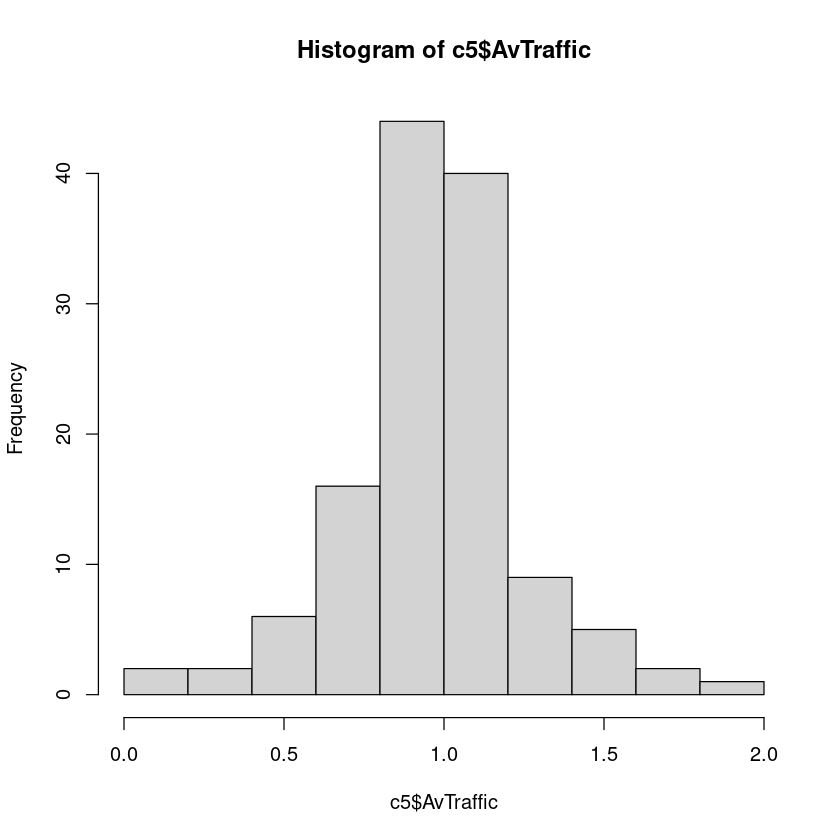

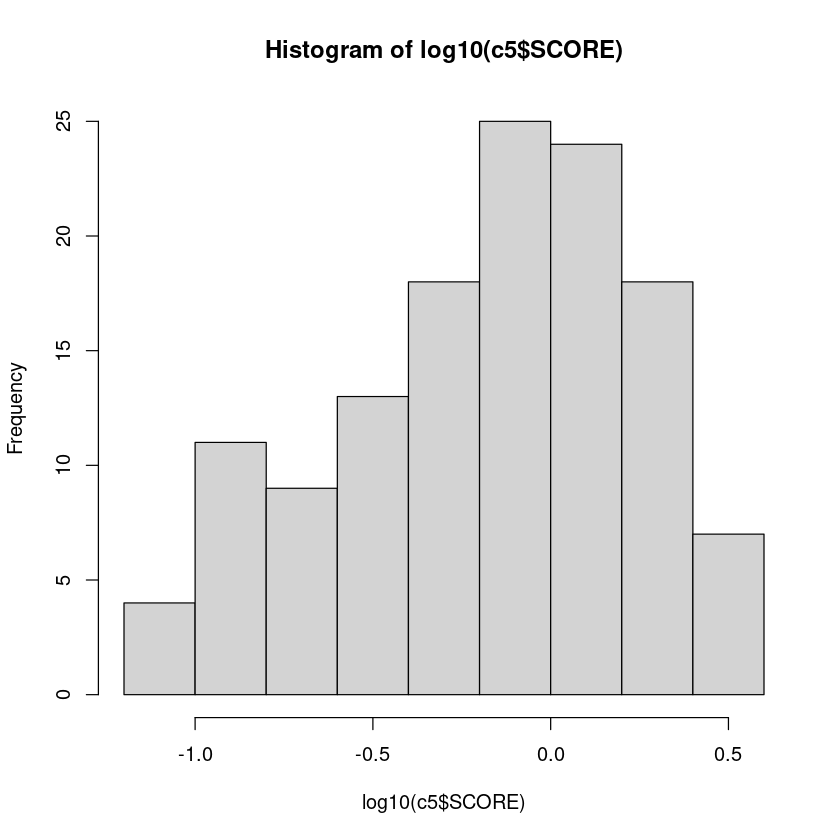

integer(0)


Call:
lm(formula = AvTraffic ~ SCORE, data = c5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81528 -0.09244  0.00912  0.11589  0.91556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.963733   0.038076  25.311   <2e-16 ***
SCORE       0.005062   0.030719   0.165    0.869    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2732 on 125 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0002172,	Adjusted R-squared:  -0.007781 
F-statistic: 0.02715 on 1 and 125 DF,  p-value: 0.8694


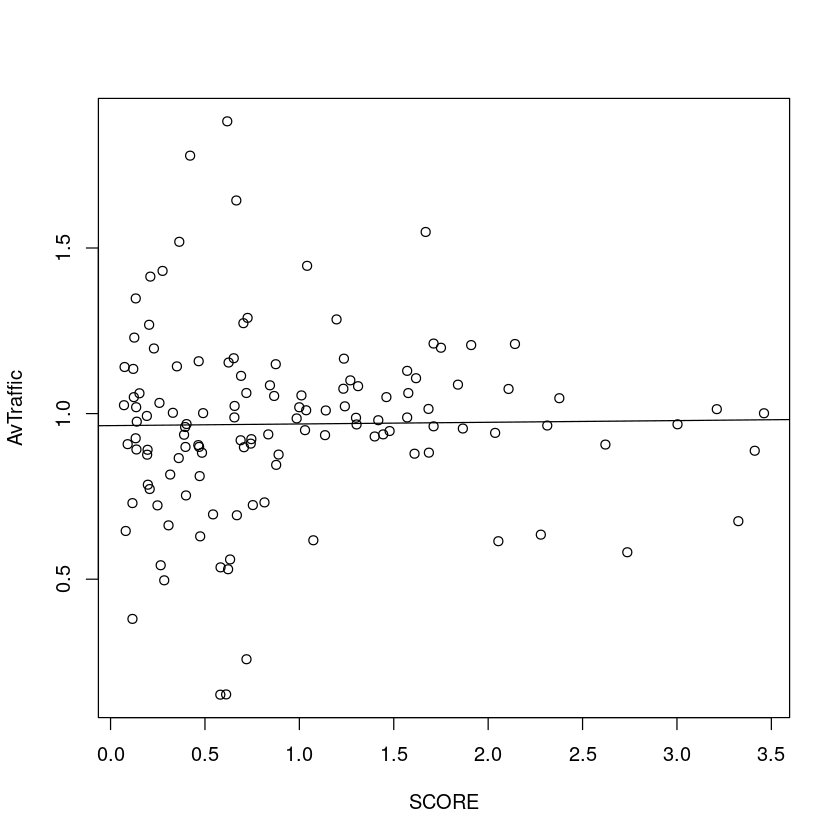

In [68]:
#### median scores by position:
ms <- c3[c3$cat_ns=="missense",]
c4 <- aggregate(trans_av~pos_corr,ms,median)
colnames(c4)=c("POS","AvTraffic")

head(c4)

consurf <- fread("KCNE1_ConSurf_scores.txt", header=T, stringsAsFactors = F)

nrow(consurf)
c5 <- full_join(c4,consurf)

hist(c5$AvTraffic)
hist(log10(c5$SCORE), breaks = 10)
plot(AvTraffic ~ SCORE, c5) + abline(lm(AvTraffic~SCORE, c5))

summary(lm(AvTraffic~SCORE, c5))

### Heatmap code

In [ ]:
### bash command to make sure you check for no HA tag mutants 
awk '{print $1, $2}' scores-allreps-norm-2022-07-06.txt | sort -k1,2 | uniq | sort -k2,2 -nr | less

In [4]:
scores <- fread("scores-allreps-norm-2022-07-06.txt", header= T, stringsAsFactors = F)
head(scores)


orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
A,8,A,synonymous,0.7010966,0.758258,0.8810047,0.7801198,0.09192488,3,0.05307285,A8A
A,8,C,missense,1.3535789,1.608543,1.4274323,1.4631849,0.13118838,3,0.07574165,A8C
A,8,D,missense,1.1407857,1.311121,1.2523242,1.2347437,0.08651794,3,0.04995115,A8D
A,8,E,missense,1.1218311,1.082465,1.2502732,1.1515230,0.08775609,3,0.05066600,A8E
A,8,F,missense,1.0837864,1.353410,0.9566913,1.1312957,0.20258134,3,0.11696039,A8F
A,8,G,missense,0.9912314,1.133876,1.2180552,1.1143875,0.11466083,3,0.06619946,A8G


pos_corr,n
<int>,<int>
1,19
2,19
3,19
4,19
5,19
6,19


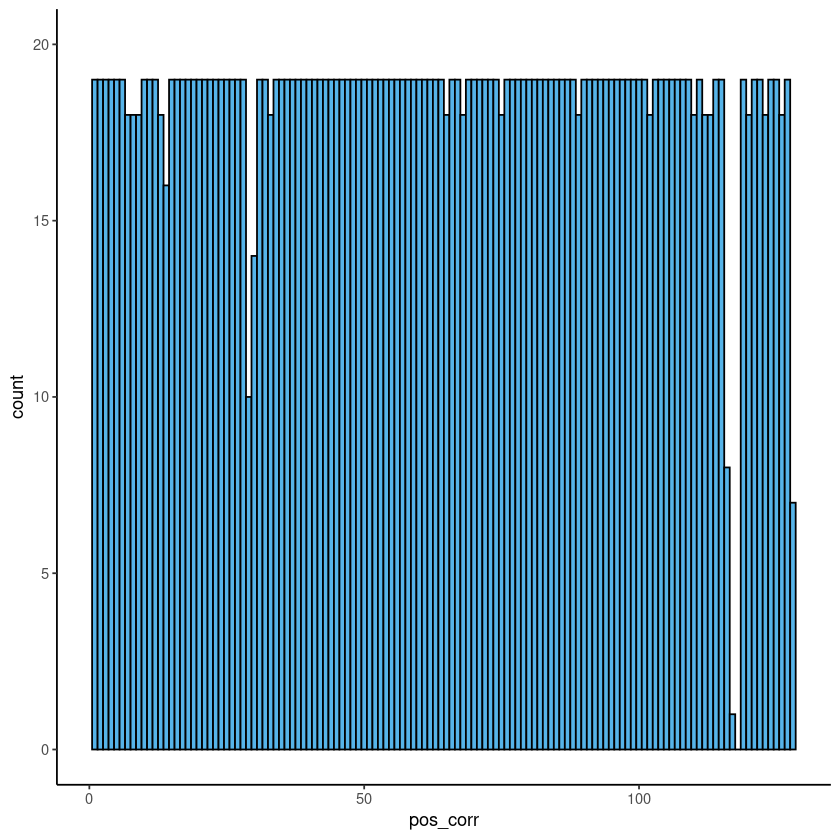

In [5]:
mis <- scores[scores$cat_ns =="missense",]

df <- mis %>% count(pos_corr)

head(df)

ggplot(mis, aes(pos_corr))+geom_histogram(binwidth=1,fill="#56B4E9",col="black")+theme_classic()+ylim(0,20)


In [71]:
pdf("missensecoverage.pdf",useDingbats = F)
ggplot(mis, aes(pos_corr))+geom_histogram(binwidth=1,fill="#56B4E9",col="black")+theme_classic()+ylim(0,20)
dev.off()

png 
  2

In order to make the heatmap, need to have a matrix of the following format

A | R | N | D | C | E | Q |
--|---|---|---|---|---|---|
2 | 13| 0 |1|0| 3| 0|
2| 11| 1| 2| 2| 2| 1|

where the columns are all the amino acids possible (including WT) and the rows are positions, and the actual numbers are the scores.
Q: should they be normalized for synonymous score at each position

In [6]:
head(scores)
nrow(scores)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
A,8,A,synonymous,0.7010966,0.758258,0.8810047,0.7801198,0.09192488,3,0.05307285,A8A
A,8,C,missense,1.3535789,1.608543,1.4274323,1.4631849,0.13118838,3,0.07574165,A8C
A,8,D,missense,1.1407857,1.311121,1.2523242,1.2347437,0.08651794,3,0.04995115,A8D
A,8,E,missense,1.1218311,1.082465,1.2502732,1.1515230,0.08775609,3,0.05066600,A8E
A,8,F,missense,1.0837864,1.353410,0.9566913,1.1312957,0.20258134,3,0.11696039,A8F
A,8,G,missense,0.9912314,1.133876,1.2180552,1.1143875,0.11466083,3,0.06619946,A8G


[1] 2554

In [18]:
# this plot generates the scores at each position 
histo <- data.frame("pos"=integer(), "uni"=integer())
for (i in c(1:128)){
    m <- scores[scores$pos_corr == i,]
    uni = length(unique(m$variants))
    histo[i,] <- c(i,uni)
}
head(histo)

,pos,uni
,<int>,<int>
1,1,20
2,2,21
3,3,21
4,4,21
5,5,21
6,6,21


In [26]:
pdfName = paste("coverage-postQC",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)
ggplot(scores, aes(pos_corr))+geom_histogram(binwidth=1,fill="#43C59E",col="black")+theme_classic()+ylim(0,22)
dev.off()

png 
  2

In [7]:
heatmap_matrix = matrix(ncol=21,nrow=128)
 colnames(heatmap_matrix)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")

head(heatmap_matrix)

for (i in c(1:128)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
      scoreAA <- unlist(scores[scores$pos_corr==i & scores$new==a, 8])
      if(length(scoreAA)==0)
          {
          scoreAA = NA
      }
      #print(paste(i,a,scoreAA,sep=" "))
      #print(heatmap_matrix[i,x1])
      heatmap_matrix[i,x1] <- as.numeric(scoreAA)
      
    }
  }



G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [75]:
summary(scores)

     orig              pos_corr          new               cat_ns         
 Length:2554        Min.   :  1.00   Length:2554        Length:2554       
 Class :character   1st Qu.: 32.00   Class :character   Class :character  
 Mode  :character   Median : 63.00   Mode  :character   Mode  :character  
                    Mean   : 63.41                                        
                    3rd Qu.: 94.00                                        
                    Max.   :128.00                                        
   trans_repA        trans_rep2         trans_rep3          trans_av       
 Min.   :-0.1885   Min.   :-0.08118   Min.   :-0.08894   Min.   :-0.09193  
 1st Qu.: 0.7459   1st Qu.: 0.73231   1st Qu.: 0.78188   1st Qu.: 0.76604  
 Median : 0.9534   Median : 0.96759   Median : 0.99475   Median : 0.97380  
 Mean   : 0.9286   Mean   : 0.94642   Mean   : 0.95802   Mean   : 0.94434  
 3rd Qu.: 1.1210   3rd Qu.: 1.15531   3rd Qu.: 1.17181   3rd Qu.: 1.13016  
 Max.   : 2.1520   

In [76]:
head(heatmap_matrix)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
0.1391800,0.1521573,0.1637068,0.1574191,NA,0.1295558,0.09804566,0.1481219,0.1871503,0.1674628,...,0.1570314,0.1473334,0.1903683,0.2365141,0.07019196,0.1866483,0.1508998,0.2002144,0.1497147,0.16134361
1.0580496,1.0712553,1.1622286,1.0590878,1.0133984,0.9737277,0.94323920,0.9953135,0.9588309,1.0018509,...,1.7182783,1.0579710,1.0473167,1.0186150,0.89462813,0.9329377,0.9082453,1.0380861,0.9562082,-0.01134042
1.1075854,1.0525432,0.9976890,0.9790734,0.8750158,0.9720395,1.17873864,1.2848325,1.3271885,1.0497704,...,1.4845787,1.0659049,0.9480822,1.1308650,0.98182096,1.0374238,1.0676594,1.0005728,0.8681669,0.05590541
1.0612921,0.9815420,0.8000049,0.8906447,0.8890489,0.8646000,0.88633372,0.9434895,0.9563071,0.9231501,...,1.2627806,1.0263482,1.1137899,0.9903717,0.91484833,0.9200942,0.9674076,0.9499944,0.8497478,0.08829205
0.8860993,0.7130798,0.8593433,0.9295199,0.9390846,0.8124722,0.88537878,0.9878391,0.7788718,0.9077455,...,1.0067141,0.8158552,1.0471792,1.0079619,1.21187227,1.0413257,1.0338328,0.9027641,0.8293805,0.08594173
1.1358161,1.0177904,1.0088418,1.0467306,1.0069933,0.8601324,0.96664989,1.0743971,1.0010533,1.1150996,...,1.3756386,1.0944084,1.1524741,0.9713705,1.16434781,1.1129179,1.1057033,1.2223268,1.0738461,0.06330475


In [77]:
labs=matrix(nrow=128,,ncol=21)
colnames(labs)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")


KCNE1 = "MILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESDAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP"

KCNE1 = unlist(strsplit(KCNE1,""))

for (i in 1:(length(KCNE1)-1)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
        if (KCNE1[i] == a){
             labs[i,x1] = "."    
        }
   }
}

head(labs)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
NA,NA,NA,NA,.,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,.,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,.,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,.,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,.,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


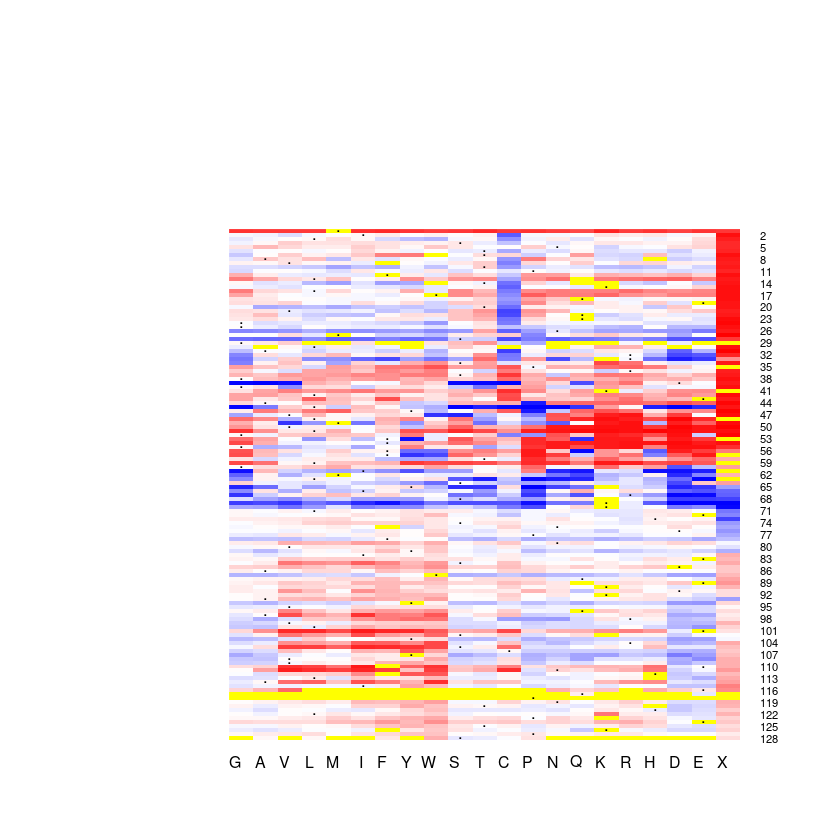

In [89]:
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.1,0.1),
          trace="none", dendrogram = c("none"),
        srtCol=0, na.color = "YELLOW", col = my_palette, symkey=F, symm=F, symbreaks=F,          
          cellnote=labs, notecol="black", density.info="none", key=F)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
0.1391800,0.1521573,0.1637068,0.1574191,NA,0.1295558,0.09804566,0.1481219,0.1871503,0.1674628,...,0.1570314,0.1473334,0.1903683,0.2365141,0.07019196,0.1866483,0.1508998,0.2002144,0.1497147,0.16134361
1.0580496,1.0712553,1.1622286,1.0590878,1.0133984,0.9737277,0.94323920,0.9953135,0.9588309,1.0018509,...,1.7182783,1.0579710,1.0473167,1.0186150,0.89462813,0.9329377,0.9082453,1.0380861,0.9562082,-0.01134042
1.1075854,1.0525432,0.9976890,0.9790734,0.8750158,0.9720395,1.17873864,1.2848325,1.3271885,1.0497704,...,1.4845787,1.0659049,0.9480822,1.1308650,0.98182096,1.0374238,1.0676594,1.0005728,0.8681669,0.05590541
1.0612921,0.9815420,0.8000049,0.8906447,0.8890489,0.8646000,0.88633372,0.9434895,0.9563071,0.9231501,...,1.2627806,1.0263482,1.1137899,0.9903717,0.91484833,0.9200942,0.9674076,0.9499944,0.8497478,0.08829205
0.8860993,0.7130798,0.8593433,0.9295199,0.9390846,0.8124722,0.88537878,0.9878391,0.7788718,0.9077455,...,1.0067141,0.8158552,1.0471792,1.0079619,1.21187227,1.0413257,1.0338328,0.9027641,0.8293805,0.08594173
1.1358161,1.0177904,1.0088418,1.0467306,1.0069933,0.8601324,0.96664989,1.0743971,1.0010533,1.1150996,...,1.3756386,1.0944084,1.1524741,0.9713705,1.16434781,1.1129179,1.1057033,1.2223268,1.0738461,0.06330475


[1] "trafficking-heatmap-2022-07-06.pdf"

png 
  2

[1] "trafficking-heatmap-2022-07-06.pdf"

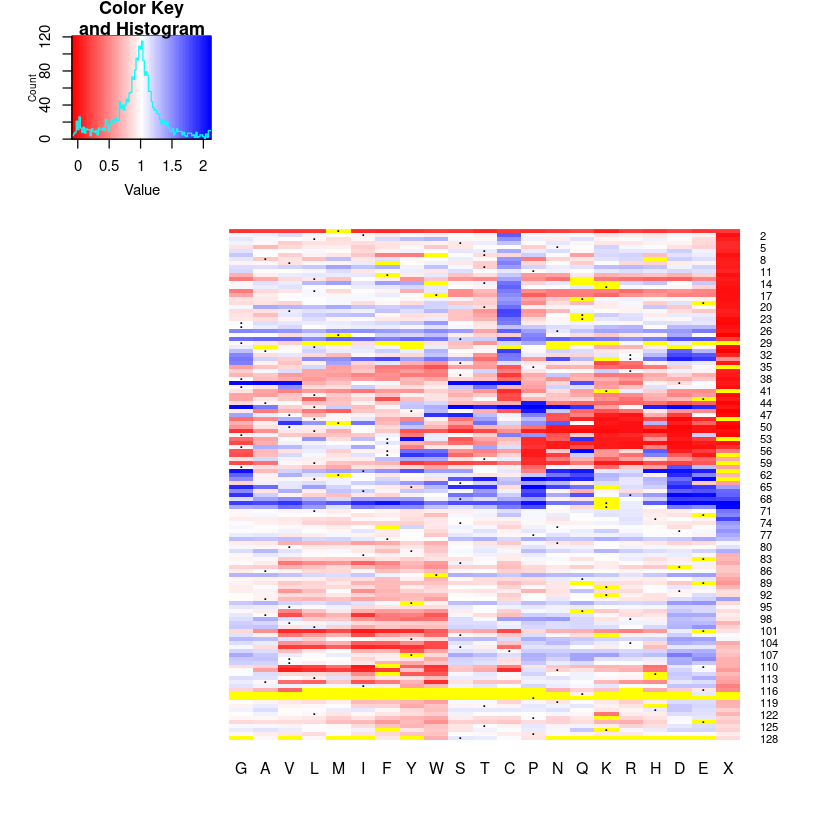

In [79]:
head(heatmap_matrix)
my_palette <- colorRampPalette(c("red","white","blue"))(n=100)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette, symkey=F, symm=F, symbreaks=F,          
          cellnote=labs, notecol="black")

pdfName = paste("trafficking-heatmap-",Sys.Date(),".pdf",sep="")
pdfName

pdf(pdfName, useDingbats = F)
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "yellow", col = my_palette, symkey=F, symm=F, symbreaks=F,          
          cellnote=labs, notecol="black")
dev.off()

pdfName

In [387]:
head(scores)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W


## This stuff is determining Gain of Function vs loss of function 

From Matreyek Vamp Seq paper:

look at the distribution of synonymous variants
What is the cutoff that separates 5% of the lowest score variants from the rest? 
    For my purposes, dividiing this up to two thresholds of 2.5% each for LoF and GoF 

Calculate Confidence intervals for each score
if confidence interval upperbound crosses the threshold but the rest don't, probably LoF (and lower bound crosses higher threshold for GoF in our case)
if CI does not overlap with threshold, then definitive LoF or GoF for us. 

### stats on the synonymous distribution

     orig              pos_corr          new               cat_ns         
 Length:91          Min.   :  2.00   Length:91          Length:91         
 Class :character   1st Qu.: 38.50   Class :character   Class :character  
 Mode  :character   Median : 65.00   Mode  :character   Mode  :character  
                    Mean   : 67.37                                        
                    3rd Qu.: 99.50                                        
                    Max.   :128.00                                        
   trans_repA       trans_rep2        trans_rep3        trans_av     
 Min.   :0.4131   Min.   :0.06875   Min.   :0.3567   Min.   :0.4396  
 1st Qu.:0.9136   1st Qu.:0.95473   1st Qu.:0.9600   1st Qu.:0.9617  
 Median :1.0000   Median :1.00000   Median :1.0000   Median :0.9888  
 Mean   :0.9642   Mean   :0.99182   Mean   :1.0239   Mean   :0.9933  
 3rd Qu.:1.0435   3rd Qu.:1.06336   3rd Qu.:1.0799   3rd Qu.:1.0357  
 Max.   :1.4162   Max.   :1.49180   Max.   :1.4699   Ma

[1] "Standard Error for the synonymous distribution"


[1] 0.01194486

[1] "Standard deviation for the synonymous distribution"


[1] 0.1139467

[1] "Number of synonymous variants"


[1] 91

[1] "Sqrt of # of synonymous variants"


[1] 9.539392

[1] "Mean of synonymous distribution"
[1] 0.9932768
[1] "Confidence interval"


[1] 1.016689

[1] 0.9698649


	Shapiro-Wilk normality test

data:  x$trans_av
W = 0.84801, p-value = 3.161e-08


[1] 34 48

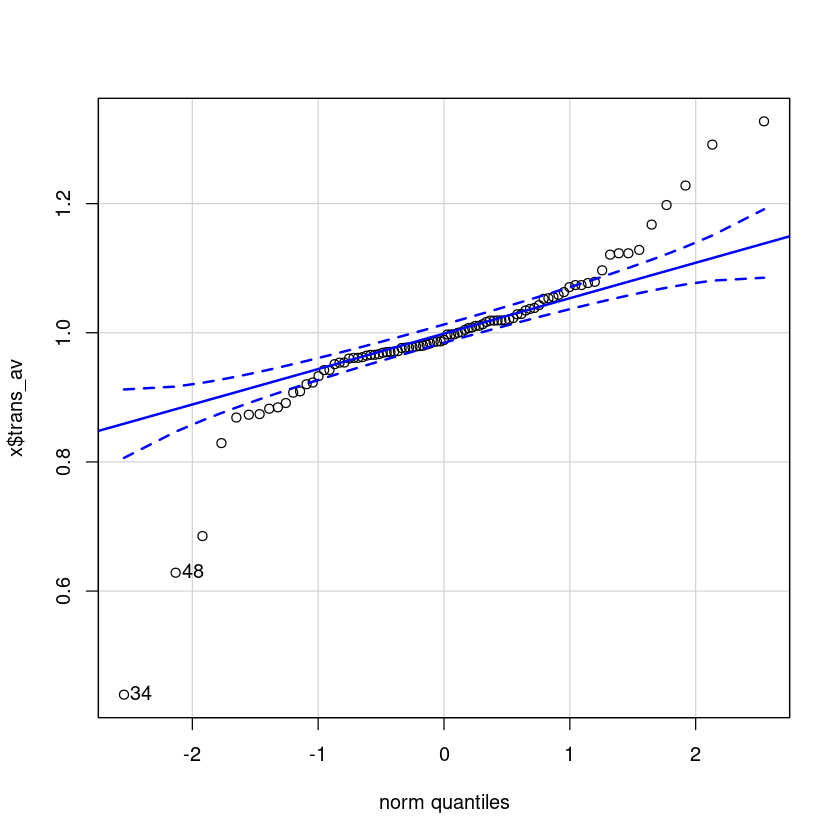

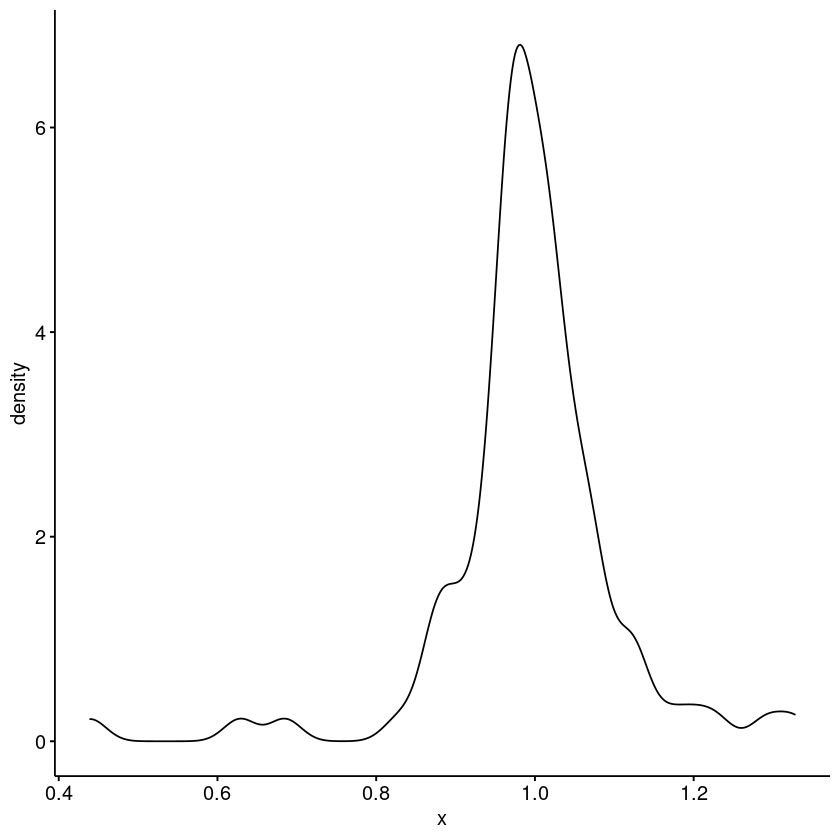

In [6]:
summary(scores[scores$cat_ns=="synonymous",])

x <- scores[scores$cat_ns=="synonymous",8]

print("Standard Error for the synonymous distribution")
(sd(x$trans_av))/((nrow(x))^0.5)

print("Standard deviation for the synonymous distribution")
sd(x$trans_av)

print("Number of synonymous variants")
nrow(x)

print("Sqrt of # of synonymous variants")
nrow(x)^0.5

print("Mean of synonymous distribution")
m = mean(x$trans_av)
print(m)

print("Confidence interval")
m + 1.96*(sd(x$trans_av))/((nrow(x))^0.5)
m - 1.96*(sd(x$trans_av))/((nrow(x))^0.5)

shapiro.test(x$trans_av) 
car::qqPlot(x$trans_av)

ggdensity(x$trans_av)

In [21]:
## outliers 

iqr = IQR(x$trans_av)

(3*iqr)-m

x1 <- x[x$trans_av<(m+(3*iqr)) & x$trans_av>(m-(3*iqr)),]

head(x1)
nrow(x1)

shapiro.test(x1$trans_av)

[1] -0.7074856

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
A,31,A,synonymous,1.0911827,0.9943809,0.9542887,1.0132841,0.07037747,3,0.04063245,A31A
A,44,A,synonymous,0.9425993,1.0505137,0.9431200,0.9787443,0.06215464,3,0.03588500,A44A
A,86,A,synonymous,0.9783486,1.0218652,0.9919455,0.9973864,0.02226268,3,0.01285337,A86A
A,93,A,synonymous,0.9124303,1.0000000,0.9742561,0.9622288,0.04500672,3,0.02598464,A93A
A,97,A,synonymous,1.0021701,1.0635372,0.9847207,1.0168094,0.04139733,3,0.02390076,A97A
A,114,A,synonymous,1.0250846,1.0119356,0.9767010,1.0045737,0.02501783,3,0.01444405,A114A


[1] 91


	Shapiro-Wilk normality test

data:  x1$trans_av
W = 0.84801, p-value = 3.161e-08


Removing the outliers from the synonymous distribution --> because the synonymous distribution ends up being normal only after outliers are removed 

In [23]:
x <- scores[scores$cat_ns=="synonymous",]

iqr = IQR(x$trans_av)

(3*iqr)-m

# if don't want to use outliers, then change here 
#x1 <- x[x$trans_av<(m+(3*iqr)) & x$trans_av>(m-(3*iqr)),]
x1 <- x 

head(x1)
nrow(x1)


[1] -0.7074856

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,31,A,synonymous,1.0911827,0.9943809,0.9542887,1.0132841,0.07037747,3,0.04063245,A31A,0.9336445,1.092924
A,44,A,synonymous,0.9425993,1.0505137,0.9431200,0.9787443,0.06215464,3,0.03588500,A44A,0.9084097,1.049079
A,86,A,synonymous,0.9783486,1.0218652,0.9919455,0.9973864,0.02226268,3,0.01285337,A86A,0.9721938,1.022579
A,93,A,synonymous,0.9124303,1.0000000,0.9742561,0.9622288,0.04500672,3,0.02598464,A93A,0.9112989,1.013159
A,97,A,synonymous,1.0021701,1.0635372,0.9847207,1.0168094,0.04139733,3,0.02390076,A97A,0.9699639,1.063655
A,114,A,synonymous,1.0250846,1.0119356,0.9767010,1.0045737,0.02501783,3,0.01444405,A114A,0.9762634,1.032884


[1] 91

Calculating the percentiles, 2.5%ile and 97.5%ile for threshold of LoF and GoF respectively.

In [44]:
quantile(x1$trans_av,c(0.025,0.975))

lower_thresh = as.numeric(quantile(x1$trans_av,c(0.025)))
upper_thresh = as.numeric(quantile(x1$trans_av,c(0.975)))

quantile(x1$trans_av,c(0.05,0.95))
quantile(x1$trans_av,c(0.01,0.99))

2.5%     97.5% 
0.7211788 1.2204638

5%       95% 
0.8709159 1.1479364

1%       99% 
0.6095582 1.2950062

In [42]:
# calculating confidence intervals
scores$CI_lower = scores$trans_av - 1.96*scores$sem 

scores$CI_upper = scores$trans_av + 1.96*scores$sem 

head(scores)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779


orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779


[1] 1886


	Shapiro-Wilk normality test

data:  missense$trans_av
W = 0.9619, p-value < 2.2e-16


[1] "outliers 3SD away from the IQR in the missense distribution"


[1] 21

[1] "non-outlier filtered scores"
[1] "definitive loss of function"


[1] 277

[1] "probably loss of function"


[1] 153

[1] "definitive gain of function"


[1] 183

[1] "probable gain of function"


[1] 100

[1] "outlier filtered scores"


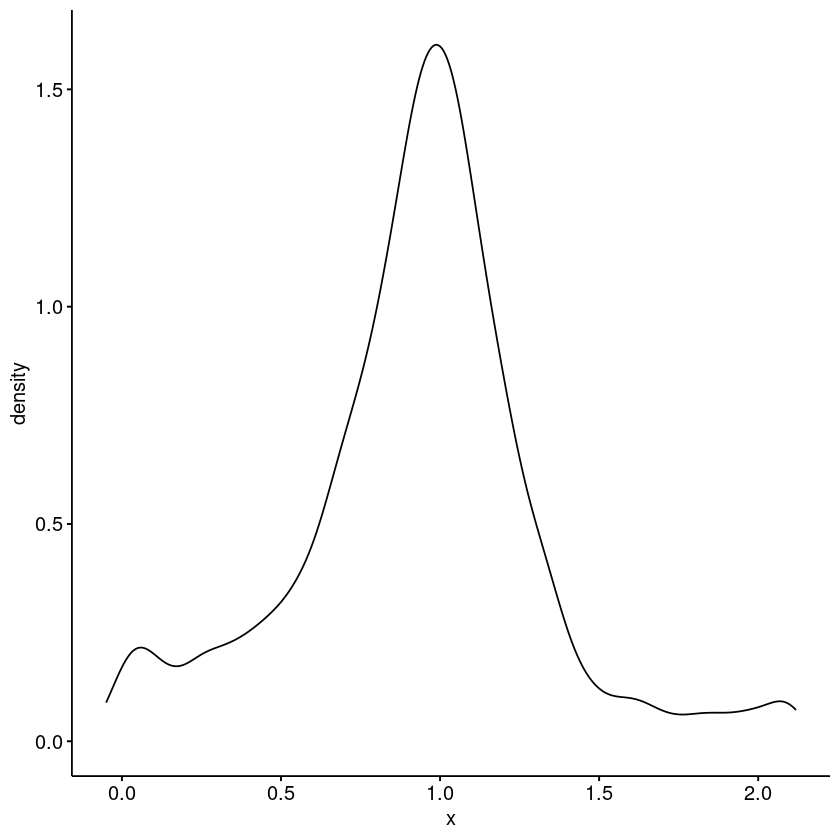


	Shapiro-Wilk normality test

data:  ms1$trans_av
W = 0.96716, p-value < 2.2e-16


[1] "definitive loss of function"


[1] 277

[1] "probably loss of function"


[1] 153

[1] "definitive gain of function"


[1] 162

[1] "probable gain of function"


[1] 100

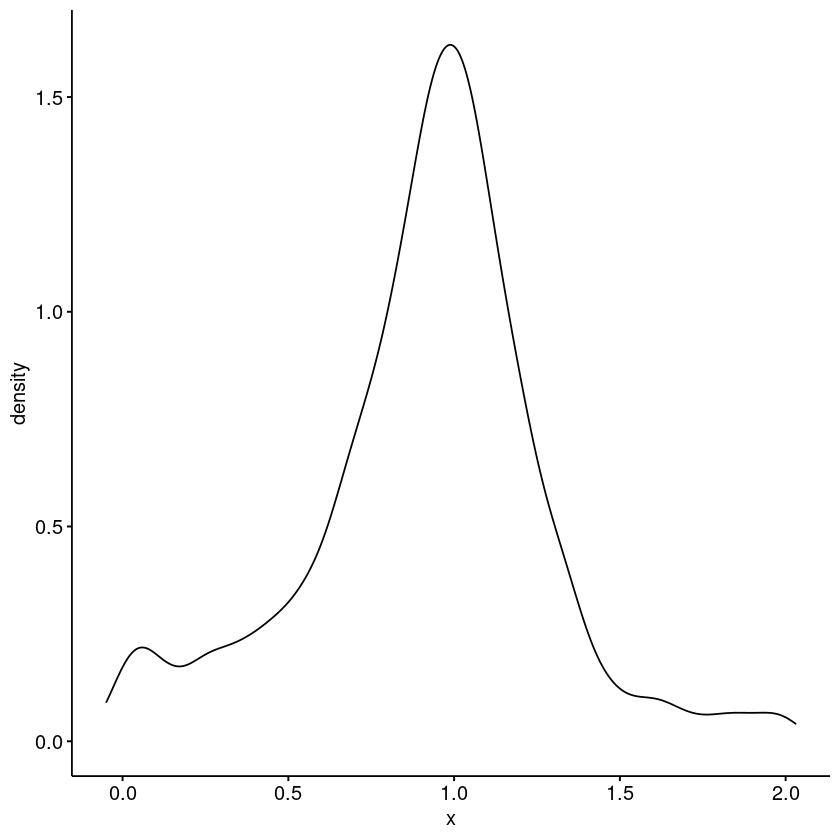

In [45]:
# counting number of definitive gain/loss of function variants
# from distribution of missense variants 
# i.e. trans_av, CI_lower and CI_upper are below lower_thresh 

missense <- scores[scores$cat_ns=="missense",]
head(missense)
nrow(missense)

ggdensity(missense$trans_av)
shapiro.test(missense$trans_av)

print("outliers 3SD away from the IQR in the missense distribution")
iqr = IQR(missense$trans_av)
m = mean(missense$trans_av)
ms1 <- missense[missense$trans_av<(m+(3*iqr)) & missense$trans_av>(m-(3*iqr)),]

nrow(missense) - nrow(ms1)

print("non-outlier filtered scores")
print("definitive loss of function")
length(which(missense$trans_av < lower_thresh & 
            missense$CI_lower < lower_thresh &
            missense$CI_upper < lower_thresh
            ))

print("probably loss of function")
length(which(missense$trans_av < lower_thresh & 
            missense$CI_lower < lower_thresh &
            missense$CI_upper > lower_thresh
            ))

print("definitive gain of function")
length(which(missense$trans_av > upper_thresh & 
            missense$CI_lower > upper_thresh &
            missense$CI_upper > upper_thresh
            ))

print("probable gain of function")
length(which(missense$trans_av > upper_thresh & 
            missense$CI_lower < upper_thresh &
            missense$CI_upper > upper_thresh
            ))


print("outlier filtered scores")

ggdensity(ms1$trans_av)
shapiro.test(ms1$trans_av)
print("definitive loss of function")
length(which(ms1$trans_av < lower_thresh & 
            ms1$CI_lower < lower_thresh &
            ms1$CI_upper < lower_thresh
            ))

print("probably loss of function")
length(which(ms1$trans_av < lower_thresh & 
            ms1$CI_lower < lower_thresh &
            ms1$CI_upper > lower_thresh
            ))

print("definitive gain of function")
length(which(ms1$trans_av > upper_thresh & 
            ms1$CI_lower > upper_thresh &
            ms1$CI_upper > upper_thresh
            ))

print("probable gain of function")
length(which(ms1$trans_av > upper_thresh & 
            ms1$CI_lower < upper_thresh &
            ms1$CI_upper > upper_thresh
            ))


Warning message:
“Removed 12 rows containing non-finite values (stat_density).”


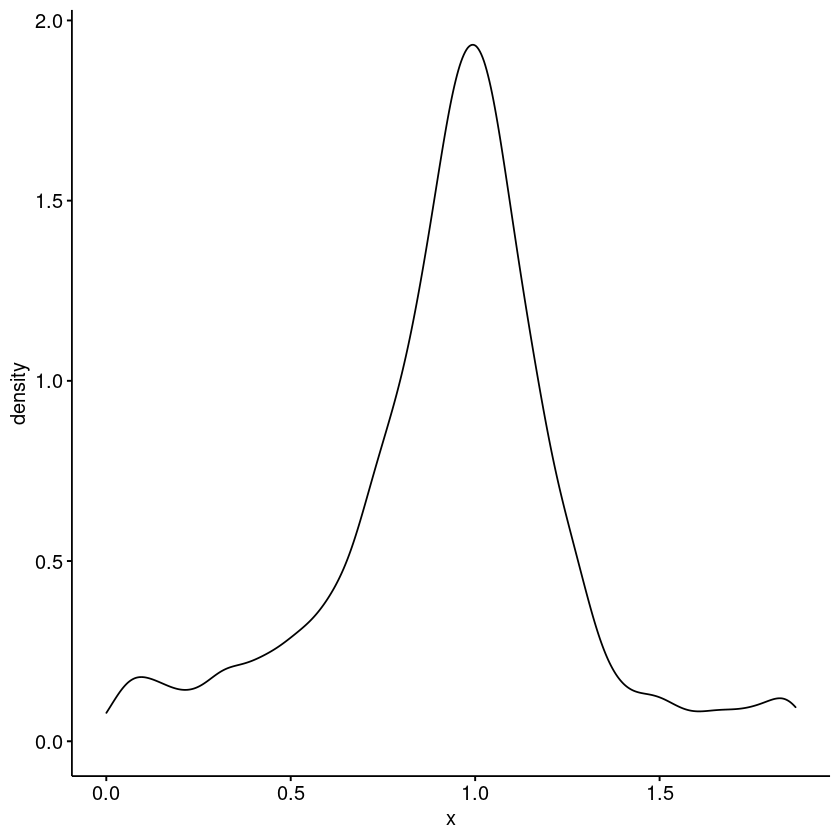

In [38]:
ggdensity((missense$trans_av)**(1/1.2))

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779


[1] "Number of missense variants"


[1] 1886


	Shapiro-Wilk normality test

data:  missense$trans_av
W = 0.9619, p-value < 2.2e-16


[1] "Standard Error for the missense distribution"


[1] 0.008597118

[1] "Standard deviation for the missense distribution"


[1] 0.3733565

[1] "Sqrt of # of missense variants"


[1] 43.4281

[1] "Mean of missense distribution"
[1] "Confidence interval"


[1] 0.9463525

[1] 0.9126518

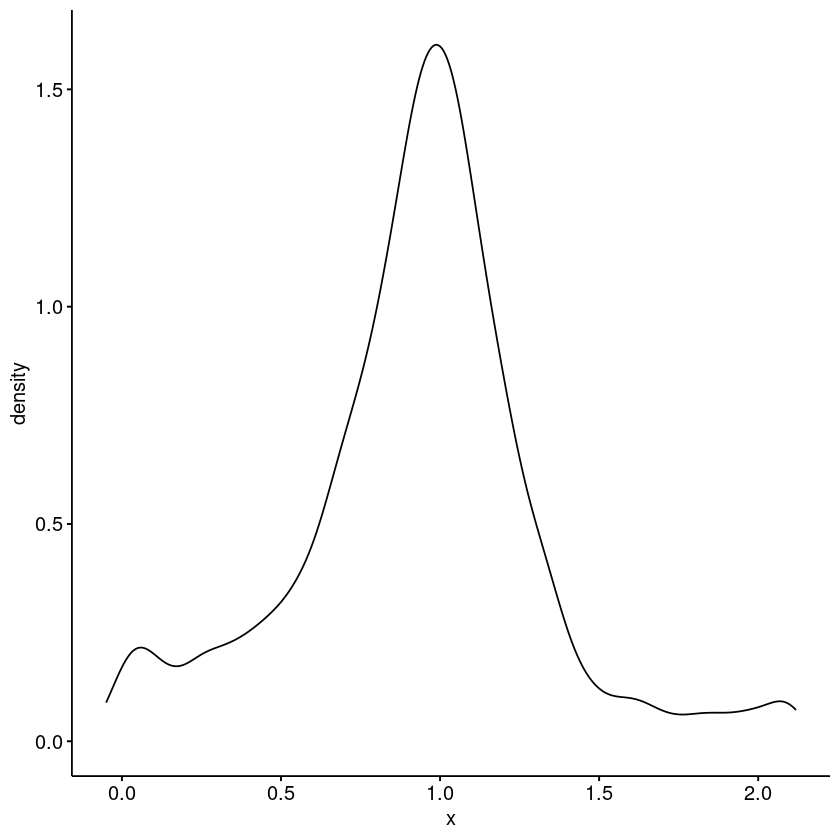

In [14]:
head(missense)

print("Number of missense variants")
nrow(missense)

shapiro.test(missense$trans_av)

ggdensity(missense$trans_av)

print("Standard Error for the missense distribution")
(sd(missense$trans_av))/((nrow(missense))^0.5)

print("Standard deviation for the missense distribution")
sd(missense$trans_av)

print("Sqrt of # of missense variants")
nrow(missense)^0.5

print("Mean of missense distribution")
m = mean(missense$trans_av)

print("Confidence interval")
m + 1.96*(sd(missense$trans_av))/((nrow(missense))^0.5)
m - 1.96*(sd(missense$trans_av))/((nrow(missense))^0.5)

In [15]:
# counting number of definitive gain/loss of function variants
# from distribution of nonsense variants 
# i.e. trans_av, CI_lower and CI_upper are below lower_thresh 

nonsense <- scores[scores$cat_ns=="lateNS",]

head(nonsense)
nrow(nonsense)

print("definitive loss of function")
length(which(nonsense$trans_av < lower_thresh & 
            nonsense$CI_lower < lower_thresh &
            nonsense$CI_upper < lower_thresh
            ))

print("probably loss of function")
length(which(nonsense$trans_av < lower_thresh & 
            nonsense$CI_lower < lower_thresh &
            nonsense$CI_upper > lower_thresh
            ))

print("definitive gain of function")
length(which(nonsense$trans_av > upper_thresh & 
            nonsense$CI_lower > upper_thresh &
            nonsense$CI_upper > upper_thresh
            ))

print("probable gain of function")
length(which(nonsense$trans_av > upper_thresh & 
            nonsense$CI_lower < upper_thresh &
            nonsense$CI_upper > upper_thresh
            ))


orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,86,X,lateNS,0.8274607,0.6528668,0.8684192,0.7829156,0.11447229,3,0.066090609,A86X,0.6533780,0.9124532
A,93,X,lateNS,1.4051917,1.5855087,1.3064965,1.4323989,0.14148191,3,0.081684616,A93X,1.2722971,1.5925008
A,97,X,lateNS,1.0864887,0.6329191,1.1110702,0.9434927,0.26924529,3,0.155448838,A97X,0.6388130,1.2481724
A,114,X,lateNS,0.5787138,0.5688669,0.5978242,0.5818016,0.01472357,3,0.008500658,A114X,0.5651403,0.5984629
C,106,X,lateNS,0.8702210,0.5857056,0.7636542,0.7398603,0.14374236,3,0.082989689,C106X,0.5772005,0.9025201
D,76,X,lateNS,1.4770246,1.5598997,1.3889692,1.4752978,0.08547835,3,0.049350951,D76X,1.3785700,1.5720257


[1] 60

[1] "definitive loss of function"


[1] 22

[1] "probably loss of function"


[1] 18

[1] "definitive gain of function"


[1] 11

[1] "probable gain of function"


[1] 1

In [18]:
head(scores)


fwrite(scores,"allreps-norm-postQC-dist-2022-01-13_withCI.txt", col.names = T, row.names = F, sep="\t",quote=F)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779


### manual patch clamp results from Tao Yang:
Given 12-2-2021

In [47]:
manual <- data.frame("variants"=c("WT","I61X","G25V","G60D","D76N","G55X","F57Y","R98W","D85N","F53X",
                                "L3P","E19D","D39G","E101V","T125M","P127T"),
                    "I-20"=c(15.89,0,34.78,28.49,0.18,0.18,2.54,4.73,32.3,10.03,
                            4.8,6.69,43.9,9.08,2.99,4.8),
                    "I0"=c(48.56,0.03,87.4,71.5,3.19,0.19,14.86,15.26,117.22,41.94,
                          30.3,25.07,112.5,22.39,9.36,13.1),
                    "I20"=c(92.1,0.01,156.1,114.9,10.1,0.20,48.78,31.72,215.59,91.23,
                           79.9,52.15,185.1,33.38,20.43,22.7),
                    "cell"=c(rep("HEK",8),rep("CHO",3),rep("HEK",4),"CHO"))


norm <- fread("scores-allreps-norm-2022-01-12.txt", header=T, stringsAsFactors = F)
norm$variants = paste(norm$orig,norm$pos_corr,norm$new,sep="")
head(norm)
nrow(manual)
head(manual)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
A,8,C,missense,1.2533113,1.5776168,1.3731880,1.4013720,0.1639795,3,0.09467362,A8C
A,8,E,missense,1.0261036,0.5586917,1.5538814,1.0462256,0.4978999,3,0.28746262,A8E
A,8,G,missense,0.7917438,1.1182568,1.1567464,1.0222490,0.2005489,3,0.11578695,A8G
A,8,P,missense,0.5538700,0.3682527,0.8553386,0.5924871,0.2458285,3,0.14192913,A8P
A,8,S,missense,0.8145497,0.8876315,1.0396323,0.9139378,0.1148241,3,0.06629371,A8S
A,8,T,missense,0.6816558,1.0379280,0.9371332,0.8855723,0.1836474,3,0.10602888,A8T


[1] 16

,variants,I.20,I0,I20,cell
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,WT,15.89,48.56,92.10,HEK
2,I61X,0.00,0.03,0.01,HEK
3,G25V,34.78,87.40,156.10,HEK
4,G60D,28.49,71.50,114.90,HEK
5,D76N,0.18,3.19,10.10,HEK
6,G55X,0.18,0.19,0.20,HEK


In [49]:
comp = inner_join(manual,norm)
comp

nrow(comp)
gate = c("T125M","P127T","D76N","D85N")

comp$gating = ifelse(comp$variants %in% gate, 1,0)

Joining, by = "variants"



variants,I.20,I0,I20,cell,orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
I61X,0.00,0.03,0.01,HEK,I,61,X,lateNS,0.70971048,0.76696573,0.63073013,0.70246878,0.06840590,3,0.03949416
G25V,34.78,87.40,156.10,HEK,G,25,V,missense,1.25236496,1.14635570,0.86820010,1.08897358,0.19840663,3,0.11455012
G60D,28.49,71.50,114.90,HEK,G,60,D,missense,1.66160922,1.90128935,1.60130043,1.72139967,0.15868053,3,0.09161425
D76N,0.18,3.19,10.10,HEK,D,76,N,missense,1.11375585,1.09526713,1.06007939,1.08970079,0.02726773,3,0.01574303
G55X,0.18,0.19,0.20,HEK,G,55,X,earlyNS,0.13740963,0.07834311,0.13383711,0.11652995,0.03311898,3,0.01912125
F57Y,2.54,14.86,48.78,HEK,F,57,Y,missense,1.78463147,2.03326094,1.89715234,1.90501492,0.12450108,3,0.07188073
R98W,4.73,15.26,31.72,HEK,R,98,W,missense,0.64590400,0.25446540,0.32005459,0.40680800,0.20964412,3,0.12103809
D85N,32.30,117.22,215.59,CHO,D,85,N,missense,0.86746267,0.89036838,1.04119085,0.93300730,0.09438712,3,0.05449443
F53X,10.03,41.94,91.23,CHO,F,53,X,earlyNS,0.06872099,0.05868920,0.69857629,0.27532883,0.36657737,3,0.21164355


[1] 14

In [50]:
comp

variants,I.20,I0,I20,cell,orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,gating
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
I61X,0.00,0.03,0.01,HEK,I,61,X,lateNS,0.70971048,0.76696573,0.63073013,0.70246878,0.06840590,3,0.03949416,0
G25V,34.78,87.40,156.10,HEK,G,25,V,missense,1.25236496,1.14635570,0.86820010,1.08897358,0.19840663,3,0.11455012,0
G60D,28.49,71.50,114.90,HEK,G,60,D,missense,1.66160922,1.90128935,1.60130043,1.72139967,0.15868053,3,0.09161425,0
D76N,0.18,3.19,10.10,HEK,D,76,N,missense,1.11375585,1.09526713,1.06007939,1.08970079,0.02726773,3,0.01574303,1
G55X,0.18,0.19,0.20,HEK,G,55,X,earlyNS,0.13740963,0.07834311,0.13383711,0.11652995,0.03311898,3,0.01912125,0
F57Y,2.54,14.86,48.78,HEK,F,57,Y,missense,1.78463147,2.03326094,1.89715234,1.90501492,0.12450108,3,0.07188073,0
R98W,4.73,15.26,31.72,HEK,R,98,W,missense,0.64590400,0.25446540,0.32005459,0.40680800,0.20964412,3,0.12103809,0
D85N,32.30,117.22,215.59,CHO,D,85,N,missense,0.86746267,0.89036838,1.04119085,0.93300730,0.09438712,3,0.05449443,1
F53X,10.03,41.94,91.23,CHO,F,53,X,earlyNS,0.06872099,0.05868920,0.69857629,0.27532883,0.36657737,3,0.21164355,0


`geom_smooth()` using formula 'y ~ x'



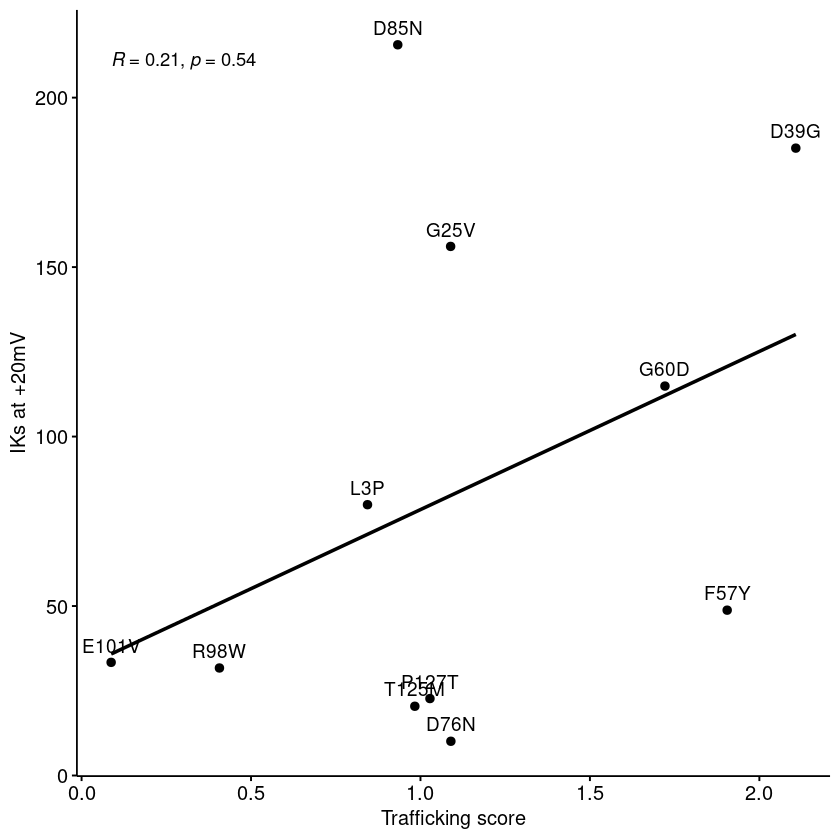

In [51]:
prev = c("G25V","G60D","P127T","R98W","D85N","D76N","L51H")

ggscatter(comp[comp$cat_ns=="missense",], x="trans_av",y="I20", 
          add = "reg.line", conf.int = FALSE, label="variants",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Trafficking score", ylab = "IKs at +20mV")

[1] "manualpatch-correlation-2022-01-13.pdf"

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

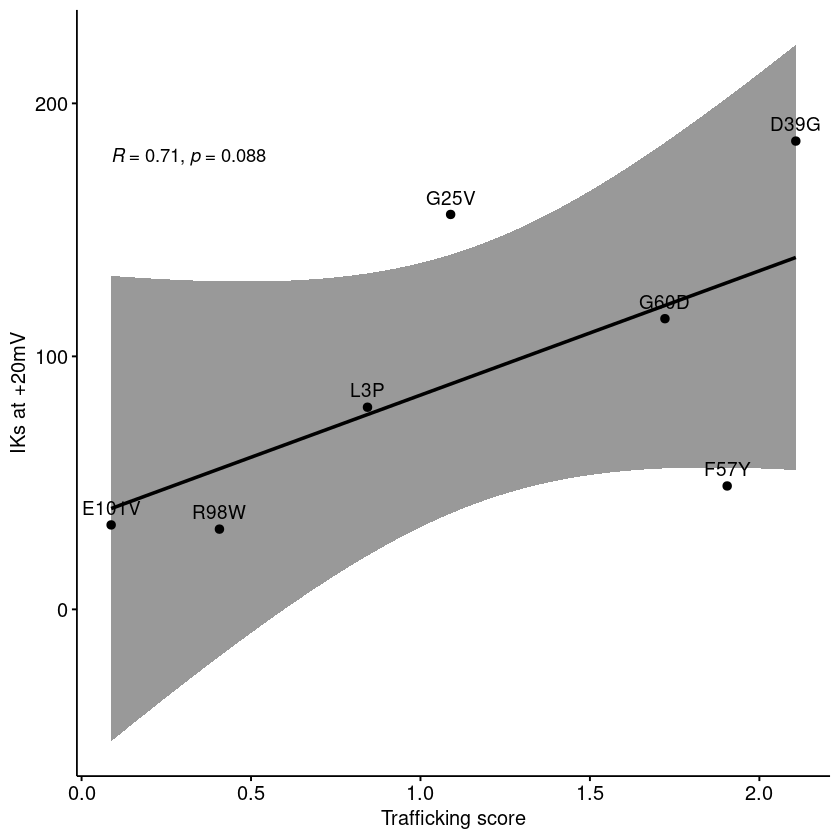

In [406]:
pdfName = paste("manualpatch-correlation-",Sys.Date(),".pdf",sep="")
pdfName

ggscatter(comp[comp$cat_ns=="missense" & comp$gating==0,], x="trans_av",y="I20",
          add = "reg.line", conf.int = TRUE, label="variants",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Trafficking score", ylab = "IKs at +20mV")

pdf(pdfName, useDingbats = F)
ggscatter(comp[comp$cat_ns=="missense" & comp$gating==0,], x="trans_av",y="I20",
          add = "reg.line", conf.int = TRUE, label="variants",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Trafficking score", ylab = "IKs at +20mV")

dev.off()

rm(pdfName)

## gnomAD calculations below

In [56]:
aa <- c("Ala"="A", "Arg"="R", "Asn"="N", "Asp"="D", "Cys"="C",
                         "Glu"="E", "Gln"="Q", "Gly"="G", "His"="H", 
                            "Ile"="I", "Leu"="L", "Lys"="K", "Met"="M", "Phe"="F",
                         "Pro"="P", "Ser"="S", "Thr"="T", "Trp"="W", "Tyr"="Y", "Val"="V")

head(aa)

gnomad <- fread("gnomAD_v2.1.1_ENSG00000180509_2022_01_13_12_05_22.csv", header=T, stringsAsFactors = F) %>% 
separate(.,`Protein Consequence`, into=c(NA,"var")) %>% 
    select(-Chromosome,-Position,-Source,-`Filters - exomes`, -`Filters - genomes`,-Transcript,-`HGVS Consequence`) %>% 
        filter(`VEP Annotation` %in% c("synonymous_variant","missense_variant","stop_gained"))%>%
        separate(.,var,into=c("orig","pos_corr","new"),sep=c(3,-3), convert=T) %>%
        mutate(orig=as.character(aa[orig]),
              new=as.character(aa[new]))


gnomad$new = ifelse(gnomad$`VEP Annotation`=="stop_gained","X",gnomad$new)
head(gnomad)
#unique(gnomad$var)

Ala Arg Asn Asp Cys Glu 
"A" "R" "N" "D" "C" "E"

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1 rows [10].”


rsIDs,Reference,Alternate,orig,pos_corr,new,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,ClinVar Variation ID,...,Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
rs759950872,G,A,S,128,S,c.384C>T,synonymous_variant,,NA,...,0,0,0,6088,0,0,0,30532,0,0
rs759950872,G,T,S,128,S,c.384C>A,synonymous_variant,,NA,...,0,0,0,6088,0,0,0,30532,0,0
rs1158360034,G,A,S,128,F,c.383C>T,missense_variant,,NA,...,0,0,0,6082,0,0,0,30540,0,0
rs767686634,C,T,T,125,T,c.375G>A,synonymous_variant,,NA,...,0,0,0,7180,0,0,1,30542,0,0
rs142511345,G,A,T,125,M,c.374C>T,missense_variant,Conflicting interpretations of pathogenicity,132679,...,0,0,1,7180,0,0,6,30572,0,0
rs1322112455,T,C,T,120,T,c.360A>G,synonymous_variant,,NA,...,0,0,0,6116,0,0,0,30604,0,0


In [57]:
gnomad$`VEP Annotation`

[1] "synonymous_variant" "synonymous_variant" "missense_variant"  
  [4] "synonymous_variant" "missense_variant"   "synonymous_variant"
  [7] "missense_variant"   "missense_variant"   "stop_gained"       
 [10] "missense_variant"   "synonymous_variant" "missense_variant"  
 [13] "missense_variant"   "synonymous_variant" "missense_variant"  
 [16] "missense_variant"   "synonymous_variant" "missense_variant"  
 [19] "missense_variant"   "missense_variant"   "synonymous_variant"
 [22] "missense_variant"   "synonymous_variant" "synonymous_variant"
 [25] "synonymous_variant" "missense_variant"   "missense_variant"  
 [28] "synonymous_variant" "synonymous_variant" "missense_variant"  
 [31] "missense_variant"   "synonymous_variant" "missense_variant"  
 [34] "missense_variant"   "synonymous_variant" "synonymous_variant"
 [37] "missense_variant"   "missense_variant"   "missense_variant"  
 [40] "synonymous_variant" "synonymous_variant" "missense_variant"  
 [43] "missense_variant"   "missense_variant"   "synonymous_variant"
 [46] "synonymous_variant" "missense_variant"   "synonymous_variant"
 [49] "missense_variant"   "missense_variant"   "missense_variant"  
 [52] "missense_variant"   "synonymous_variant" "missense_variant"  
 [55] "missense_variant"   "synonymous_variant" "missense_variant"  
 [58] "synonymous_variant" "missense_variant"   "synonymous_variant"
 [61] "missense_variant"   "missense_variant"   "missense_variant"  
 [64] "missense_variant"   "missense_variant"   "synonymous_variant"
 [67] "missense_variant"   "missense_variant"   "missense_variant"  
 [70] "missense_variant"   "missense_variant"   "missense_variant"  
 [73] "synonymous_variant" "missense_variant"   "missense_variant"  
 [76] "missense_variant"   "missense_variant"   "synonymous_variant"
 [79] "synonymous_variant" "missense_variant"   "synonymous_variant"
 [82] "missense_variant"   "missense_variant"   "synonymous_variant"
 [85] "missense_variant"   "missense_variant"   "synonymous_variant"
 [88] "missense_variant"   "missense_variant"   "missense_variant"  
 [91] "missense_variant"   "synonymous_variant" "stop_gained"       
 [94] "missense_variant"   "missense_variant"   "synonymous_variant"
 [97] "missense_variant"   "synonymous_variant" "synonymous_variant"
[100] "missense_variant"   "synonymous_variant" "missense_variant"  
[103] "synonymous_variant" "missense_variant"   "missense_variant"  
[106] "synonymous_variant" "missense_variant"   "missense_variant"  
[109] "synonymous_variant" "synonymous_variant" "missense_variant"  
[112] "missense_variant"   "missense_variant"   "synonymous_variant"
[115] "missense_variant"   "missense_variant"   "missense_variant"  
[118] "missense_variant"   "missense_variant"   "missense_variant"  
[121] "missense_variant"   "missense_variant"   "missense_variant"  
[124] "missense_variant"   "synonymous_variant" "synonymous_variant"
[127] "missense_variant"   "missense_variant"   "missense_variant"  
[130] "synonymous_variant" "synonymous_variant" "missense_variant"  
[133] "missense_variant"   "missense_variant"   "missense_variant"  
[136] "missense_variant"   "synonymous_variant" "missense_variant"  
[139] "stop_gained"        "stop_gained"        "missense_variant"  
[142] "missense_variant"   "missense_variant"   "missense_variant"  
[145] "missense_variant"   "synonymous_variant" "missense_variant"  
[148] "missense_variant"   "synonymous_variant" "missense_variant"  
[151] "missense_variant"   "missense_variant"   "missense_variant"  
[154] "synonymous_variant" "missense_variant"   "missense_variant"

In [58]:
freq <- inner_join(gnomad,scores)

head(freq)

str(freq)

Joining, by = c("orig", "pos_corr", "new")



rsIDs,Reference,Alternate,orig,pos_corr,new,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,ClinVar Variation ID,...,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
rs759950872,G,A,S,128,S,c.384C>T,synonymous_variant,,NA,...,1.1332796,1.0854654,1.1505940,1.1231130,0.03373354,3,0.01947607,S128S,1.0849399,1.161286
rs759950872,G,T,S,128,S,c.384C>A,synonymous_variant,,NA,...,1.1332796,1.0854654,1.1505940,1.1231130,0.03373354,3,0.01947607,S128S,1.0849399,1.161286
rs1158360034,G,A,S,128,F,c.383C>T,missense_variant,,NA,...,0.9419394,0.9921509,0.8644156,0.9328353,0.06435244,3,0.03715390,S128F,0.8600137,1.005657
rs767686634,C,T,T,125,T,c.375G>A,synonymous_variant,,NA,...,0.9156915,1.0501846,0.9917452,0.9858738,0.06743852,3,0.03893565,T125T,0.9095599,1.062188
rs142511345,G,A,T,125,M,c.374C>T,missense_variant,Conflicting interpretations of pathogenicity,132679,...,0.9639055,1.0199378,0.9659759,0.9832731,0.03176944,3,0.01834210,T125M,0.9473225,1.019224
rs1322112455,T,C,T,120,T,c.360A>G,synonymous_variant,,NA,...,1.0109282,0.9082244,0.9081298,0.9424274,0.05932338,3,0.03425037,T120T,0.8752967,1.009558


Classes ‘data.table’ and 'data.frame':	123 obs. of  59 variables:
 $ rsIDs                                    : chr  "rs759950872" "rs759950872" "rs1158360034" "rs767686634" ...
 $ Reference                                : chr  "G" "G" "G" "C" ...
 $ Alternate                                : chr  "A" "T" "A" "T" ...
 $ orig                                     : chr  "S" "S" "S" "T" ...
 $ pos_corr                                 : int  128 128 128 125 125 120 117 114 113 112 ...
 $ new                                      : chr  "S" "S" "F" "T" ...
 $ Transcript Consequence                   : chr  "c.384C>T" "c.384C>A" "c.383C>T" "c.375G>A" ...
 $ VEP Annotation                           : chr  "synonymous_variant" "synonymous_variant" "missense_variant" "synonymous_variant" ...
 $ ClinVar Clinical Significance            : chr  "" "" "" "" ...
 $ ClinVar Variation ID                     : int  NA NA NA NA 132679 NA NA NA NA 692249 ...
 $ Flags                                    : c

In [469]:
gnomad$'Hemizygote Count'

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0

In [517]:
freq$singleton = ifelse(freq$`Allele Count` ==1,"YES","NO")

[1] 46

In [60]:
freq [ freq$`Allele Count` ==1 & freq$`Allele Frequency` >1e-5,c(4:6,11:59)]

freq [ freq$`Allele Count` ==1 & freq$`Allele Frequency` <1e-5,c(4:6,11:59)]

freq [ (1-freq$trans_av)>0.5 & freq$`Allele Frequency` >1e-4,c(4:6,11:59)]

ERROR: Error in `[.data.table`(freq, freq$`Allele Count` == 1 & freq$`Allele Frequency` > : Item 53 of j is 60 which is outside the column number range [1,ncol=59]


In [62]:
nrow(freq [ freq$`Allele Count` ==1 & freq$`Allele Frequency` >1e-5,c(4:6,11:59)])

nrow(freq [ freq$`Allele Count` ==1 & freq$`Allele Frequency` <1e-5,c(4:6,11:59)])

nrow(freq [ (1-freq$trans_av)>0.5 & freq$`Allele Frequency` >1e-4,c(4:6,11:59)])

[1] 4

[1] 42

[1] 1

In [63]:
ggplot(freq,aes(log(`Allele Frequency`,10),abs(1-trans_av),size=`Allele Count`, col=singleton))+
    geom_point()+theme_classic()+geom_hline(yintercept = 0, lty=2,color="blue")+
        geom_hline(yintercept = 1, lty=2,color="red")+geom_hline(yintercept = 0.5)+geom_vline(xintercept = -4)

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'singleton' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

ERROR: Error in value[[3L]](cond): could not open file '/tmp/RtmpDjxpNV/file1444575d022bb2.png'


plot without title

png 
  2

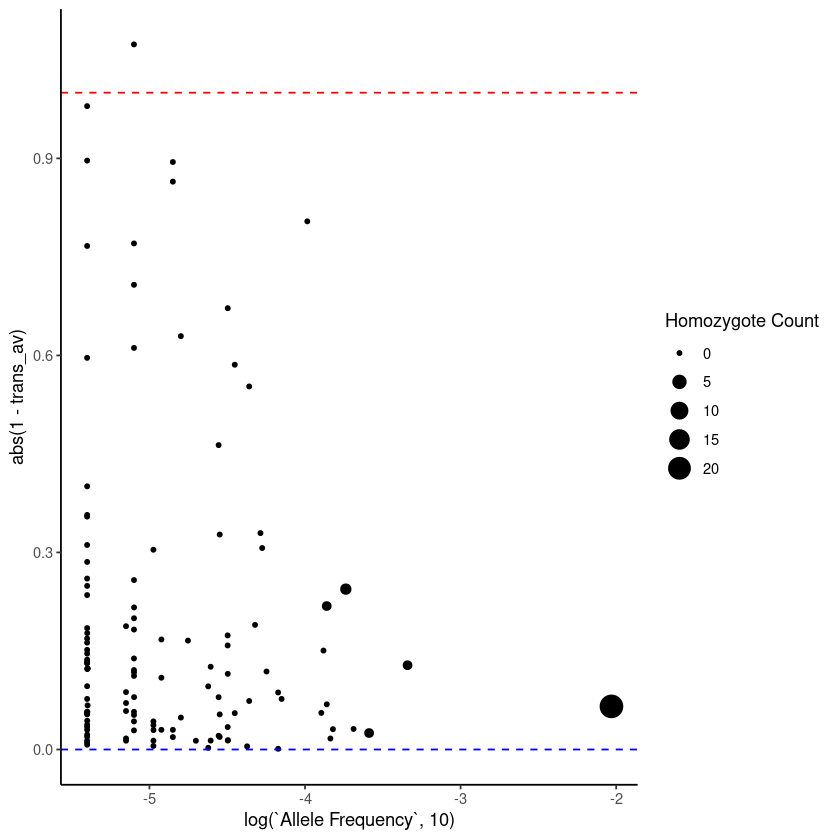

In [470]:
ggplot(freq,aes(log(`Allele Frequency`,10),abs(1-trans_av),size=`Homozygote Count`))+
    geom_point()+theme_classic()+geom_hline(yintercept = 0, lty=2,color="blue")+
        geom_hline(yintercept = 1, lty=2,color="red")

pdfName = paste("gnomad-",Sys.Date(),".pdf",sep="")
pdf(pdfName,useDingbats = F)

ggplot(freq,aes(log(`Allele Frequency`,10),abs(1-trans_av),size=`Homozygote Count`))+
    geom_point()+theme_classic()+geom_hline(yintercept = 0, lty=2,color="blue")+
        geom_hline(yintercept = 1, lty=2,color="red")

dev.off()
# extra column with variants absent from gnomad

Colummn for variants not in gnomAD # not really sure what this means - Ask Andrew! 

<b> right now, skip to the ROC curve </b>

In [471]:
`%ni%` <- Negate(`%in%`)

scores1 <- scores[scores$variants %ni% freq$variants,]

nrow(scores)
nrow(freq) # of note there are 6 duplicated variants on freq because of clinvar significance added
# to one row and not to another

length(unique(freq$variants))
nrow(scores1)

[1] 2064

[1] 123

[1] 117

[1] 1947

In [472]:
head(scores1)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.5767709,1.3700425,1.3950743,0.17056389,3,0.09847511,A8C,1.2020631,1.588086
A,8,G,missense,0.7998634,1.1180837,1.1553984,1.0244485,0.19538924,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.8877960,1.0392568,0.9161949,0.11160611,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.0378725,0.9376089,0.8902492,0.17614480,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.1990926,0.8787825,1.0745613,0.17162981,3,0.09909051,A8W,0.8803439,1.268779
A,31,A,synonymous,1.0911827,0.9943809,0.9542887,1.0132841,0.07037747,3,0.04063245,A31A,0.9336445,1.092924


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


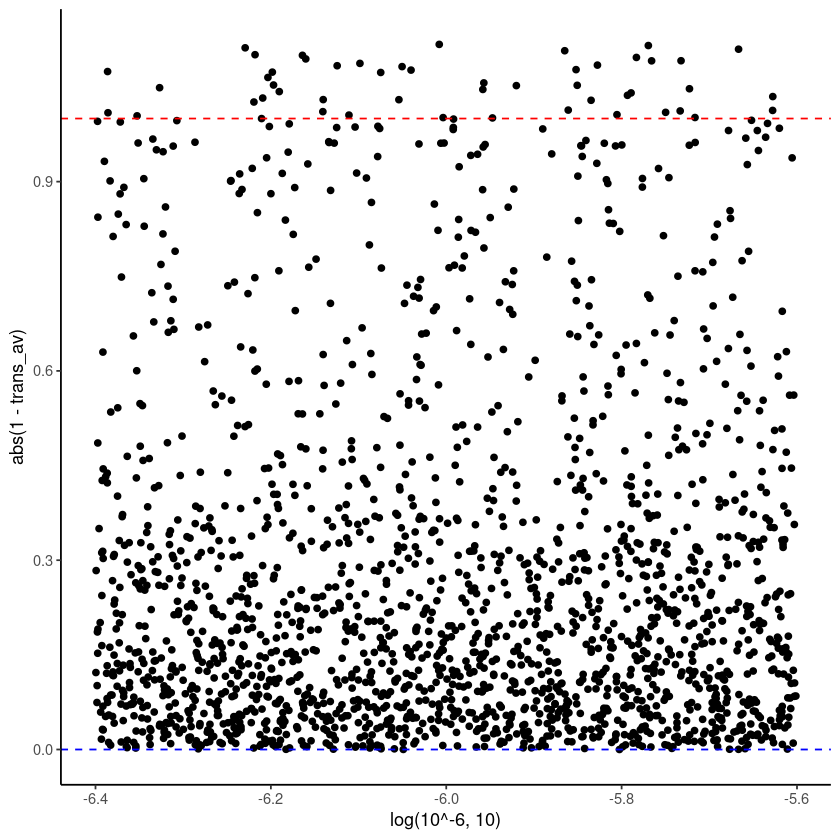

In [451]:
ggplot(scores1,aes(log(10^-6,10),abs(1-trans_av)))+
    geom_jitter()+theme_classic()+geom_hline(yintercept = 0, lty=2,color="blue")+
        geom_hline(yintercept = 1, lty=2,color="red")

## ROC curve

In [473]:
gnomad[which(gnomad$`ClinVar Clinical Significance`=='Pathogenic'),]
unique(gnomad$`ClinVar Clinical Significance`)

rsIDs,Reference,Alternate,orig,pos_corr,new,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,ClinVar Variation ID,...,Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
rs758346045,G,T,Y,46,X,c.138C>A,stop_gained,Pathogenic,547162,...,0,0,0,6138,0,0,1,30616,0,0
rs1244688796,C,T,W,17,X,c.51G>A,stop_gained,Pathogenic,547164,...,0,0,0,6132,0,0,0,30614,0,0
rs779124360,C,T,W,17,X,c.50G>A,stop_gained,Pathogenic,547163,...,0,0,0,6132,0,0,1,30614,0,0
rs28933384,G,A,T,7,I,c.20C>T,missense_variant,Pathogenic,13476,...,0,0,0,6132,0,0,0,30616,0,0


[1] ""                                                                
 [2] "Conflicting interpretations of pathogenicity"                    
 [3] "Uncertain significance"                                          
 [4] "Likely benign"                                                   
 [5] "Benign/Likely benign"                                            
 [6] "Conflicting interpretations of pathogenicity, other, risk factor"
 [7] "not provided"                                                    
 [8] "Benign"                                                          
 [9] "Pathogenic"                                                      
[10] "Likely pathogenic"

In [474]:
clinvar = c('Likely benign','Benign/Likely benign','Benign','Pathogenic','Likely pathogenic')

length(which(freq$`ClinVar Clinical Significance` %in% clinvar))

[1] 19

In [482]:
cv <- freq[which(freq$`ClinVar Clinical Significance` %in% clinvar),] %>%
        select(-trans_repA,-trans_rep2,-trans_rep3,-sd_av,-count,-sem,-'ClinVar Variation ID')
head(cv)
nrow(cv)

rsIDs,Reference,Alternate,orig,pos_corr,new,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,Flags,...,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,cat_ns,trans_av,variants,CI_lower,CI_upper
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
rs200684060,G,A,V,108,V,c.324C>T,synonymous_variant,Likely benign,,...,0,0,30614,0,0,synonymous,0.997415,V108V,0.9364420,1.058388
rs563859144,C,T,S,105,S,c.315G>A,synonymous_variant,Benign/Likely benign,,...,0,1,30614,0,0,synonymous,1.073839,S105S,1.0217641,1.125914
rs140643047,G,A,L,100,L,c.298C>T,synonymous_variant,Likely benign,,...,0,0,30616,0,0,synonymous,1.070742,L100L,0.9250959,1.216388
rs780553669,G,C,V,99,V,c.297C>G,synonymous_variant,Likely benign,,...,0,0,30616,0,0,synonymous,1.042767,V99V,1.0132557,1.072278
rs199473362,G,T,R,98,R,c.292C>A,synonymous_variant,Likely benign,,...,0,0,30616,0,0,synonymous,1.053546,R98R,1.0340604,1.073032
rs138884514,G,A,S,84,S,c.252C>T,synonymous_variant,Benign/Likely benign,,...,0,1,30616,0,0,synonymous,1.076996,S84S,1.0144386,1.139554


[1] 19

In [484]:
cv$traffic = ifelse(
    (cv$trans_av < lower_thresh & 
            cv$CI_lower < lower_thresh &
            cv$CI_upper < lower_thresh
            ),"Loss",
        ifelse((cv$trans_av < lower_thresh & 
            cv$CI_lower < lower_thresh &
            cv$CI_upper > lower_thresh
            ),"ProbableLoss", 
                ifelse((cv$trans_av > upper_thresh & 
            cv$CI_lower > upper_thresh &
            cv$CI_upper > upper_thresh
            ),"Gain",
                       ifelse((cv$trans_av > upper_thresh & 
            cv$CI_lower < upper_thresh &
            cv$CI_upper > upper_thresh
            ),"ProbableGain","WTlike"
                       )
                      )
        )
)

In [485]:
lower_thresh
upper_thresh

[1] 0.8828304

[1] 1.122648

In [487]:
unique(cv$traffic)
unique(cv$`ClinVar Clinical Significance`)

[1] "WTlike"       "ProbableGain" "Loss"         "Gain"         "ProbableLoss"

[1] "Likely benign"        "Benign/Likely benign" "Benign"              
[4] "Pathogenic"           "Likely pathogenic"

To increase the number of Pathogenic variants, looking at the HGMD database\
1. take the file from Andrew
2. Remove any tinnitus nad hearing loss indications
3. Vim the list onto a file 
4. sed -i 's/*/X/g' hgmd.txt  to remove the *s and replace them with X for nonsenses variants

In [503]:
hgmd <- fread("~/hgmd.txt", header=F, stringsAsFactors = F) %>% 
    separate(V1,c(NA,"variants"), sep="[.]" )
head(hgmd)

variants
<chr>
T7I
A8V
T10M
L16P
W17X
T20I


In [505]:
df <- inner_join(hgmd,scores)
head(df)
nrow(df)

Joining, by = "variants"



variants,orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,CI_lower,CI_upper
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
T10M,T,10,M,missense,0.4142704,1.3218087,1.1701106,0.9687299,0.48612966,3,0.28066709,0.4186224,1.5188374
Q22X,Q,22,X,earlyNS,0.5596487,0.4187441,0.2846662,0.4210197,0.13750539,3,0.07938877,0.2654177,0.5766217
G25V,G,25,V,missense,1.2375105,1.1461414,0.8692483,1.0843000,0.19176164,3,0.11071364,0.8673013,1.3012988
R32C,R,32,C,missense,1.5749233,1.7428075,1.5703371,1.6293560,0.09827863,3,0.05674119,1.5181432,1.7405687
R32H,R,32,H,missense,1.3741573,1.4709262,1.1433047,1.3294627,0.16832162,3,0.09718053,1.1389889,1.5199366
R33M,R,33,M,missense,1.3589798,1.4786187,1.5003107,1.4459697,0.07611221,3,0.04394341,1.3598406,1.5320988


[1] 47

In [506]:
df$outcome ="bad"

In [507]:
fwrite(df,"~/hgmd_variants_011722.txt",col.names = T, row.names = F, )

variants,orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,CI_lower,CI_upper,outcome
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
T10M,T,10,M,missense,0.4142704,1.3218087,1.1701106,0.9687299,0.48612966,3,0.28066709,0.4186224,1.5188374,bad
Q22X,Q,22,X,earlyNS,0.5596487,0.4187441,0.2846662,0.4210197,0.13750539,3,0.07938877,0.2654177,0.5766217,bad
G25V,G,25,V,missense,1.2375105,1.1461414,0.8692483,1.0843000,0.19176164,3,0.11071364,0.8673013,1.3012988,bad
R32C,R,32,C,missense,1.5749233,1.7428075,1.5703371,1.6293560,0.09827863,3,0.05674119,1.5181432,1.7405687,bad
R32H,R,32,H,missense,1.3741573,1.4709262,1.1433047,1.3294627,0.16832162,3,0.09718053,1.1389889,1.5199366,bad
R33M,R,33,M,missense,1.3589798,1.4786187,1.5003107,1.4459697,0.07611221,3,0.04394341,1.3598406,1.5320988,bad


### SCRATCH NOTES BELOW

In [ ]:
head(scores)
cons <- fread("dbNSFP_KCNE1_scores.csv", header=T, stringsAsFactors = F)

In [ ]:
head(cons)
cons$variants = paste(cons$aaref, cons$aapos, cons$aaalt, sep="")
head(cons)

In [ ]:
df <- full_join(cons,scores)
head(df)
nrow(df)

str(df)

In [ ]:
attach(df)

plot(trans_av, SIFT_score)
abline(v=0.5,col="red")
abline(v=1.5,col="red")

plot(trans_av, PROVEAN_score)
abline(v=0.5,col="red")
abline(v=1.5,col="red")

plot(trans_av, CADD_raw)
abline(v=0.5,col="red")
abline(v=1.5,col="red")

detach(df)

[1] 98

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



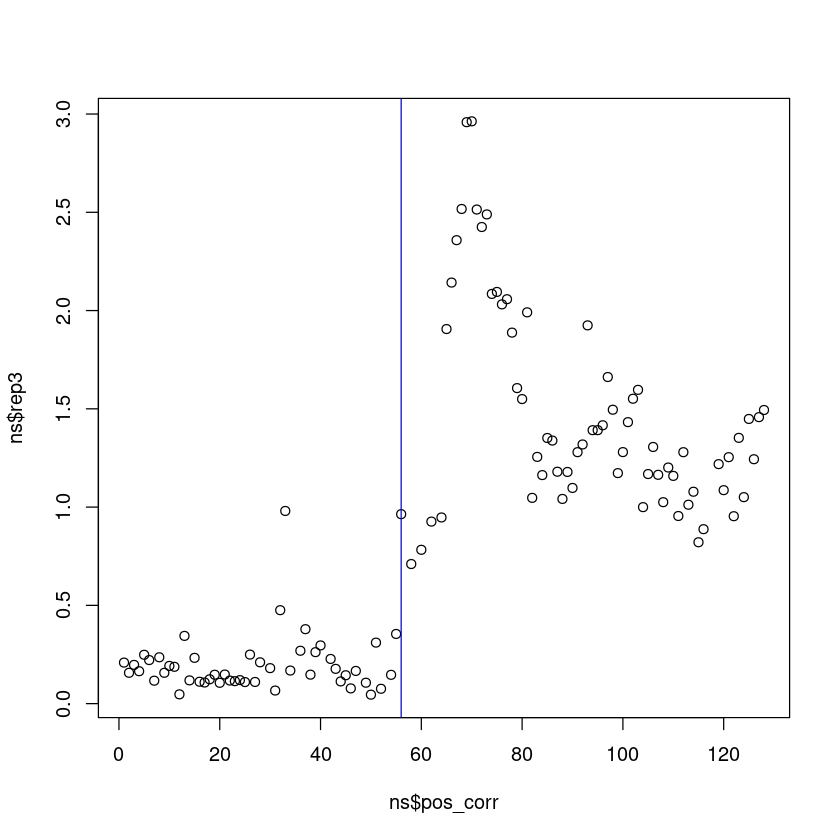

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



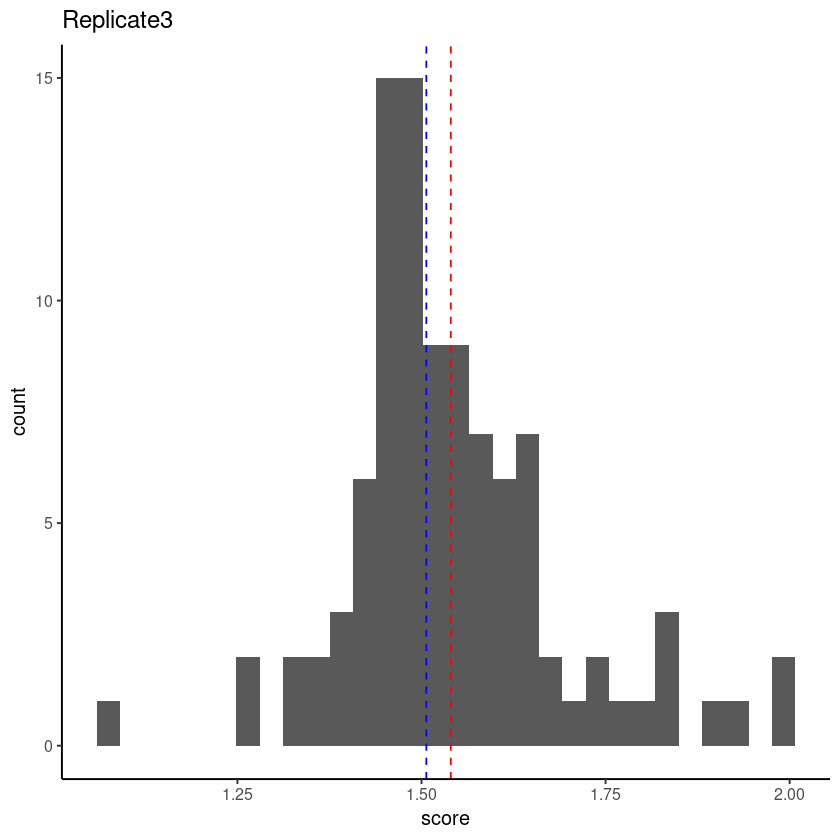

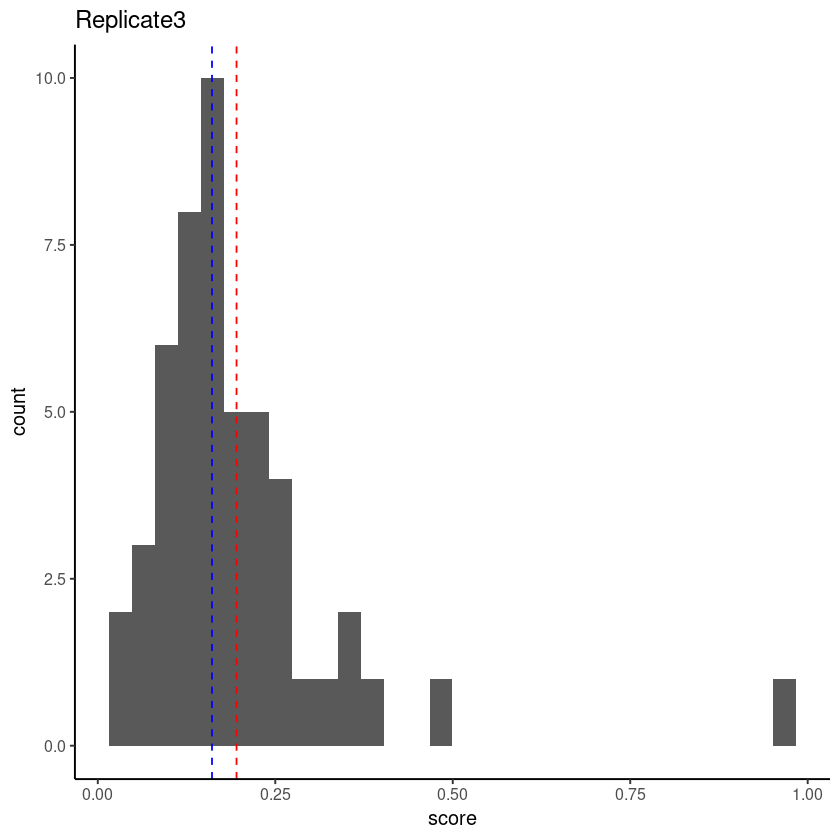

In [84]:
length(which(replicate3$category=="synonymous"))

syn_rep3 <- replicate3[replicate3$category=="synonymous",]

ns <- replicate3[replicate3$category=="nonsense",]


plot(ns$rep3 ~ ns$pos_corr)
abline(v=56, col="blue")

eNS <- replicate3[replicate3$cat_ns=="earlyNS",]


### distribution of synonymous for replicate 3 

ggplot(syn_rep3, aes(rep3))+geom_histogram() +
geom_vline(xintercept = mean(syn_rep3$rep3),col="red",lty=2) +
geom_vline(xintercept = median(syn_rep3$rep3),col="blue",lty=2) +
theme_classic2() + xlab("score") + ggtitle("Replicate3")

ggplot(eNS, aes(rep3))+geom_histogram() +
geom_vline(xintercept = mean(eNS$rep3),col="red",lty=2) +
geom_vline(xintercept = median(eNS$rep3),col="blue",lty=2) +
theme_classic2() + xlab("score") + ggtitle("Replicate3")

In [ ]:
syn = c2[c2$category == "synonymous",]

p <- ggplot(c2,aes(repA))+ geom_histogram()

p + facet_grid(rows=vars(category), scales="free")

q <- ggplot(syn,aes(repA))+ geom_histogram(fill="white", col="black")
r <- ggplot(syn,aes(rep2))+ geom_histogram(fill="blue", col="black")
s <- ggplot(syn,aes(rep3))+ geom_histogram(fill="red", col="black")

grid.arrange(q,r,s, ncol=3)


In [ ]:
ggscatter(c, x="repA",y="rep2",
    add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "replicate A", ylab = "Replicate 2")

### pulling out data for Bian

Data needed:

1. Median score at each position
2. Median score by biochemical category
3. Nonsense variants 


### Pulling out data for Bian 

1. Median score at each position
2. Median score by biochemical class
3. Nonsense score
4. Most extreme score (magnitude wise) 

In [ ]:
score <- fread("all_reps_normalizedscores.txt", header=T, stringsAsFactors = F)

head(score)

In [ ]:
unique(score$cat_ns)

In [ ]:
# defining categories: 

chargeP = c("R","H","K")
chargeN = c("D","E")
polar = c("S","T","N","Q","C")
aliphatic = c("G","A","V","L","M","I")
aromatic = c("F","Y","W")

head(aromatic)

In [ ]:
# defining a function
hm <- function(df){
  heatmap_matrix = matrix(ncol=length(unique(df$new)),nrow=128)
  colnames(heatmap_matrix)= unique(df$new)
  
    for (i in c(1:128)){
    for (x1 in (1:length(unique(df$new)))){
      a = colnames(heatmap_matrix)[x1]
      scoreAA <- unlist(df[df$pos_corr==i & df$new==a, 8])
      if(length(scoreAA)==0)
          {
          scoreAA = NA
      }
      #print(paste(i,a,scoreAA,sep=" "))
      #print(heatmap_matrix[i,x1])
      heatmap_matrix[i,x1] <- as.numeric(scoreAA)
      
    }
  }

  return(heatmap_matrix)
}

#head(heatmap_matrix)



In [ ]:
medians_all <- apply(hm(score),1,median,na.rm=T)

medians_polar <- apply(hm(score[score$new %in% polar,]),1,median,na.rm=T)
medians_aromatic <- apply(hm(score[score$new %in% aromatic,]),1,median,na.rm=T)
medians_aliphatic <- apply(hm(score[score$new %in% aliphatic,]),1,median,na.rm=T)
medians_chargeN <- apply(hm(score[score$new %in% chargeN,]),1,median,na.rm=T)
medians_chargeP <- apply(hm(score[score$new %in% chargeP,]),1,median,na.rm=T)

most_extreme_sign_n <- 1-apply(hm(score),1, min)
most_extreme_sign_p <- apply(hm(score),1, max)-1

nonsense <- hm(score[score$cat_ns=="earlyNS" | score$cat_ns=="lateNS",])


In [ ]:
hist(most_extreme_sign_n)
summary(most_extreme_sign_n)

hist(most_extreme_sign_p)
summary(most_extreme_sign_p)


In [ ]:
test <- data.frame(medians_all, medians_polar, medians_aromatic,medians_aliphatic,medians_chargeN, medians_chargeP,most_extreme_sign_n, most_extreme_sign_p, nonsense)

test$most_extreme = ifelse(abs(test$most_extreme_sign_n) > abs(test$most_extreme_sign_p),test$most_extreme_sign_n,test$most_extreme_sign_p)

test$most_extreme_sign = ifelse(abs(test$most_extreme_sign_n) > abs(test$most_extreme_sign_p),"-","+")

test <- test %>% mutate_if(is.numeric, replace_na, -9)

In [ ]:
head(test)

In [ ]:
## writing files for bian

fwrite(test[,c(1:6,9,10,11),],"121421_catsScores.txt",quote = F, row.names = F, sep ="\t")

In [ ]:
head 121421_catsScores.txt